In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
present = pd.read_csv('present.csv')
predict = pd.read_csv('predict.csv')

In [3]:
present # 2022년 자료 한정

,동별(1),동별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11
0,동별(1),동별(2),전체인구,전체인구,전체인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구
1,동별(1),동별(2),소계,남자,여자,소계,남자,여자,내국인,내국인,내국인,외국인,외국인,외국인
2,동별(1),동별(2),소계,소계,소계,소계,소계,소계,소계,남자,여자,소계,남자,여자
3,합계,소계,9667669,4675560,4992109,1667411,739300,928111,1658207,734417,923790,9204,4883,4321
4,합계,종로구,152211,72980,79231,27958,12592,15366,27704,12448,15256,254,144,110
5,합계,중구,130785,63377,67408,25055,11150,13905,24660,10946,13714,395,204,191
6,합계,용산구,233284,113012,120272,39037,17035,22002,38478,16710,21768,559,325,234
7,합계,성동구,288234,139691,148543,47720,21008,26712,47530,20902,26628,190,106,84
8,합계,광진구,351252,168197,183055,54071,24245,29826,53737,24075,29662,334,170,164
9,합계,동대문구,353601,171903,181698,64468,28702,35766,64255,28610,35645,213,92,121


In [4]:
present.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   동별(1)    29 non-null     object
 1   동별(2)    29 non-null     object
 2   2022     29 non-null     object
 3   2022.1   29 non-null     object
 4   2022.2   29 non-null     object
 5   2022.3   29 non-null     object
 6   2022.4   29 non-null     object
 7   2022.5   29 non-null     object
 8   2022.6   29 non-null     object
 9   2022.7   29 non-null     object
 10  2022.8   29 non-null     object
 11  2022.9   29 non-null     object
 12  2022.10  29 non-null     object
 13  2022.11  29 non-null     object
dtypes: object(14)
memory usage: 3.3+ KB


In [5]:
present.columns

Index(['동별(1)', '동별(2)', '2022', '2022.1', '2022.2', '2022.3', '2022.4',
       '2022.5', '2022.6', '2022.7', '2022.8', '2022.9', '2022.10', '2022.11'],
      dtype='object')

In [6]:
noneed = ['동별(1)', '2022', '2022.1', '2022.2', '2022.3']
present.drop(noneed, axis=1, inplace = True)

In [7]:
present.columns = ['region', 'men', 'women', 'local', 'local_men', 'local_women', 'foreign', 'foreign_men', 'foreign_women']
present

,region,men,women,local,local_men,local_women,foreign,foreign_men,foreign_women
0,동별(2),65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구
1,동별(2),남자,여자,내국인,내국인,내국인,외국인,외국인,외국인
2,동별(2),소계,소계,소계,남자,여자,소계,남자,여자
3,소계,739300,928111,1658207,734417,923790,9204,4883,4321
4,종로구,12592,15366,27704,12448,15256,254,144,110
5,중구,11150,13905,24660,10946,13714,395,204,191
6,용산구,17035,22002,38478,16710,21768,559,325,234
7,성동구,21008,26712,47530,20902,26628,190,106,84
8,광진구,24245,29826,53737,24075,29662,334,170,164
9,동대문구,28702,35766,64255,28610,35645,213,92,121


In [8]:
present = present.loc[4:]
present

,region,men,women,local,local_men,local_women,foreign,foreign_men,foreign_women
4,종로구,12592,15366,27704,12448,15256,254,144,110
5,중구,11150,13905,24660,10946,13714,395,204,191
6,용산구,17035,22002,38478,16710,21768,559,325,234
7,성동구,21008,26712,47530,20902,26628,190,106,84
8,광진구,24245,29826,53737,24075,29662,334,170,164
9,동대문구,28702,35766,64255,28610,35645,213,92,121
10,중랑구,33609,41311,74790,33552,41238,130,57,73
11,성북구,33409,44066,77293,33318,43975,182,91,91
12,강북구,28618,37689,66170,28550,37620,137,68,69
13,도봉구,29963,37035,66942,29942,37000,56,21,35


In [9]:
#present.set_index('region', inplace = True)

In [10]:
# 'region' 열을 제외한 모든 열을 float로 형변환
present.loc[:, present.columns != 'region'] = present.loc[:, present.columns != 'region'].astype(float)

/var/folders/v1/3q6w8yln7rlf27jz14stsjxc0000gn/T/ipykernel_5123/2595409287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  present.loc[:, present.columns != 'region'] = present.loc[:, present.columns != 'region'].astype(float)


In [11]:
present['total'] = present['men'] + present['women']
present

/var/folders/v1/3q6w8yln7rlf27jz14stsjxc0000gn/T/ipykernel_5123/2919831481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  present['total'] = present['men'] + present['women']


,region,men,women,local,local_men,local_women,foreign,foreign_men,foreign_women,total
4,종로구,12592.0,15366.0,27704.0,12448.0,15256.0,254.0,144.0,110.0,27958.0
5,중구,11150.0,13905.0,24660.0,10946.0,13714.0,395.0,204.0,191.0,25055.0
6,용산구,17035.0,22002.0,38478.0,16710.0,21768.0,559.0,325.0,234.0,39037.0
7,성동구,21008.0,26712.0,47530.0,20902.0,26628.0,190.0,106.0,84.0,47720.0
8,광진구,24245.0,29826.0,53737.0,24075.0,29662.0,334.0,170.0,164.0,54071.0
9,동대문구,28702.0,35766.0,64255.0,28610.0,35645.0,213.0,92.0,121.0,64468.0
10,중랑구,33609.0,41311.0,74790.0,33552.0,41238.0,130.0,57.0,73.0,74920.0
11,성북구,33409.0,44066.0,77293.0,33318.0,43975.0,182.0,91.0,91.0,77475.0
12,강북구,28618.0,37689.0,66170.0,28550.0,37620.0,137.0,68.0,69.0,66307.0
13,도봉구,29963.0,37035.0,66942.0,29942.0,37000.0,56.0,21.0,35.0,66998.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


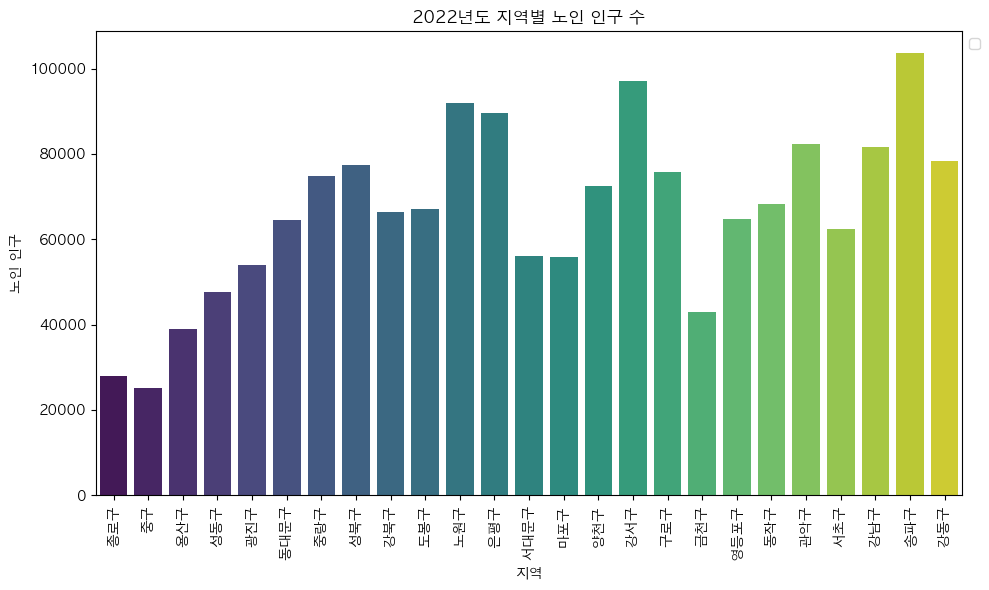

In [12]:
plt.rc('font', family='AppleGothic')
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='region', y='total', data=present, palette='viridis', dodge = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel('지역')
plt.ylabel('노인 인구')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('2022년도 지역별 노인 인구 수')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


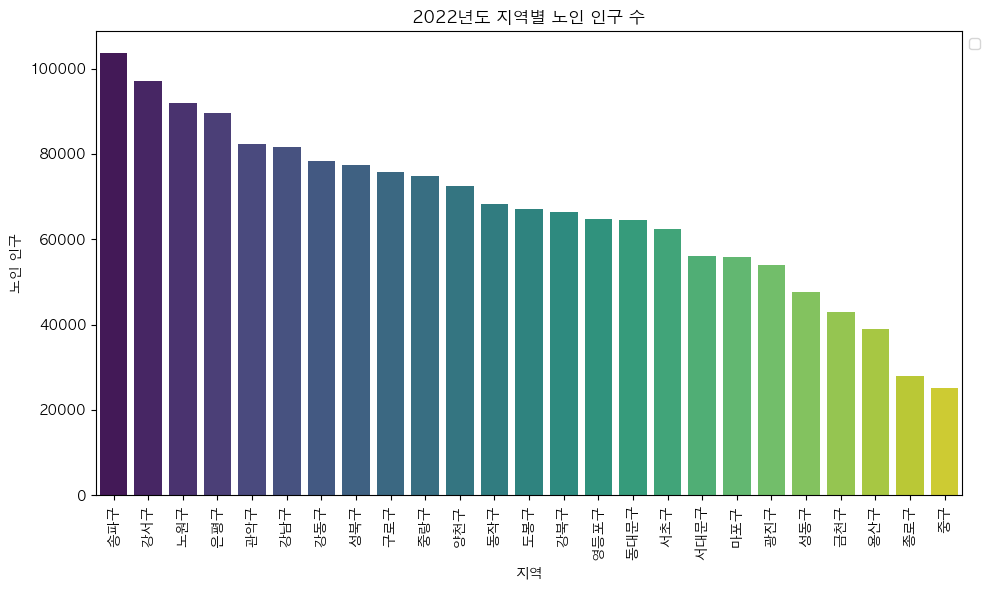

In [13]:
present_new = present.sort_values(by='total', ascending=False)
plt.show()

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='region', y='total', data=present_new, palette='viridis', dodge = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel('지역')
plt.ylabel('노인 인구')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('2022년도 지역별 노인 인구 수')
plt.tight_layout()
plt.show()

In [14]:
predict

,자치구별(1),자치구별(2),2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,...,2037.2,2038,2038.1,2038.2,2039,2039.1,2039.2,2040,2040.1,2040.2
0,자치구별(1),자치구별(2),고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,...,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구
1,자치구별(1),자치구별(2),소계,남자,여자,소계,남자,여자,소계,남자,...,여자,소계,남자,여자,소계,남자,여자,소계,남자,여자
2,합계,소계,1476752,653952,822800,1545639,684354,861285,1616269,715249,...,1431523,2646821,1188280,1458541,2693283,1210631,1482652,2727774,1227425,1500349
3,합계,종로구,25127,11039,14088,25749,11296,14453,26408,11627,...,21586,40463,18496,21967,41169,18839,22330,41702,19126,22576
4,합계,중구,21478,9347,12131,22403,9752,12651,23485,10237,...,19555,35979,16071,19908,36593,16389,20204,37038,16587,20451
5,합계,용산구,34426,14714,19712,35528,15238,20290,36262,15640,...,31025,57323,25713,31610,58364,26220,32144,59171,26576,32595
6,합계,성동구,42943,18779,24164,44388,19383,25005,46052,20155,...,40511,74325,33047,41278,75634,33629,42005,76608,34075,42533
7,합계,광진구,48313,21643,26670,50635,22710,27925,53037,23734,...,47473,87916,39578,48338,89266,40229,49037,90297,40711,49586
8,합계,동대문구,58022,25693,32329,59966,26575,33391,62263,27555,...,51075,95452,43463,51989,96934,44212,52722,98200,44855,53345
9,합계,중랑구,65197,29217,35980,68506,30680,37826,71834,32016,...,64970,120161,54050,66111,122071,54993,67078,123420,55658,67762


In [15]:
noneed = ['자치구별(1)']
predict = predict.drop(noneed, axis = 1)
predict

,자치구별(2),2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2,...,2037.2,2038,2038.1,2038.2,2039,2039.1,2039.2,2040,2040.1,2040.2
0,자치구별(2),고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,...,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구
1,자치구별(2),소계,남자,여자,소계,남자,여자,소계,남자,여자,...,여자,소계,남자,여자,소계,남자,여자,소계,남자,여자
2,소계,1476752,653952,822800,1545639,684354,861285,1616269,715249,901020,...,1431523,2646821,1188280,1458541,2693283,1210631,1482652,2727774,1227425,1500349
3,종로구,25127,11039,14088,25749,11296,14453,26408,11627,14781,...,21586,40463,18496,21967,41169,18839,22330,41702,19126,22576
4,중구,21478,9347,12131,22403,9752,12651,23485,10237,13248,...,19555,35979,16071,19908,36593,16389,20204,37038,16587,20451
5,용산구,34426,14714,19712,35528,15238,20290,36262,15640,20622,...,31025,57323,25713,31610,58364,26220,32144,59171,26576,32595
6,성동구,42943,18779,24164,44388,19383,25005,46052,20155,25897,...,40511,74325,33047,41278,75634,33629,42005,76608,34075,42533
7,광진구,48313,21643,26670,50635,22710,27925,53037,23734,29303,...,47473,87916,39578,48338,89266,40229,49037,90297,40711,49586
8,동대문구,58022,25693,32329,59966,26575,33391,62263,27555,34708,...,51075,95452,43463,51989,96934,44212,52722,98200,44855,53345
9,중랑구,65197,29217,35980,68506,30680,37826,71834,32016,39818,...,64970,120161,54050,66111,122071,54993,67078,123420,55658,67762


In [16]:
columns = ['region']
year = 2020
for i in range((len(predict.columns)-1)//3):
    for j in [' total', ' men', ' women']:
        columns.append(str(year)+j)
    year = year+1

In [17]:
columns

['region',
 '2020 total',
 '2020 men',
 '2020 women',
 '2021 total',
 '2021 men',
 '2021 women',
 '2022 total',
 '2022 men',
 '2022 women',
 '2023 total',
 '2023 men',
 '2023 women',
 '2024 total',
 '2024 men',
 '2024 women',
 '2025 total',
 '2025 men',
 '2025 women',
 '2026 total',
 '2026 men',
 '2026 women',
 '2027 total',
 '2027 men',
 '2027 women',
 '2028 total',
 '2028 men',
 '2028 women',
 '2029 total',
 '2029 men',
 '2029 women',
 '2030 total',
 '2030 men',
 '2030 women',
 '2031 total',
 '2031 men',
 '2031 women',
 '2032 total',
 '2032 men',
 '2032 women',
 '2033 total',
 '2033 men',
 '2033 women',
 '2034 total',
 '2034 men',
 '2034 women',
 '2035 total',
 '2035 men',
 '2035 women',
 '2036 total',
 '2036 men',
 '2036 women',
 '2037 total',
 '2037 men',
 '2037 women',
 '2038 total',
 '2038 men',
 '2038 women',
 '2039 total',
 '2039 men',
 '2039 women',
 '2040 total',
 '2040 men',
 '2040 women']

In [18]:
predict.columns = columns
predict

,region,2020 total,2020 men,2020 women,2021 total,2021 men,2021 women,2022 total,2022 men,2022 women,...,2037 women,2038 total,2038 men,2038 women,2039 total,2039 men,2039 women,2040 total,2040 men,2040 women
0,자치구별(2),고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,...,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구,고령인구
1,자치구별(2),소계,남자,여자,소계,남자,여자,소계,남자,여자,...,여자,소계,남자,여자,소계,남자,여자,소계,남자,여자
2,소계,1476752,653952,822800,1545639,684354,861285,1616269,715249,901020,...,1431523,2646821,1188280,1458541,2693283,1210631,1482652,2727774,1227425,1500349
3,종로구,25127,11039,14088,25749,11296,14453,26408,11627,14781,...,21586,40463,18496,21967,41169,18839,22330,41702,19126,22576
4,중구,21478,9347,12131,22403,9752,12651,23485,10237,13248,...,19555,35979,16071,19908,36593,16389,20204,37038,16587,20451
5,용산구,34426,14714,19712,35528,15238,20290,36262,15640,20622,...,31025,57323,25713,31610,58364,26220,32144,59171,26576,32595
6,성동구,42943,18779,24164,44388,19383,25005,46052,20155,25897,...,40511,74325,33047,41278,75634,33629,42005,76608,34075,42533
7,광진구,48313,21643,26670,50635,22710,27925,53037,23734,29303,...,47473,87916,39578,48338,89266,40229,49037,90297,40711,49586
8,동대문구,58022,25693,32329,59966,26575,33391,62263,27555,34708,...,51075,95452,43463,51989,96934,44212,52722,98200,44855,53345
9,중랑구,65197,29217,35980,68506,30680,37826,71834,32016,39818,...,64970,120161,54050,66111,122071,54993,67078,123420,55658,67762


In [19]:
predict = predict.loc[3:]
predict

,region,2020 total,2020 men,2020 women,2021 total,2021 men,2021 women,2022 total,2022 men,2022 women,...,2037 women,2038 total,2038 men,2038 women,2039 total,2039 men,2039 women,2040 total,2040 men,2040 women
3,종로구,25127,11039,14088,25749,11296,14453,26408,11627,14781,...,21586,40463,18496,21967,41169,18839,22330,41702,19126,22576
4,중구,21478,9347,12131,22403,9752,12651,23485,10237,13248,...,19555,35979,16071,19908,36593,16389,20204,37038,16587,20451
5,용산구,34426,14714,19712,35528,15238,20290,36262,15640,20622,...,31025,57323,25713,31610,58364,26220,32144,59171,26576,32595
6,성동구,42943,18779,24164,44388,19383,25005,46052,20155,25897,...,40511,74325,33047,41278,75634,33629,42005,76608,34075,42533
7,광진구,48313,21643,26670,50635,22710,27925,53037,23734,29303,...,47473,87916,39578,48338,89266,40229,49037,90297,40711,49586
8,동대문구,58022,25693,32329,59966,26575,33391,62263,27555,34708,...,51075,95452,43463,51989,96934,44212,52722,98200,44855,53345
9,중랑구,65197,29217,35980,68506,30680,37826,71834,32016,39818,...,64970,120161,54050,66111,122071,54993,67078,123420,55658,67762
10,성북구,69670,30005,39665,71941,31024,40917,74750,32228,42522,...,63185,114387,50065,64322,116253,50895,65358,117603,51530,66073
11,강북구,59737,25611,34126,61803,26470,35333,63749,27336,36413,...,53740,97406,42808,54598,98889,43527,55362,99984,44101,55883
12,도봉구,59130,26377,32753,61743,27513,34230,64724,28860,35864,...,58228,106920,47584,59336,108697,48483,60214,110048,49119,60929


In [20]:
predict.loc[:, predict.columns != 'region'] = predict.loc[:, predict.columns != 'region'].astype(float)

/var/folders/v1/3q6w8yln7rlf27jz14stsjxc0000gn/T/ipykernel_5123/1184659626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict.loc[:, predict.columns != 'region'] = predict.loc[:, predict.columns != 'region'].astype(float)


In [21]:
total = ['region']
for i in predict.columns:
    if 'total' in i:
        total.append(i)
        
total_df = predict[total] # 고령자들의 총 인원 수만 고려한 새로운 데이터프레임 생성

In [22]:
total_df

,region,2020 total,2021 total,2022 total,2023 total,2024 total,2025 total,2026 total,2027 total,2028 total,...,2031 total,2032 total,2033 total,2034 total,2035 total,2036 total,2037 total,2038 total,2039 total,2040 total
3,종로구,25127.0,25749.0,26408.0,27187.0,28109.0,29084.0,30282.0,31070.0,32097.0,...,34496.0,35230.0,36026.0,36995.0,37894.0,38856.0,39705.0,40463.0,41169.0,41702.0
4,중구,21478.0,22403.0,23485.0,24374.0,25248.0,26196.0,27229.0,27988.0,28930.0,...,30925.0,31527.0,32250.0,33052.0,33814.0,34620.0,35362.0,35979.0,36593.0,37038.0
5,용산구,34426.0,35528.0,36262.0,37740.0,39130.0,40728.0,42335.0,43648.0,45088.0,...,48439.0,49470.0,50699.0,52159.0,53500.0,54934.0,56233.0,57323.0,58364.0,59171.0
6,성동구,42943.0,44388.0,46052.0,47907.0,49882.0,52090.0,54452.0,56249.0,58256.0,...,62914.0,64252.0,65794.0,67739.0,69487.0,71314.0,72894.0,74325.0,75634.0,76608.0
7,광진구,48313.0,50635.0,53037.0,55697.0,58317.0,61406.0,64311.0,66448.0,69206.0,...,74922.0,76664.0,78514.0,80656.0,82533.0,84570.0,86298.0,87916.0,89266.0,90297.0
8,동대문구,58022.0,59966.0,62263.0,64397.0,66711.0,69312.0,72054.0,74022.0,76279.0,...,81755.0,83478.0,85238.0,87528.0,89570.0,91737.0,93626.0,95452.0,96934.0,98200.0
9,중랑구,65197.0,68506.0,71834.0,75516.0,79190.0,83467.0,87766.0,90984.0,94521.0,...,102475.0,104891.0,107389.0,110365.0,112971.0,115665.0,117988.0,120161.0,122071.0,123420.0
10,성북구,69670.0,71941.0,74750.0,77708.0,80606.0,83791.0,87079.0,89236.0,91781.0,...,97862.0,99944.0,101979.0,104841.0,107231.0,109898.0,112218.0,114387.0,116253.0,117603.0
11,강북구,59737.0,61803.0,63749.0,65980.0,68308.0,71163.0,74045.0,75995.0,78384.0,...,83900.0,85548.0,87453.0,89623.0,91602.0,93745.0,95681.0,97406.0,98889.0,99984.0
12,도봉구,59130.0,61743.0,64724.0,67786.0,70893.0,74422.0,78021.0,80615.0,83605.0,...,90585.0,92742.0,95033.0,97788.0,100173.0,102718.0,104897.0,106920.0,108697.0,110048.0


In [23]:
pop_30 = total_df['2030 total']

In [24]:
col = ['region']
for i in total_df.columns:
    if 'total' in i:
        col.append(i[:4])
total_df.columns = col
total_df

,region,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
3,종로구,25127.0,25749.0,26408.0,27187.0,28109.0,29084.0,30282.0,31070.0,32097.0,...,34496.0,35230.0,36026.0,36995.0,37894.0,38856.0,39705.0,40463.0,41169.0,41702.0
4,중구,21478.0,22403.0,23485.0,24374.0,25248.0,26196.0,27229.0,27988.0,28930.0,...,30925.0,31527.0,32250.0,33052.0,33814.0,34620.0,35362.0,35979.0,36593.0,37038.0
5,용산구,34426.0,35528.0,36262.0,37740.0,39130.0,40728.0,42335.0,43648.0,45088.0,...,48439.0,49470.0,50699.0,52159.0,53500.0,54934.0,56233.0,57323.0,58364.0,59171.0
6,성동구,42943.0,44388.0,46052.0,47907.0,49882.0,52090.0,54452.0,56249.0,58256.0,...,62914.0,64252.0,65794.0,67739.0,69487.0,71314.0,72894.0,74325.0,75634.0,76608.0
7,광진구,48313.0,50635.0,53037.0,55697.0,58317.0,61406.0,64311.0,66448.0,69206.0,...,74922.0,76664.0,78514.0,80656.0,82533.0,84570.0,86298.0,87916.0,89266.0,90297.0
8,동대문구,58022.0,59966.0,62263.0,64397.0,66711.0,69312.0,72054.0,74022.0,76279.0,...,81755.0,83478.0,85238.0,87528.0,89570.0,91737.0,93626.0,95452.0,96934.0,98200.0
9,중랑구,65197.0,68506.0,71834.0,75516.0,79190.0,83467.0,87766.0,90984.0,94521.0,...,102475.0,104891.0,107389.0,110365.0,112971.0,115665.0,117988.0,120161.0,122071.0,123420.0
10,성북구,69670.0,71941.0,74750.0,77708.0,80606.0,83791.0,87079.0,89236.0,91781.0,...,97862.0,99944.0,101979.0,104841.0,107231.0,109898.0,112218.0,114387.0,116253.0,117603.0
11,강북구,59737.0,61803.0,63749.0,65980.0,68308.0,71163.0,74045.0,75995.0,78384.0,...,83900.0,85548.0,87453.0,89623.0,91602.0,93745.0,95681.0,97406.0,98889.0,99984.0
12,도봉구,59130.0,61743.0,64724.0,67786.0,70893.0,74422.0,78021.0,80615.0,83605.0,...,90585.0,92742.0,95033.0,97788.0,100173.0,102718.0,104897.0,106920.0,108697.0,110048.0


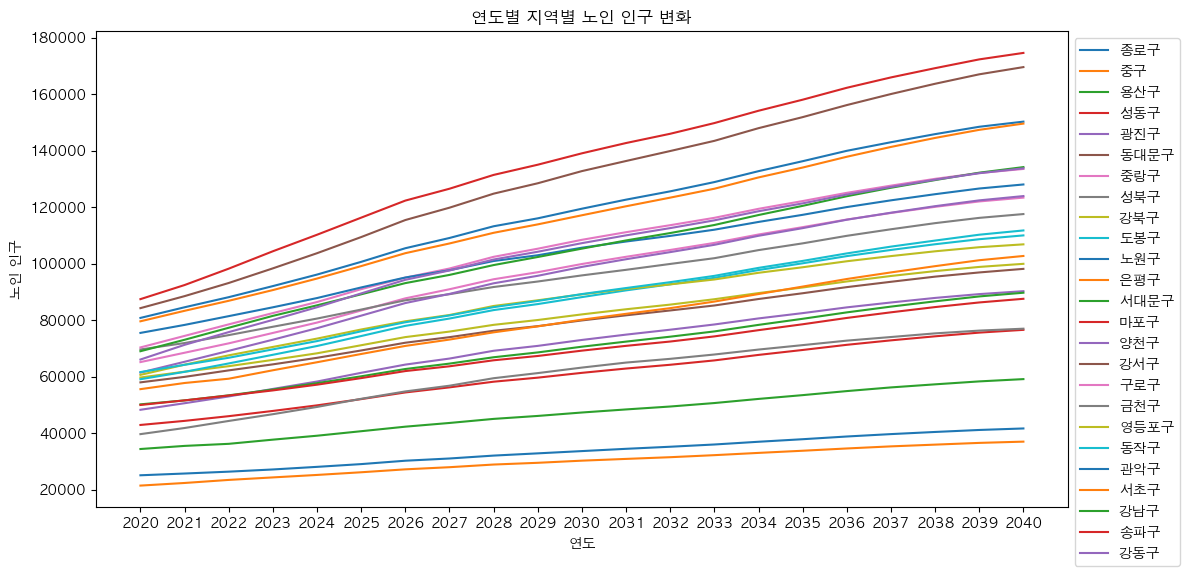

In [25]:
plt.figure(figsize=(12, 6))

for i in range(len(total_df)):
    plt.plot(total_df.columns[1:], total_df.iloc[i,1:], label = total_df.iloc[i,0])

plt.xlabel('연도')
plt.ylabel('노인 인구')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('연도별 지역별 노인 인구 변화')
plt.tight_layout()
plt.show()

In [26]:
df_percent_change = total_df.copy()
df_percent_change.iloc[:, 1:] = df_percent_change.iloc[:, 1:].pct_change(axis=1) * 100
df_percent_change.drop(['region'], axis = 1, inplace = True)
#df_percent_change['2020'] = 0
df_percent_change

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
3,NaN,2.475425,2.559323,2.949864,3.391327,3.46864,4.119103,2.602206,3.305439,2.464405,...,2.386323,2.127783,2.259438,2.689724,2.430058,2.53866,2.184991,1.909079,1.744804,1.294663
4,NaN,4.306732,4.82971,3.785395,3.585788,3.754753,3.94335,2.787469,3.365728,2.125821,...,2.05597,1.946645,2.293272,2.486822,2.305458,2.383628,2.14327,1.744811,1.706551,1.21608
5,NaN,3.201069,2.065976,4.075892,3.683095,4.083823,3.945688,3.101453,3.29912,2.326561,...,2.297734,2.12845,2.484334,2.879741,2.570985,2.680374,2.364656,1.938364,1.816025,1.382702
6,NaN,3.364926,3.748761,4.028055,4.122571,4.426446,4.53446,3.300154,3.568063,2.461549,...,2.48082,2.126713,2.399925,2.956197,2.580493,2.629269,2.215554,1.963125,1.761184,1.287781
7,NaN,4.80616,4.743754,5.015367,4.704024,5.296912,4.730808,3.322915,4.150614,2.496893,...,2.582288,2.325085,2.413127,2.728176,2.327167,2.468104,2.043278,1.874899,1.535557,1.154975
8,NaN,3.350453,3.830504,3.427397,3.593335,3.898907,3.956025,2.731285,3.049094,2.14738,...,2.25894,2.107516,2.10834,2.686595,2.332968,2.419337,2.059147,1.950313,1.552613,1.306043
9,NaN,5.075387,4.857969,5.125706,4.865194,5.400934,5.150539,3.666568,3.887497,2.638567,...,2.554993,2.357648,2.38152,2.771234,2.361256,2.384683,2.008386,1.841713,1.589534,1.105095
10,NaN,3.259653,3.904588,3.957191,3.729346,3.951319,3.924049,2.477061,2.851988,2.115906,...,2.055459,2.127486,2.03614,2.80646,2.279643,2.487154,2.111048,1.932845,1.631304,1.16126
11,NaN,3.458493,3.148714,3.499663,3.528342,4.179598,4.049857,2.633534,3.143628,2.182843,...,2.211123,1.964243,2.22682,2.481333,2.208139,2.339469,2.065177,1.802866,1.522493,1.107302
12,NaN,4.419077,4.828078,4.730857,4.583542,4.977924,4.835936,3.324746,3.708987,2.551283,...,2.697095,2.381189,2.470294,2.898993,2.43895,2.540605,2.121342,1.928558,1.66199,1.242905


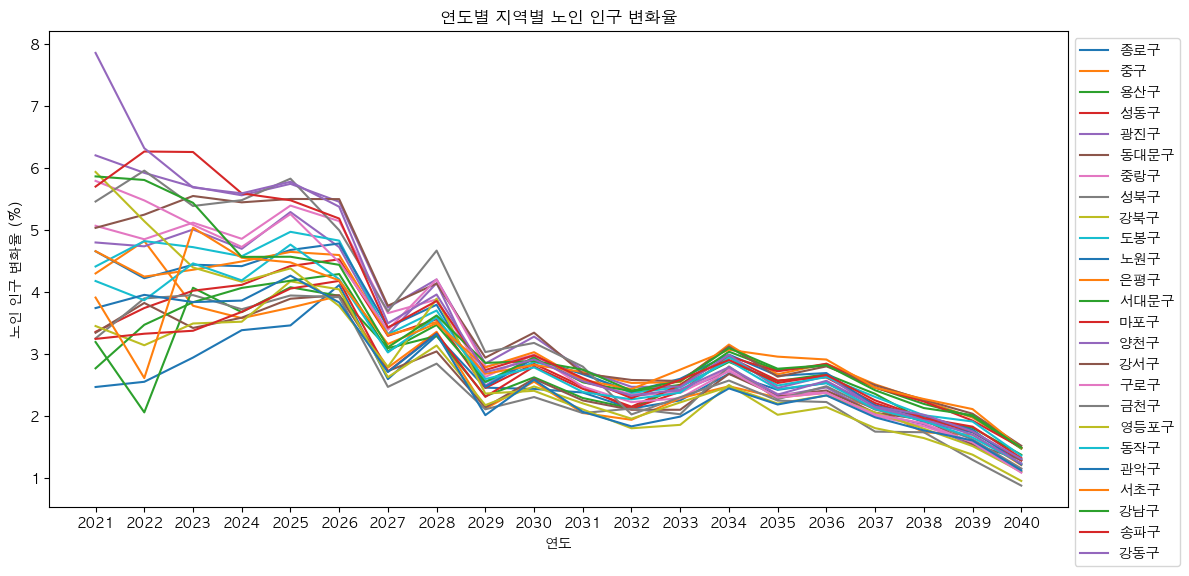

In [27]:
plt.figure(figsize=(12, 6))

for i in range(len(df_percent_change)):
    plt.plot(df_percent_change.columns, df_percent_change.iloc[i,:], label = total_df.iloc[i,0])

plt.xlabel('연도')
plt.ylabel('노인 인구 변화율 (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('연도별 지역별 노인 인구 변화율')
plt.tight_layout()
plt.show()

In [28]:
elderly_predict = pd.read_csv('elderly_predict.csv')
elderly_predict

,시점,합계,합계.1,합계.2,합계.3,합계.4,합계.5,합계.6,합계.7,합계.8,...,여자.16,여자.17,여자.18,여자.19,여자.20,여자.21,여자.22,여자.23,여자.24,여자.25
0,시점,합계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
1,2020,20.6,21.9,22.0,20.4,19.3,17.5,22.1,23.0,21.4,...,17.9,19.5,20.0,19.7,19.9,18.9,16.5,15.8,15.5,17.9
2,2021,22.0,22.9,23.5,21.0,20.6,18.8,23.3,24.5,22.5,...,18.8,21.1,21.3,20.6,20.6,19.6,17.5,16.9,16.3,19.3
3,2022,23.4,24.0,25.0,22.0,22.0,20.0,24.4,26.1,23.5,...,19.9,22.7,22.5,21.4,21.5,20.3,18.3,18.0,17.1,20.9
4,2023,24.9,25.5,26.6,23.3,23.4,21.3,25.7,27.8,24.9,...,21.4,24.8,24.4,22.9,22.9,21.6,19.6,19.2,18.4,22.9
5,2024,26.4,27.1,28.2,24.6,24.8,22.8,27.1,29.5,26.3,...,22.8,26.8,26.0,24.2,24.1,22.7,20.6,20.2,19.6,24.7
6,2025,28.1,28.8,30.0,26.1,26.4,24.5,28.8,31.7,27.9,...,24.1,28.7,27.9,25.6,25.5,23.9,21.7,21.2,20.9,26.6
7,2026,29.9,30.7,32.0,27.6,28.0,26.1,30.6,34.0,29.6,...,25.6,30.7,29.8,27.1,27.1,25.2,22.8,22.3,22.4,28.3
8,2027,31.2,32.1,33.6,28.8,29.1,27.5,32.1,35.8,30.9,...,27.3,32.6,32.0,28.7,28.7,26.6,23.9,23.2,23.8,30.3
9,2028,32.9,33.8,35.5,30.2,30.5,29.2,33.7,37.8,32.4,...,29.1,35.1,34.7,30.6,30.7,28.4,25.1,24.4,25.6,32.6


In [29]:
df = elderly_predict.iloc[:,:27]
df # 남녀 통계는 제외

,시점,합계,합계.1,합계.2,합계.3,합계.4,합계.5,합계.6,합계.7,합계.8,...,합계.16,합계.17,합계.18,합계.19,합계.20,합계.21,합계.22,합계.23,합계.24,합계.25
0,시점,합계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
1,2020,20.6,21.9,22.0,20.4,19.3,17.5,22.1,23.0,21.4,...,19.9,22.0,21.0,20.1,20.8,19.2,18.8,18.2,18.2,20.4
2,2021,22.0,22.9,23.5,21.0,20.6,18.8,23.3,24.5,22.5,...,21.4,23.8,22.4,21.1,22.2,20.4,20.2,19.9,19.8,21.8
3,2022,23.4,24.0,25.0,22.0,22.0,20.0,24.4,26.1,23.5,...,22.9,25.7,23.8,22.5,23.3,21.4,21.5,21.2,21.2,23.7
4,2023,24.9,25.5,26.6,23.3,23.4,21.3,25.7,27.8,24.9,...,24.3,27.7,25.4,24.1,24.7,22.5,22.7,22.3,22.6,25.4
5,2024,26.4,27.1,28.2,24.6,24.8,22.8,27.1,29.5,26.3,...,25.8,29.7,27.2,25.6,26.0,23.7,23.9,23.3,24.0,27.2
6,2025,28.1,28.8,30.0,26.1,26.4,24.5,28.8,31.7,27.9,...,27.5,32.0,29.5,27.4,27.7,25.2,25.0,24.4,25.5,29.2
7,2026,29.9,30.7,32.0,27.6,28.0,26.1,30.6,34.0,29.6,...,29.3,34.1,31.7,29.1,29.2,26.7,26.2,25.6,27.1,31.3
8,2027,31.2,32.1,33.6,28.8,29.1,27.5,32.1,35.8,30.9,...,30.6,35.8,33.7,30.4,30.5,27.9,27.0,26.5,28.3,32.8
9,2028,32.9,33.8,35.5,30.2,30.5,29.2,33.7,37.8,32.4,...,32.2,38.0,36.3,32.4,32.0,29.4,28.1,27.6,29.8,34.6


In [30]:
df.set_index('시점', inplace = True)

In [31]:
df

,합계,합계.1,합계.2,합계.3,합계.4,합계.5,합계.6,합계.7,합계.8,합계.9,...,합계.16,합계.17,합계.18,합계.19,합계.20,합계.21,합계.22,합계.23,합계.24,합계.25
시점,,,,,,,,,,,,,,,,,,,,,
시점,합계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2020,20.6,21.9,22.0,20.4,19.3,17.5,22.1,23.0,21.4,27.6,...,19.9,22.0,21.0,20.1,20.8,19.2,18.8,18.2,18.2,20.4
2021,22.0,22.9,23.5,21.0,20.6,18.8,23.3,24.5,22.5,29.6,...,21.4,23.8,22.4,21.1,22.2,20.4,20.2,19.9,19.8,21.8
2022,23.4,24.0,25.0,22.0,22.0,20.0,24.4,26.1,23.5,31.5,...,22.9,25.7,23.8,22.5,23.3,21.4,21.5,21.2,21.2,23.7
2023,24.9,25.5,26.6,23.3,23.4,21.3,25.7,27.8,24.9,33.4,...,24.3,27.7,25.4,24.1,24.7,22.5,22.7,22.3,22.6,25.4
2024,26.4,27.1,28.2,24.6,24.8,22.8,27.1,29.5,26.3,35.3,...,25.8,29.7,27.2,25.6,26.0,23.7,23.9,23.3,24.0,27.2
2025,28.1,28.8,30.0,26.1,26.4,24.5,28.8,31.7,27.9,37.6,...,27.5,32.0,29.5,27.4,27.7,25.2,25.0,24.4,25.5,29.2
2026,29.9,30.7,32.0,27.6,28.0,26.1,30.6,34.0,29.6,39.9,...,29.3,34.1,31.7,29.1,29.2,26.7,26.2,25.6,27.1,31.3
2027,31.2,32.1,33.6,28.8,29.1,27.5,32.1,35.8,30.9,41.6,...,30.6,35.8,33.7,30.4,30.5,27.9,27.0,26.5,28.3,32.8


In [32]:
df.columns = df.iloc[0, :]
df = df.iloc[1:, 1:]

In [33]:
df

시점,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
시점,,,,,,,,,,,,,,,,,,,,,
2020,21.9,22.0,20.4,19.3,17.5,22.1,23.0,21.4,27.6,25.8,...,19.9,22.0,21.0,20.1,20.8,19.2,18.8,18.2,18.2,20.4
2021,22.9,23.5,21.0,20.6,18.8,23.3,24.5,22.5,29.6,28.0,...,21.4,23.8,22.4,21.1,22.2,20.4,20.2,19.9,19.8,21.8
2022,24.0,25.0,22.0,22.0,20.0,24.4,26.1,23.5,31.5,30.3,...,22.9,25.7,23.8,22.5,23.3,21.4,21.5,21.2,21.2,23.7
2023,25.5,26.6,23.3,23.4,21.3,25.7,27.8,24.9,33.4,32.5,...,24.3,27.7,25.4,24.1,24.7,22.5,22.7,22.3,22.6,25.4
2024,27.1,28.2,24.6,24.8,22.8,27.1,29.5,26.3,35.3,34.9,...,25.8,29.7,27.2,25.6,26.0,23.7,23.9,23.3,24.0,27.2
2025,28.8,30.0,26.1,26.4,24.5,28.8,31.7,27.9,37.6,37.5,...,27.5,32.0,29.5,27.4,27.7,25.2,25.0,24.4,25.5,29.2
2026,30.7,32.0,27.6,28.0,26.1,30.6,34.0,29.6,39.9,40.2,...,29.3,34.1,31.7,29.1,29.2,26.7,26.2,25.6,27.1,31.3
2027,32.1,33.6,28.8,29.1,27.5,32.1,35.8,30.9,41.6,42.2,...,30.6,35.8,33.7,30.4,30.5,27.9,27.0,26.5,28.3,32.8
2028,33.8,35.5,30.2,30.5,29.2,33.7,37.8,32.4,43.6,44.6,...,32.2,38.0,36.3,32.4,32.0,29.4,28.1,27.6,29.8,34.6


In [34]:
df_22 = pd.DataFrame(df.iloc[2, :])
df_22

,2022
시점,
종로구,24.0
중구,25.0
용산구,22.0
성동구,22.0
광진구,20.0
동대문구,24.4
중랑구,26.1
성북구,23.5
강북구,31.5


In [35]:
pop_22 = pd.DataFrame(present['total'])
pop_22.index = df_22.index
pop_22

,total
시점,
종로구,27958.0
중구,25055.0
용산구,39037.0
성동구,47720.0
광진구,54071.0
동대문구,64468.0
중랑구,74920.0
성북구,77475.0
강북구,66307.0


In [36]:
compare = pd.concat([df_22, pop_22], axis = 1)
compare.astype('float')
compare

,2022,total
시점,,
종로구,24.0,27958.0
중구,25.0,25055.0
용산구,22.0,39037.0
성동구,22.0,47720.0
광진구,20.0,54071.0
동대문구,24.4,64468.0
중랑구,26.1,74920.0
성북구,23.5,77475.0
강북구,31.5,66307.0


In [37]:
compare_total = compare.sort_values(by='total', ascending=False)
compare_total = compare_total.astype('float') 
compare_total

,2022,total
시점,,
송파구,21.2,103573.0
강서구,22.9,97128.0
노원구,24.7,92040.0
은평구,26.6,89650.0
관악구,21.4,82447.0
강남구,21.2,81715.0
강동구,23.7,78340.0
성북구,23.5,77475.0
구로구,25.7,75890.0


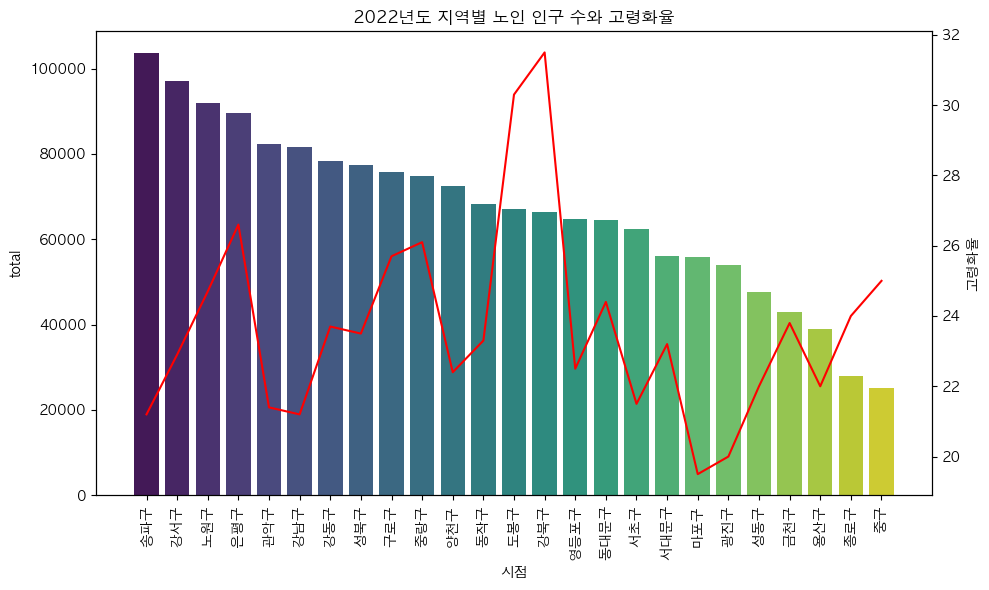

In [38]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=compare_total.index, y='total', data=compare_total, palette='viridis', dodge = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax2 = plt.gca().twinx()
ax2.plot(compare_total.index, compare_total['2022'], color = 'red')
ax2.set_ylim(ax2.get_ylim())

plt.xlabel('지역')
plt.ylabel('고령화율')
plt.title('2022년도 지역별 노인 인구 수와 고령화율')
plt.tight_layout()
plt.show()

In [39]:
pd.set_option('display.max_columns', None)
dt = pd.read_csv('jobforelderly.csv', encoding='cp949')
dt.head()

,사업유형,사업번호,사업계획변경순번,사업년도,계속사업여부,계속사업시작연도,사업유형코드,비예산여부,특수사업명코드,사업명,관활시도명,시군구코드,관할시군구,기관ID,수행기관시도명,수행기관시군구,사업기간시작일,사업기간종료일,사업계획서상태코드,목표일자리수,최초등록첨부파일,최근승인첨부파일,삭제여부
0,공익활동형,2022-08032,2,2022,Y,2010,학교급식 지원봉사(A-07),N,105001,초등학교급식지원사업,광주광역시,2917000000,북구,160,광주광역시,북구,2022-01-03,2022-12-31,승인완료,180,2022년 초등학교급식지원사업 사업계획서.hwp,2022년+초등학교급식지원사업+사업계획서.hwp,N
1,시장형,2022-11915,3,2022,Y,2021,기타(E-11),N,105001,The반디사업,부산광역시,2635000000,해운대구,2612,부산광역시,해운대구,2022-01-03,2022-12-31,승인완료,12,2022년 The반디사업.hwp,2022년+The반디사업+사업계획서_예산변경.hwp,N
2,공익활동형,2022-00022,2,2022,Y,2012,공원 놀이터 등 공공시설 봉사(A-13),N,105001,"공원,놀이터 등 공공시설봉사",경상북도,4783000000,고령군,414,경상북도,고령군,2022-01-03,2022-12-31,승인완료,173,"2022++공원,놀이터+공공시설봉사.hwp","2022++공원,놀이터+공공시설봉사(변경).hwp",N
3,사회서비스형,2022-12856,2,2022,N,2022,취약계층 공익증진 서비스(B-09),N,105001,시니어 금융서비스지원,경기도,4163000000,양주시,225083,경기도,양주시,2022-02-01,2022-12-20,승인완료,4,22년+사회서비스형+시니어금융지원+사업계획서 (1)최종.hwp,22년+사회서비스형+승강기+사업계획서+최종(11. 4).hwp,N
4,공익활동형,2022-09442,2,2022,Y,2018,학교급식 지원봉사(A-07),N,105001,사랑의 배식 사업,강원도,4215000000,강릉시,486,강원도,강릉시,2022-01-01,2022-12-31,승인완료,150,2022년 공익형 (사랑의 배식사업).hwp,2022년 공익형 (사랑의 배식사업)_변경.hwp,N


In [40]:
seoul_dt = dt[dt['수행기관시도명'] == '서울특별시']
seoul_dt.head()

,사업유형,사업번호,사업계획변경순번,사업년도,계속사업여부,계속사업시작연도,사업유형코드,비예산여부,특수사업명코드,사업명,관활시도명,시군구코드,관할시군구,기관ID,수행기관시도명,수행기관시군구,사업기간시작일,사업기간종료일,사업계획서상태코드,목표일자리수,최초등록첨부파일,최근승인첨부파일,삭제여부
71,시장형,2022-11407,3,2022,Y,2021,기타(E-19),N,105001,토이케어 등 교육환경개선사업,서울특별시,1114000000,중구,2538,서울특별시,중구,2022-01-01,2022-12-31,변경심사요청,25,2022년 시장형 사업계획서(토이케어).hwp,NaN,N
84,시장형,2022-11475,4,2022,N,2022,카페(E-08),N,105001,카페 나누다(茶),서울특별시,1123000000,동대문구,342083,서울특별시,동대문구,2022-06-13,2022-12-30,승인완료,20,2022년시장형사업계획서(카페+나누다) 수정본.hwp,2022년시장형사업계획서(카페+나누다) 수정본(최종)_추경(최종).hwp,N
88,시장형,2022-11505,3,2022,N,2022,아파트 택배(E-13),N,105001,아파트택배사업(띵동시니어2),서울특별시,1123000000,동대문구,342083,서울특별시,동대문구,2022-09-01,2022-12-30,승인완료,8,2022년시장형운영규정(찬나누리).hwp,시장형 사업계획안(아파트택배) 수정5 예산변경.hwp,N
100,사회서비스형,2022-10824,3,2022,Y,2021,공공행정업무지원(B-12),N,105001,공공행정 업무지원,서울특별시,1114000000,중구,1437,서울특별시,중구,2022-01-01,2022-12-31,승인완료,23,약수노인종합복지관_사업계획서_공공행정업무지원.hwp,NaN,N
127,사회서비스형,2022-11383,4,2022,Y,2019,기타(B-15),N,105001,늘찬도우미,서울특별시,1114000000,중구,2538,서울특별시,중구,2022-02-01,2022-11-30,승인완료,30,3.중림종합사회복지관_(사)사업계획서_늘찬도우미_재수정.hwp,NaN,N


In [41]:
row_count = seoul_dt.shape[0]
print(row_count)
#seoul_dt의 행의 개수는 1362. 즉, 서울에서 이루어진 사업은 1362개.

1362


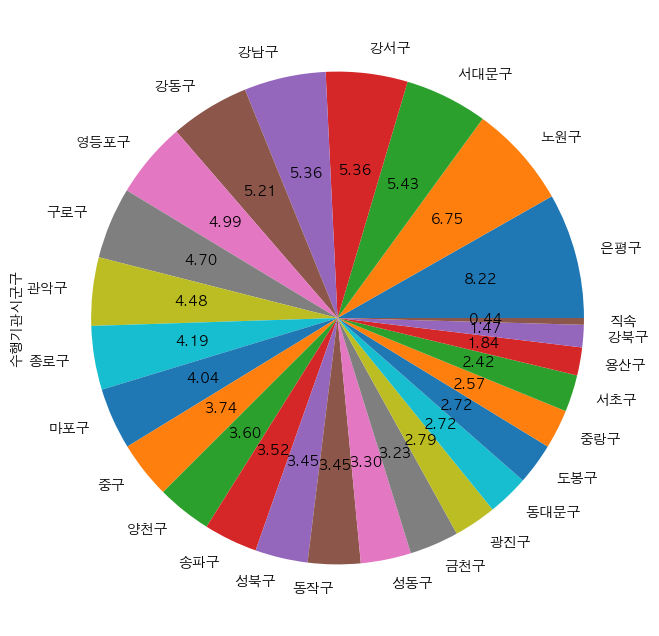

In [42]:
plt.figure(figsize = (8, 8))
ax1 = seoul_dt['수행기관시군구'].value_counts().plot.pie(autopct = '%.2f')
#구별 사업 개수를 파이그래프로 확인. 은평구에 가장 많고 강북구에 가장 적음. 숫자로는 약 100개 정도 차이.

In [43]:
total_jobs_by_region = seoul_dt.groupby('수행기관시군구')['목표일자리수'].sum().reset_index()
total_jobs_by_region.index = total_jobs_by_region.iloc[:,0]
total_jobs_by_region.drop('수행기관시군구', axis = 1, inplace = True)
total_jobs_by_region
#구별 목표일자리수를 확인.

,목표일자리수
수행기관시군구,
강남구,2948
강동구,3870
강북구,2967
강서구,3773
관악구,3631
광진구,2342
구로구,3854
금천구,3735
노원구,5430


In [44]:
compare_total = pd.concat([compare_total, total_jobs_by_region], axis = 1)
compare_total.astype('float')
compare_total

,2022,total,목표일자리수
송파구,21.2,103573.0,2276
강서구,22.9,97128.0,3773
노원구,24.7,92040.0,5430
은평구,26.6,89650.0,5168
관악구,21.4,82447.0,3631
강남구,21.2,81715.0,2948
강동구,23.7,78340.0,3870
성북구,23.5,77475.0,3507
구로구,25.7,75890.0,3854
중랑구,26.1,74920.0,2275


In [45]:
compare_total.fillna(0, inplace = True)
compare_total

,2022,total,목표일자리수
송파구,21.2,103573.0,2276
강서구,22.9,97128.0,3773
노원구,24.7,92040.0,5430
은평구,26.6,89650.0,5168
관악구,21.4,82447.0,3631
강남구,21.2,81715.0,2948
강동구,23.7,78340.0,3870
성북구,23.5,77475.0,3507
구로구,25.7,75890.0,3854
중랑구,26.1,74920.0,2275


In [46]:
compare_2022 = compare_total.sort_values(by='2022', ascending=False)
compare_2022 = compare_2022.astype('float') 
compare_2022

,2022,total,목표일자리수
강북구,31.5,66307.0,2967.0
도봉구,30.3,66998.0,2921.0
은평구,26.6,89650.0,5168.0
중랑구,26.1,74920.0,2275.0
구로구,25.7,75890.0,3854.0
중구,25.0,25055.0,2396.0
노원구,24.7,92040.0,5430.0
동대문구,24.4,64468.0,2663.0
종로구,24.0,27958.0,3056.0
금천구,23.8,42928.0,3735.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


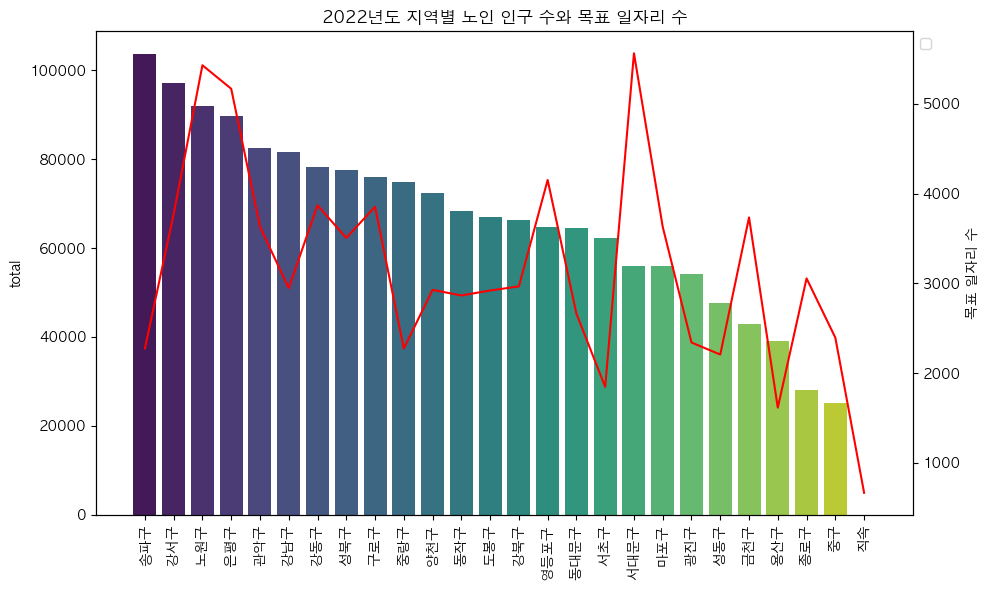

In [47]:
plt.figure(figsize = (10, 6))

ax = sns.barplot(x=compare_total.index, y='total', data=compare_total, palette='viridis', dodge = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax2 = plt.gca().twinx()
ax2.plot(compare_total.index, compare_total['목표일자리수'], color = 'red')
ax2.set_ylim(ax2.get_ylim())

plt.xlabel('지역')
plt.ylabel('목표 일자리 수')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('2022년도 지역별 노인 인구 수와 목표 일자리 수')
plt.tight_layout()
plt.show()

#구별 목표일자리수를 그래프로 확인. 서대문구, 노원구, 은평구가 가장 많다. 용산구, 서초구는 가장 적다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


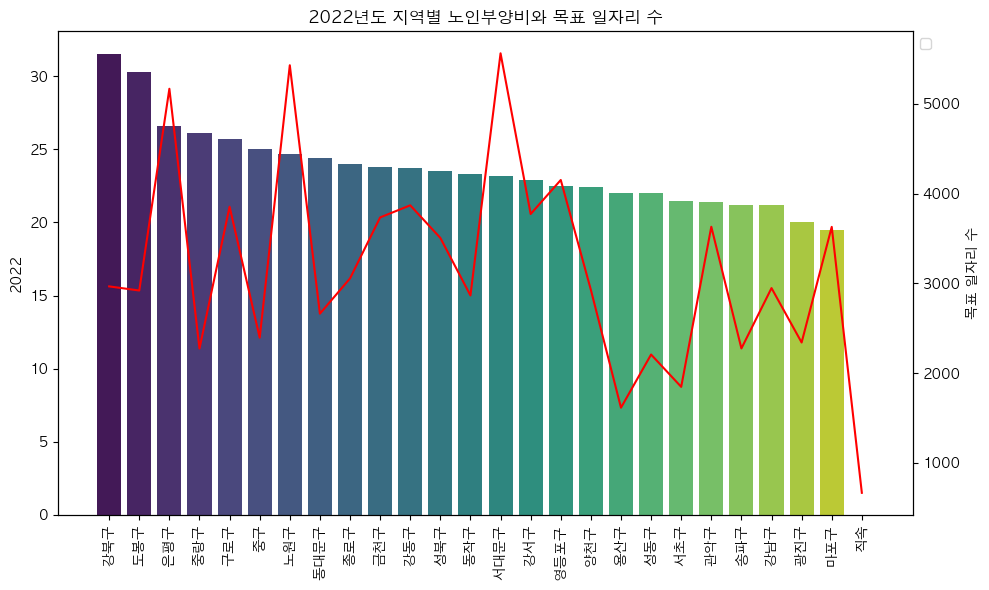

In [48]:
plt.figure(figsize = (10, 6))

ax = sns.barplot(x=compare_2022.index, y='2022', data=compare_2022, palette='viridis', dodge = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax2 = plt.gca().twinx()
ax2.plot(compare_2022.index, compare_2022['목표일자리수'], color = 'red')
ax2.set_ylim(ax2.get_ylim())

plt.xlabel('지역')
plt.ylabel('목표 일자리 수')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('2022년도 지역별 노인부양비와 목표 일자리 수')
plt.tight_layout()
plt.show()

#구별 목표일자리수를 그래프로 확인. 서대문구, 노원구, 은평구가 가장 많다. 용산구, 서초구는 가장 적다.

In [49]:
df = pd.read_csv('basic_pension.csv', encoding = 'cp949')

In [50]:
df # 2022 기준

,자치구,65세이상 노인 인구,기초연금 수급자 수,미수급자 수,수급률
0,합계,1562652,862713,699939,55.21
1,종로구,27181,13538,13643,49.81
2,중구,23478,13520,9958,57.59
3,용산구,37975,16070,21905,42.32
4,성동구,45210,23025,22185,50.93
5,광진구,50348,25883,24465,51.41
6,동대문구,60905,36893,24012,60.57
7,중랑구,69945,48307,21638,69.06
8,성북구,73130,44067,29063,60.26
9,강북구,63183,46139,17044,73.02


In [51]:
pension = df.iloc[1:, [0,4]]
pension.index = compare.index
pension.drop('자치구', axis = 1, inplace = True)
pension.astype('float')
pension = pd.DataFrame(pension)
pension

,수급률
시점,
종로구,49.81
중구,57.59
용산구,42.32
성동구,50.93
광진구,51.41
동대문구,60.57
중랑구,69.06
성북구,60.26
강북구,73.02


In [52]:
complete = pd.merge(compare, pension, left_index = True, right_index=True, how = 'outer')
complete.astype('float')
complete

,2022,total,수급률
시점,,,
종로구,24.0,27958.0,49.81
중구,25.0,25055.0,57.59
용산구,22.0,39037.0,42.32
성동구,22.0,47720.0,50.93
광진구,20.0,54071.0,51.41
동대문구,24.4,64468.0,60.57
중랑구,26.1,74920.0,69.06
성북구,23.5,77475.0,60.26
강북구,31.5,66307.0,73.02


In [53]:
econ_level = pd.read_csv('econ_level.csv')

In [54]:
econ_level

,시군구별(1),시군구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11
0,시군구별(1),시군구별(2),계,계,노령연금(20년이상),노령연금(20년이상),노령연금(10년~20년미만),노령연금(10년~20년미만),조기노령연금,조기노령연금,특례노령연금,특례노령연금,분할연금,분할연금
1,시군구별(1),시군구별(2),수급자수 (명),금액 (천원),수급자수 (명),금액 (천원),수급자수 (명),금액 (천원),수급자수 (명),금액 (천원),수급자수 (명),금액 (천원),수급자수 (명),금액 (천원)
2,합계,소계,5396729,29544090373,958083,10095202468,2334973,10609410912,765342,5291090842,1269485,3376769203,68846,171616949
3,서울,소계,942253,5490948748,178493,2053436384,449658,2136743234,92224,671265137,209047,594859210,12831,34644783
4,서울,종로구,14225,80142786,2378,27152396,6810,33623875,1086,7868492,3792,11107279,159,390744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,경남,거창군,9942,44126663,1329,11848195,3595,15081109,1215,7803462,3715,9218365,88,175532
244,경남,합천군,9370,42281522,1236,11177912,3282,13920122,1147,7832503,3654,9232092,51,118894
245,제주,소계,66868,333016884,10521,102799347,28153,123547609,7232,48118879,20243,56731170,719,1819880
246,제주,제주시,44917,227382658,7317,72211588,19277,84760256,5212,34898608,12613,34269640,498,1242567


In [55]:
seoul_econ = econ_level[econ_level['시군구별(1)'] == '서울']
seoul_econ = seoul_econ.iloc[1:, list(range(1, 3)) + list(range(4, seoul_econ.shape[1]))]
seoul_econ.columns = ['region', 'sum_num', '20s_num', '20s_pri', '10s_num', '10s_pri', 'pre_num', 'pre_pri', 'spe_num', 'spe_pri', 'div_num', 'div_pri' ]
seoul_econ.index = seoul_econ['region']
seoul_econ.drop('region', axis = 1, inplace = True)
seoul_econ = seoul_econ.astype('float')

In [56]:
seoul_econ

,sum_num,20s_num,20s_pri,10s_num,10s_pri,pre_num,pre_pri,spe_num,spe_pri,div_num,div_pri
region,,,,,,,,,,,
종로구,14225.0,2378.0,27152396.0,6810.0,33623875.0,1086.0,7868492.0,3792.0,11107279.0,159.0,390744.0
중구,12567.0,1983.0,21580937.0,6210.0,28852802.0,979.0,6504684.0,3241.0,8925991.0,154.0,373639.0
용산구,20561.0,4068.0,51025207.0,9570.0,48700582.0,1718.0,12630323.0,4960.0,15179058.0,245.0,699908.0
성동구,27283.0,5213.0,59693897.0,13100.0,62060846.0,2400.0,17502246.0,6258.0,17434008.0,312.0,894003.0
광진구,31496.0,5846.0,65112261.0,15528.0,72969058.0,2959.0,21418147.0,6720.0,19469524.0,443.0,1231070.0
동대문구,34786.0,5591.0,56362089.0,17105.0,77231358.0,2946.0,19508385.0,8703.0,22636407.0,441.0,1160383.0
중랑구,41495.0,6399.0,61983571.0,21158.0,92638955.0,3801.0,24215787.0,9499.0,24770740.0,638.0,1532561.0
성북구,42149.0,7032.0,75422849.0,20114.0,91970263.0,3970.0,28017633.0,10524.0,28303207.0,509.0,1308370.0
강북구,34254.0,4400.0,42638141.0,16988.0,74034643.0,3245.0,20032768.0,9107.0,23601217.0,514.0,1135186.0


In [57]:
seoul_econ['20s_individual'] = seoul_econ['20s_pri']/seoul_econ['20s_num']
seoul_econ['20s_ratio'] = seoul_econ['20s_num']/seoul_econ['sum_num']
seoul_econ['10s_individual'] = seoul_econ['10s_pri']/seoul_econ['10s_num']
seoul_econ['10s_ratio'] = seoul_econ['10s_num']/seoul_econ['sum_num']
seoul_econ['pre_individual'] = seoul_econ['pre_pri']/seoul_econ['pre_num']
seoul_econ['pre_ratio'] = seoul_econ['pre_num']/seoul_econ['sum_num']
seoul_econ['spe_individual'] = seoul_econ['spe_pri']/seoul_econ['spe_num']
seoul_econ['spe_ratio'] = seoul_econ['spe_num']/seoul_econ['sum_num']
seoul_econ['div_individual'] = seoul_econ['div_pri']/seoul_econ['div_num']
seoul_econ['div_ratio'] = seoul_econ['div_num']/seoul_econ['sum_num']
seoul_econ = seoul_econ.iloc[:,11:]
seoul_econ

,20s_individual,20s_ratio,10s_individual,10s_ratio,pre_individual,pre_ratio,spe_individual,spe_ratio,div_individual,div_ratio
region,,,,,,,,,,
종로구,11418.164844,0.167170,4937.426579,0.478735,7245.388582,0.076344,2929.134757,0.266573,2457.509434,0.011178
중구,10882.973777,0.157794,4646.183897,0.494151,6644.212462,0.077902,2754.085467,0.257898,2426.227273,0.012254
용산구,12543.069567,0.197850,5088.880042,0.465444,7351.759604,0.083556,3060.293952,0.241233,2856.767347,0.011916
성동구,11450.968157,0.191071,4737.469160,0.480152,7292.602500,0.087967,2785.875360,0.229374,2865.394231,0.011436
광진구,11137.916695,0.185611,4699.192298,0.493015,7238.305847,0.093948,2897.250595,0.213360,2778.939052,0.014065
동대문구,10080.860132,0.160726,4515.133470,0.491721,6621.990835,0.084689,2600.988969,0.250187,2631.253968,0.012678
중랑구,9686.446476,0.154211,4378.436289,0.509893,6370.898974,0.091601,2607.720813,0.228919,2402.133229,0.015375
성북구,10725.661121,0.166837,4572.450184,0.477212,7057.338287,0.094190,2689.396332,0.249686,2570.471513,0.012076
강북구,9690.486591,0.128452,4358.055274,0.495942,6173.426194,0.094733,2591.546832,0.265867,2208.533074,0.015006


In [58]:
seoul_econ['econ_figure'] = seoul_econ['20s_individual']*seoul_econ['20s_ratio'] + seoul_econ['10s_individual']*seoul_econ['10s_ratio'] + seoul_econ['pre_individual']*seoul_econ['pre_ratio'] + seoul_econ['spe_individual']*seoul_econ['spe_ratio'] + seoul_econ['div_individual']*seoul_econ['div_ratio']
seoul_econ = seoul_econ.iloc[:, -1]
seoul_econ = pd.DataFrame(seoul_econ)

In [59]:
seoul_econ 
# 노령연금 지급액 기준으로 경제적 수준 산출...하지만 노인 소득 수준 표를 보면 사실상 노령연금이 차지하는 비율은 5% 남짓밖에 되지 않음
# 노인 월평균 소득액에 대한 통계표는 2013년 기준 생성 중지

,econ_figure
region,
종로구,5633.939262
중구,5270.792791
용산구,6236.811342
성동구,5775.941062
광진구,5721.363348
동대문구,5085.339562
중랑구,4943.767056
성북구,5338.734537
강북구,4713.083290


In [60]:
complete = pd.merge(complete, seoul_econ, left_index = True, right_index=True, how = 'outer')
complete.drop('2022', axis = 1, inplace = True)
complete.astype('float')
complete

,total,수급률,econ_figure
종로구,27958.0,49.81,5633.939262
중구,25055.0,57.59,5270.792791
용산구,39037.0,42.32,6236.811342
성동구,47720.0,50.93,5775.941062
광진구,54071.0,51.41,5721.363348
동대문구,64468.0,60.57,5085.339562
중랑구,74920.0,69.06,4943.767056
성북구,77475.0,60.26,5338.734537
강북구,66307.0,73.02,4713.083290
도봉구,66998.0,67.13,5411.331367


In [61]:
complete = pd.concat([complete, total_jobs_by_region], axis = 1)
complete.astype('float')
complete

,total,수급률,econ_figure,목표일자리수
종로구,27958.0,49.81,5633.939262,3056
중구,25055.0,57.59,5270.792791,2396
용산구,39037.0,42.32,6236.811342,1616
성동구,47720.0,50.93,5775.941062,2208
광진구,54071.0,51.41,5721.363348,2342
동대문구,64468.0,60.57,5085.339562,2663
중랑구,74920.0,69.06,4943.767056,2275
성북구,77475.0,60.26,5338.734537,3507
강북구,66307.0,73.02,4713.083290,2967
도봉구,66998.0,67.13,5411.331367,2921


In [62]:
job_num_result = seoul_dt.groupby(['수행기관시군구', '사업유형'])['목표일자리수'].sum().unstack()
job_num_result

사업유형,공익활동형,사회서비스형,시장형
수행기관시군구,,,
강남구,2406,272,270
강동구,3067,509,294
강북구,2657,240,70
강서구,3215,364,194
관악구,3060,312,259
광진구,1920,272,150
구로구,3392,262,200
금천구,2945,432,358
노원구,4680,324,426


In [63]:
x = complete.iloc[:25, :3]
scaler = preprocessing.StandardScaler().fit(x)
x_scaled = pd.DataFrame(scaler.transform(x))
x_scaled.columns = ['인구수', '기초연금수급률', '경제적지표']
x_scaled.index = complete.iloc[:25].index
x_scaled

,인구수,기초연금수급률,경제적지표
종로구,-1.965626,-0.430979,-0.195467
중구,-2.112927,0.221765,-0.695199
용산구,-1.403467,-1.059391,0.634156
성동구,-0.962883,-0.337010,-0.000056
광진구,-0.640627,-0.296738,-0.075161
동대문구,-0.113073,0.471788,-0.950405
중랑구,0.417271,1.184100,-1.145225
성북구,0.546915,0.445779,-0.601703
강북구,-0.019761,1.516345,-1.462673
도봉구,0.015301,1.022173,-0.501802


In [64]:
complete = pd.concat([complete,x_scaled, job_num_result], axis = 1)
complete.astype('float')
complete

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388


In [65]:
complete['ratio'] = complete['공익활동형']/complete['목표일자리수']
complete

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265


In [66]:
complete.loc[['종로구','중구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917


In [67]:
complete.loc[['송파구', '서초구', '강남구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio
송파구,103573.0,37.28,6932.655457,2276,1.871152,-1.482248,1.591719,1795,284,197,0.788664
서초구,62347.0,25.70,7600.138994,1848,-0.220695,-2.453813,2.510255,1386,252,210,0.750000
강남구,81715.0,26.91,7742.290228,2948,0.762056,-2.352293,2.705872,2406,272,270,0.816147


In [68]:
complete.loc[['노원구', '은평구', '강서구']] 

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio
노원구,92040.0,67.10,5448.698395,5430,1.285957,1.019656,-0.450380,4680,324,426,0.861878
은평구,89650.0,65.73,5212.596334,5168,1.164686,0.904713,-0.775284,4005,390,773,0.774961
강서구,97128.0,62.56,5796.389899,3773,1.544127,0.638749,0.028084,3215,364,194,0.852107


In [69]:
complete.loc[['성동구', '용산구', '금천구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272
금천구,42928.0,65.00,5201.722010,3735,-1.206034,0.843466,-0.790249,2945,432,358,0.788487


In [70]:
complete.loc[['동작구','강북구', '도봉구', '동대문구', '영등포구', '광진구', '서대문구', '마포구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio
동작구,68231.0,49.46,5979.168960,2866,0.077865,-0.460344,0.279610,2503,245,118,0.873343
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663
영등포구,64810.0,47.56,6109.464619,4152,-0.095720,-0.619754,0.458912,3160,358,634,0.761079
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812
서대문구,55996.0,61.30,5516.471036,5563,-0.542951,0.533035,-0.357117,5154,283,126,0.926479
마포구,55914.0,52.45,5830.174753,3630,-0.547111,-0.209482,0.074576,3251,205,174,0.895592


In [71]:
complete.loc[['관악구', '양천구', '중랑구', '구로구', '성북구', '강동구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio
관악구,82447.0,59.93,5176.701659,3631,0.799199,0.418092,-0.824680,3060,312,259,0.842743
양천구,72393.0,58.51,6122.788713,2928,0.289049,0.298953,0.477247,2557,251,120,0.873292
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253
구로구,75890.0,60.95,5578.649883,3854,0.466490,0.503670,-0.271552,3392,262,200,0.880125
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147
강동구,78340.0,51.13,6020.525214,3870,0.590805,-0.320230,0.336521,3067,509,294,0.792506


In [72]:
complete.fillna(0, inplace = True)
complete

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265


In [73]:
complete_new = complete.drop('직속')
complete_new

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import PolynomialFeatures
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [75]:
model = LinearRegression()

In [76]:
y = np.array(complete['목표일자리수'])
x = np.array(complete.iloc[:, 4:7])

Y = np.array(complete_new['목표일자리수'])
X = np.array(complete_new.iloc[:, 4:7])

In [77]:
y = y.reshape(-1,1)
Y = Y.reshape(-1,1)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('학습 데이터셋의 데이터 수 : ', len(x_train))
print('테스트 데이터셋의 데이터 수 : ', len(y_test))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print('학습 데이터셋의 데이터 수 : ', len(X_train))
print('테스트 데이터셋의 데이터 수 : ', len(Y_test))

학습 데이터셋의 데이터 수 :  20
테스트 데이터셋의 데이터 수 :  6
학습 데이터셋의 데이터 수 :  20
테스트 데이터셋의 데이터 수 :  5


In [79]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)

model.fit(x_scaled, y_train)
print("계수: ", model.coef_)
print("절편: ", model.intercept_)

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

model.fit(X_scaled, y_train)
print("계수: ", model.coef_)
print("절편: ", model.intercept_)

계수:  [[135.23967554 924.58914132 615.78507273]]
절편:  [3250.9]
계수:  [[-237.75526955 -249.34626458 -144.86194207]]
절편:  [3250.9]


In [80]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_scaled = scaler.transform(x_test)

predictions = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("이상치 제거 x")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

predictions = model.predict(X_test_scaled)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)

print("이상치 제거 o")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

이상치 제거 x
Mean Squared Error (MSE): 2698769.014712407
Mean Absolute Error (MAE): 1438.2572844900667
이상치 제거 o
Mean Squared Error (MSE): 2805825.844073847
Mean Absolute Error (MAE): 1390.213065225819


In [81]:
model2 = RandomForestRegressor()

In [82]:
rf_run = RandomForestRegressor(n_estimators=1000, random_state=0, bootstrap = True)

model2.fit(x_scaled, y_train)

predict2 = model2.predict(x_test_scaled)

mse = mean_squared_error(y_test, predict2)
mae = mean_absolute_error(y_test, predict2)

print("이상치 제거 x")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

rf_run = RandomForestRegressor(n_estimators=1000, random_state=0, bootstrap = True)

model2.fit(X_scaled, Y_train)

predict2 = model2.predict(X_test_scaled)

mse = mean_squared_error(Y_test, predict2)
mae = mean_absolute_error(Y_test, predict2)

print("이상치 제거 o")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

이상치 제거 x
Mean Squared Error (MSE): 2149079.7462333334
Mean Absolute Error (MAE): 1187.5633333333335
이상치 제거 o
Mean Squared Error (MSE): 1266541.43652
Mean Absolute Error (MAE): 1066.636


/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


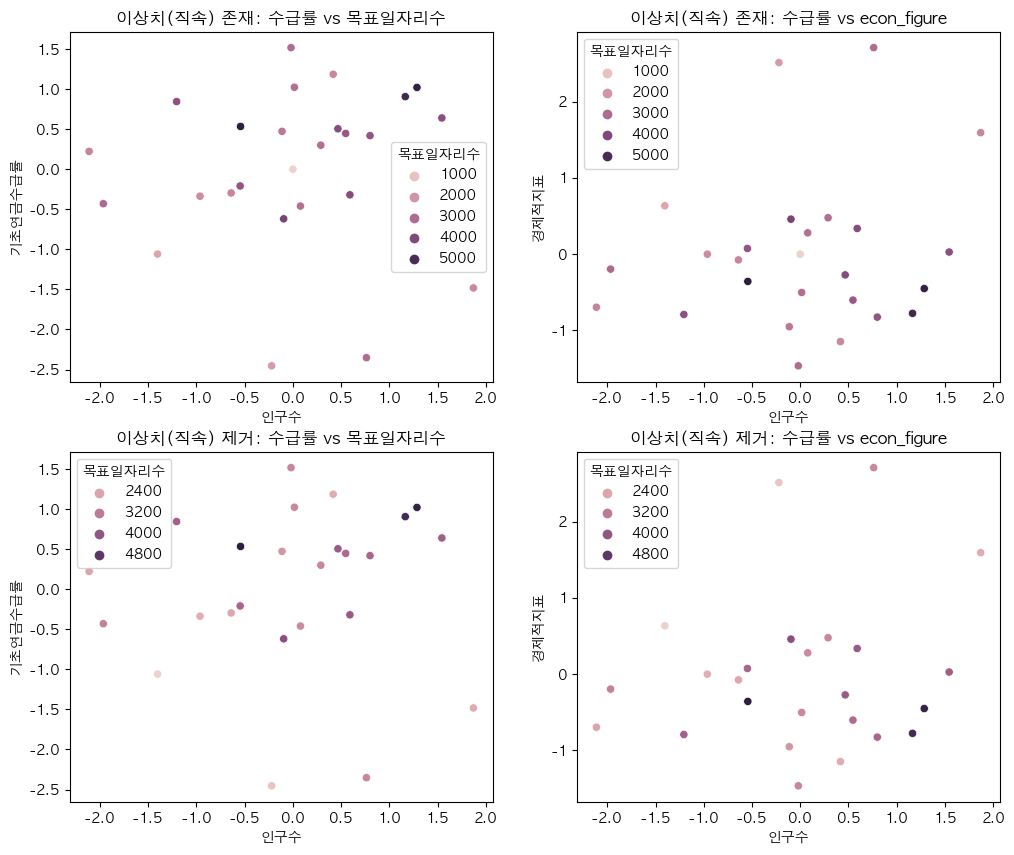

In [83]:
f, ax = plt.subplots(2,2,figsize=(12,10))

sns.scatterplot(x='인구수', y='기초연금수급률', data=complete, hue='목표일자리수', ax=ax[0,0])
ax[0,0].set_title('이상치(직속) 존재: 수급률 vs 목표일자리수')

sns.scatterplot(x='인구수', y='경제적지표', data=complete, hue='목표일자리수', ax=ax[0,1])
ax[0,1].set_title('이상치(직속) 존재: 수급률 vs econ_figure')

sns.scatterplot(x='인구수', y='기초연금수급률', data=complete_new, hue='목표일자리수', ax=ax[1,0])
ax[1,0].set_title('이상치(직속) 제거: 수급률 vs 목표일자리수')

sns.scatterplot(x='인구수', y='경제적지표', data=complete_new, hue='목표일자리수', ax=ax[1,1])
ax[1,1].set_title('이상치(직속) 제거: 수급률 vs econ_figure')

plt.show()

In [84]:
model = KMeans(n_clusters = 3, init = 'random', n_init = 100, algorithm='auto')

feature_scaled = complete[['인구수', '기초연금수급률']]
model.fit(feature_scaled)
predict = pd.DataFrame(model.predict(feature_scaled))
predict.columns=['predict']
predict.index = complete.index

feature_scaled2 = complete[['인구수', '경제적지표']]
model.fit(feature_scaled2)
predict2 = pd.DataFrame(model.predict(feature_scaled2))
predict2.columns=['predict2']
predict2.index = complete.index

feature_scaled3 = complete_new[['인구수', '기초연금수급률']]
model.fit(feature_scaled3)
predict3 = pd.DataFrame(model.predict(feature_scaled3))
predict3.columns=['predict3']
predict3.index = complete_new.index

feature_scaled4 = complete_new[['인구수', '경제적지표']]
model.fit(feature_scaled4)
predict4 = pd.DataFrame(model.predict(feature_scaled4))
predict4.columns=['predict4']
predict4.index = complete_new.index

/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Text(0.5, 1.0, 'KMeans Clustering')

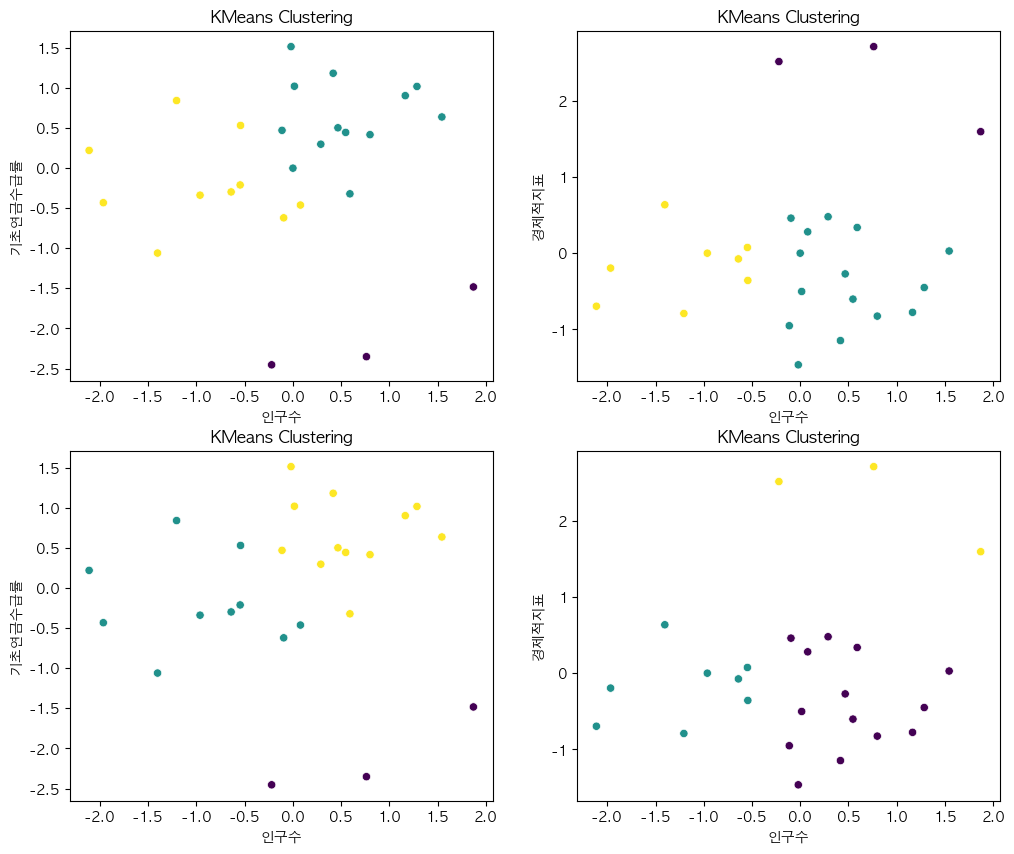

In [85]:
complete_with_clusters = pd.concat([complete, predict, predict2, predict3, predict4], axis=1)

f, ax = plt.subplots(2,2,figsize=(12,10))

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['기초연금수급률'], c=complete_with_clusters['predict'], cmap='viridis', ax=ax[0,0])
ax[0,0].set_title('KMeans Clustering')

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['경제적지표'], c=complete_with_clusters['predict2'], cmap='viridis', ax= ax[0,1])
ax[0,1].set_title('KMeans Clustering')

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['기초연금수급률'], c=complete_with_clusters['predict3'], cmap='viridis', ax=ax[1,0])
ax[1,0].set_title('KMeans Clustering')

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['경제적지표'], c=complete_with_clusters['predict4'], cmap='viridis', ax = ax[1,1])
ax[1,1].set_title('KMeans Clustering')

In [86]:
model = KMeans(n_clusters = 4, init = 'random', n_init = 100, algorithm='auto')

model.fit(feature_scaled)
predict = pd.DataFrame(model.predict(feature_scaled))
predict.columns=['predict']
predict.index = complete.index

model.fit(feature_scaled2)
predict2 = pd.DataFrame(model.predict(feature_scaled2))
predict2.columns=['predict2']
predict2.index = complete.index

model.fit(feature_scaled3)
predict3 = pd.DataFrame(model.predict(feature_scaled3))
predict3.columns=['predict3']
predict3.index = complete_new.index

model.fit(feature_scaled4)
predict4 = pd.DataFrame(model.predict(feature_scaled4))
predict4.columns=['predict4']
predict4.index = complete_new.index

/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Text(0.5, 1.0, 'KMeans Clustering')

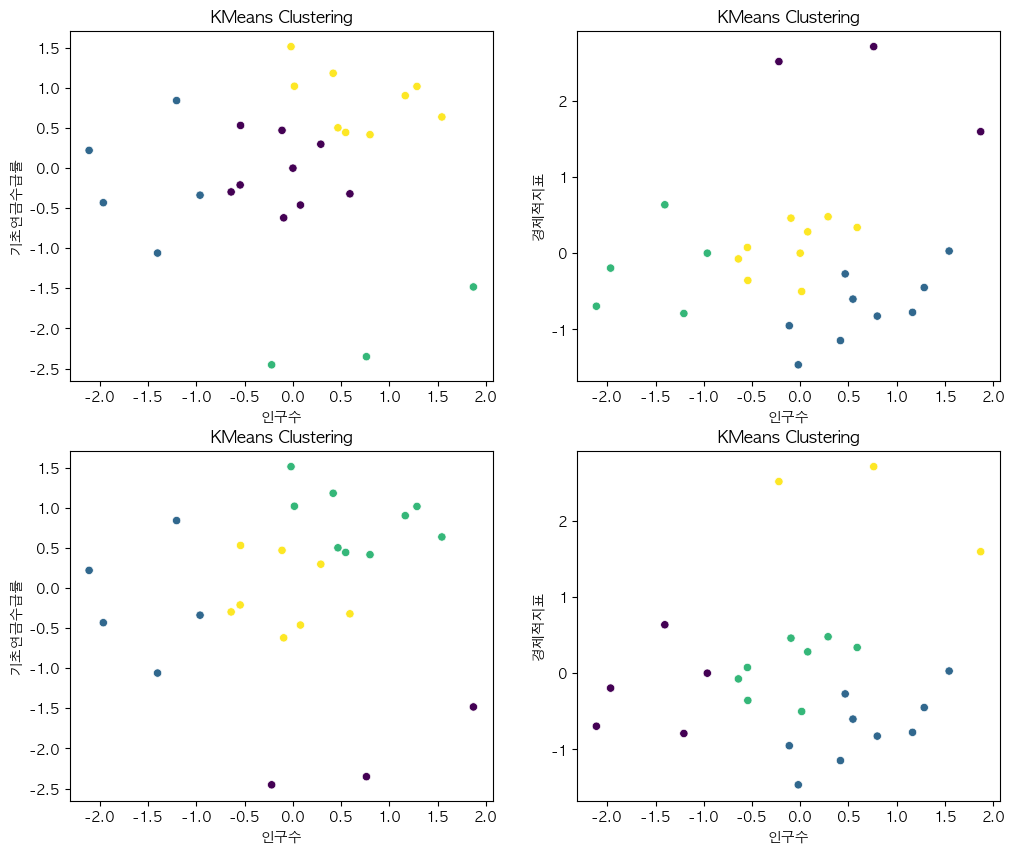

In [87]:
complete_with_clusters = pd.concat([complete, predict, predict2, predict3, predict4], axis=1)

f, ax = plt.subplots(2,2,figsize=(12,10))

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['기초연금수급률'], c=complete_with_clusters['predict'], cmap='viridis', ax=ax[0,0])
ax[0,0].set_title('KMeans Clustering')

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['경제적지표'], c=complete_with_clusters['predict2'], cmap='viridis', ax= ax[0,1])
ax[0,1].set_title('KMeans Clustering')

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['기초연금수급률'], c=complete_with_clusters['predict3'], cmap='viridis', ax=ax[1,0])
ax[1,0].set_title('KMeans Clustering')

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['경제적지표'], c=complete_with_clusters['predict4'], cmap='viridis', ax = ax[1,1])
ax[1,1].set_title('KMeans Clustering')

In [88]:
complete_with_clusters

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict,predict2,predict3,predict4
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969,1,2,1.0,0.0
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917,1,2,1.0,0.0
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272,1,2,1.0,0.0
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149,1,2,1.0,0.0
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812,0,3,3.0,2.0
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663,0,1,3.0,1.0
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253,3,1,2.0,1.0
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147,3,1,2.0,1.0
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517,3,1,2.0,1.0
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265,3,3,2.0,2.0


In [89]:
model = KMeans(n_clusters = 5, init = 'random', n_init = 100, algorithm='auto')

model.fit(feature_scaled)
predict = pd.DataFrame(model.predict(feature_scaled))
predict.columns=['predict']
predict.index = complete.index

model.fit(feature_scaled2)
predict2 = pd.DataFrame(model.predict(feature_scaled2))
predict2.columns=['predict2']
predict2.index = complete.index

model.fit(feature_scaled3)
predict3 = pd.DataFrame(model.predict(feature_scaled3))
predict3.columns=['predict3']
predict3.index = complete_new.index

model.fit(feature_scaled4)
predict4 = pd.DataFrame(model.predict(feature_scaled4))
predict4.columns=['predict4']
predict4.index = complete_new.index

/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Text(0.5, 1.0, 'KMeans Clustering')

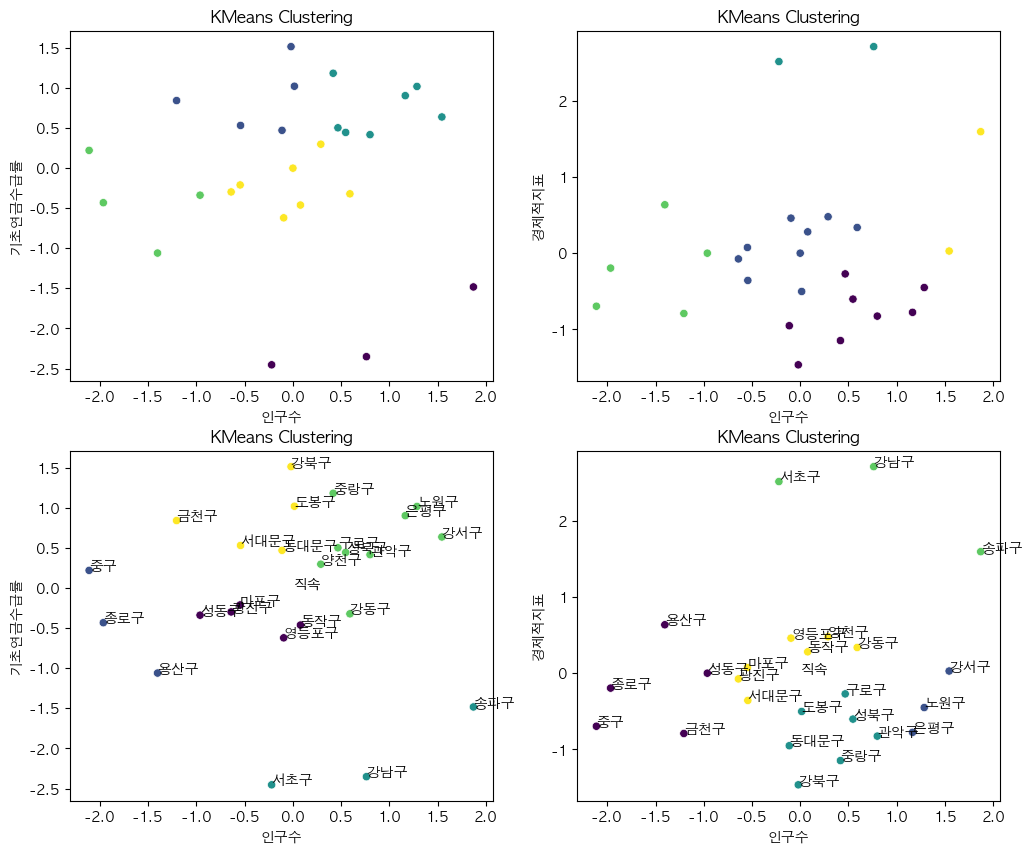

In [90]:
complete_with_clusters = pd.concat([complete, predict, predict2, predict3, predict4], axis=1)

f, ax = plt.subplots(2,2,figsize=(12,10))

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['기초연금수급률'], c=complete_with_clusters['predict'], cmap='viridis', ax=ax[0,0])
ax[0,0].set_title('KMeans Clustering')

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['경제적지표'], c=complete_with_clusters['predict2'], cmap='viridis', ax= ax[0,1])
ax[0,1].set_title('KMeans Clustering')

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['기초연금수급률'], c=complete_with_clusters['predict3'], cmap='viridis', ax=ax[1,0])
for i in range(len(complete_with_clusters)): # 행 개수만큼 순회
    row = complete_with_clusters.iloc[i] # 한 행씩 꺼내기
    name = complete_with_clusters.index[i] # 이름이 저장된 열
    x = row['인구수'] # x좌표가 저장된 열
    y = row['기초연금수급률'] # y좌표가 저장된 열
    ax[1,0].text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
ax[1,0].set_title('KMeans Clustering')

sns.scatterplot(x = complete_with_clusters['인구수'], y = complete_with_clusters['경제적지표'], c=complete_with_clusters['predict4'], cmap='viridis', ax = ax[1,1])
for i in range(len(complete_with_clusters)): # 행 개수만큼 순회
    row = complete_with_clusters.iloc[i] # 한 행씩 꺼내기
    name = complete_with_clusters.index[i] # 이름이 저장된 열
    x = row['인구수'] # x좌표가 저장된 열
    y = row['경제적지표'] # y좌표가 저장된 열
    ax[1,1].text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
ax[1,1].set_title('KMeans Clustering')

In [91]:
complete_with_clusters = pd.concat([complete_new, predict3, predict4], axis=1)
complete_with_clusters

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict3,predict4
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969,1,0
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917,1,0
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272,1,0
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149,0,0
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812,0,4
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663,4,2
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253,3,2
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147,3,2
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517,4,2
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265,4,2


In [92]:
complete_with_clusters[complete_with_clusters['predict3'] == 0]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict3,predict4
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149,0,0
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812,0,4
마포구,55914.0,52.45,5830.174753,3630,-0.547111,-0.209482,0.074576,3251,205,174,0.895592,0,4
영등포구,64810.0,47.56,6109.464619,4152,-0.095720,-0.619754,0.458912,3160,358,634,0.761079,0,4
동작구,68231.0,49.46,5979.168960,2866,0.077865,-0.460344,0.279610,2503,245,118,0.873343,0,4


In [93]:
complete_with_clusters[complete_with_clusters['predict3'] == 1]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict3,predict4
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969,1,0
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917,1,0
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272,1,0


In [94]:
complete_with_clusters[complete_with_clusters['predict3'] == 2]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict3,predict4
서초구,62347.0,25.70,7600.138994,1848,-0.220695,-2.453813,2.510255,1386,252,210,0.750000,2,3
강남구,81715.0,26.91,7742.290228,2948,0.762056,-2.352293,2.705872,2406,272,270,0.816147,2,3
송파구,103573.0,37.28,6932.655457,2276,1.871152,-1.482248,1.591719,1795,284,197,0.788664,2,3


In [95]:
complete_with_clusters[complete_with_clusters['predict3'] == 3]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict3,predict4
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253,3,2
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147,3,2
노원구,92040.0,67.10,5448.698395,5430,1.285957,1.019656,-0.450380,4680,324,426,0.861878,3,1
은평구,89650.0,65.73,5212.596334,5168,1.164686,0.904713,-0.775284,4005,390,773,0.774961,3,1
양천구,72393.0,58.51,6122.788713,2928,0.289049,0.298953,0.477247,2557,251,120,0.873292,3,4
강서구,97128.0,62.56,5796.389899,3773,1.544127,0.638749,0.028084,3215,364,194,0.852107,3,1
구로구,75890.0,60.95,5578.649883,3854,0.466490,0.503670,-0.271552,3392,262,200,0.880125,3,2
관악구,82447.0,59.93,5176.701659,3631,0.799199,0.418092,-0.824680,3060,312,259,0.842743,3,2
강동구,78340.0,51.13,6020.525214,3870,0.590805,-0.320230,0.336521,3067,509,294,0.792506,3,4


In [96]:
complete_with_clusters[complete_with_clusters['predict3'] == 4]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict3,predict4
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663,4,2
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517,4,2
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265,4,2
서대문구,55996.0,61.30,5516.471036,5563,-0.542951,0.533035,-0.357117,5154,283,126,0.926479,4,4
금천구,42928.0,65.00,5201.722010,3735,-1.206034,0.843466,-0.790249,2945,432,358,0.788487,4,0


In [97]:
complete_with_clusters[complete_with_clusters['predict4'] == 0]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict3,predict4
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969,1,0
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917,1,0
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272,1,0
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149,0,0
금천구,42928.0,65.00,5201.722010,3735,-1.206034,0.843466,-0.790249,2945,432,358,0.788487,4,0


In [98]:
complete_with_clusters[complete_with_clusters['predict4'] == 1]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict3,predict4
노원구,92040.0,67.10,5448.698395,5430,1.285957,1.019656,-0.450380,4680,324,426,0.861878,3,1
은평구,89650.0,65.73,5212.596334,5168,1.164686,0.904713,-0.775284,4005,390,773,0.774961,3,1
강서구,97128.0,62.56,5796.389899,3773,1.544127,0.638749,0.028084,3215,364,194,0.852107,3,1


In [99]:
complete_with_clusters[complete_with_clusters['predict4'] == 2]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict3,predict4
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663,4,2
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253,3,2
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147,3,2
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517,4,2
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265,4,2
구로구,75890.0,60.95,5578.649883,3854,0.466490,0.503670,-0.271552,3392,262,200,0.880125,3,2
관악구,82447.0,59.93,5176.701659,3631,0.799199,0.418092,-0.824680,3060,312,259,0.842743,3,2


In [100]:
complete_with_clusters[complete_with_clusters['predict4'] == 3]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict3,predict4
서초구,62347.0,25.70,7600.138994,1848,-0.220695,-2.453813,2.510255,1386,252,210,0.750000,2,3
강남구,81715.0,26.91,7742.290228,2948,0.762056,-2.352293,2.705872,2406,272,270,0.816147,2,3
송파구,103573.0,37.28,6932.655457,2276,1.871152,-1.482248,1.591719,1795,284,197,0.788664,2,3


In [101]:
complete_with_clusters[complete_with_clusters['predict4'] == 4]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict3,predict4
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812,0,4
서대문구,55996.0,61.30,5516.471036,5563,-0.542951,0.533035,-0.357117,5154,283,126,0.926479,4,4
마포구,55914.0,52.45,5830.174753,3630,-0.547111,-0.209482,0.074576,3251,205,174,0.895592,0,4
양천구,72393.0,58.51,6122.788713,2928,0.289049,0.298953,0.477247,2557,251,120,0.873292,3,4
영등포구,64810.0,47.56,6109.464619,4152,-0.095720,-0.619754,0.458912,3160,358,634,0.761079,0,4
동작구,68231.0,49.46,5979.168960,2866,0.077865,-0.460344,0.279610,2503,245,118,0.873343,0,4
강동구,78340.0,51.13,6020.525214,3870,0.590805,-0.320230,0.336521,3067,509,294,0.792506,3,4


/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

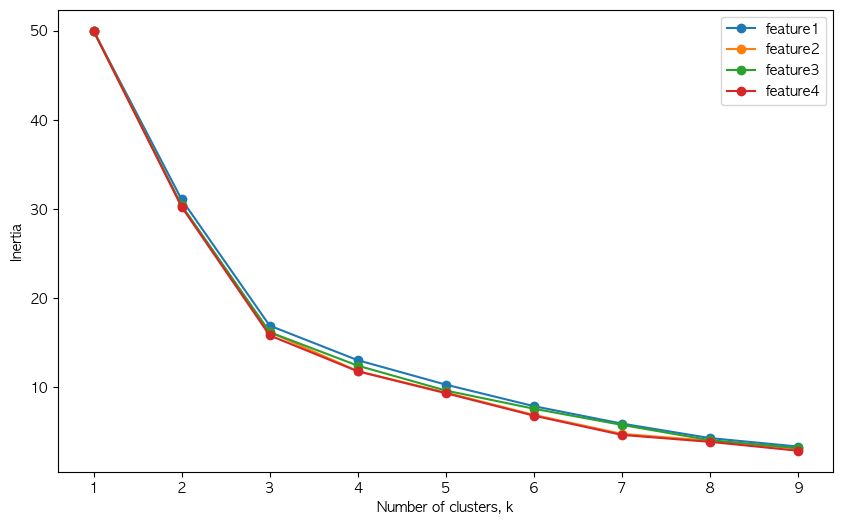

In [102]:
ks = range(1, 10)

features_list = [feature_scaled, feature_scaled2, feature_scaled3, feature_scaled4]
inertias_list = []

for features in features_list:
    inertias = []
    for k in ks:
        model = KMeans(n_clusters=k)
        model.fit(features)
        inertias.append(model.inertia_)
    inertias_list.append(inertias)

# Plotting
plt.figure(figsize=(10, 6))
for i, inertias in enumerate(inertias_list):
    plt.plot(ks, inertias, '-o', label=f'feature{i + 1}')

plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.legend()
plt.show()

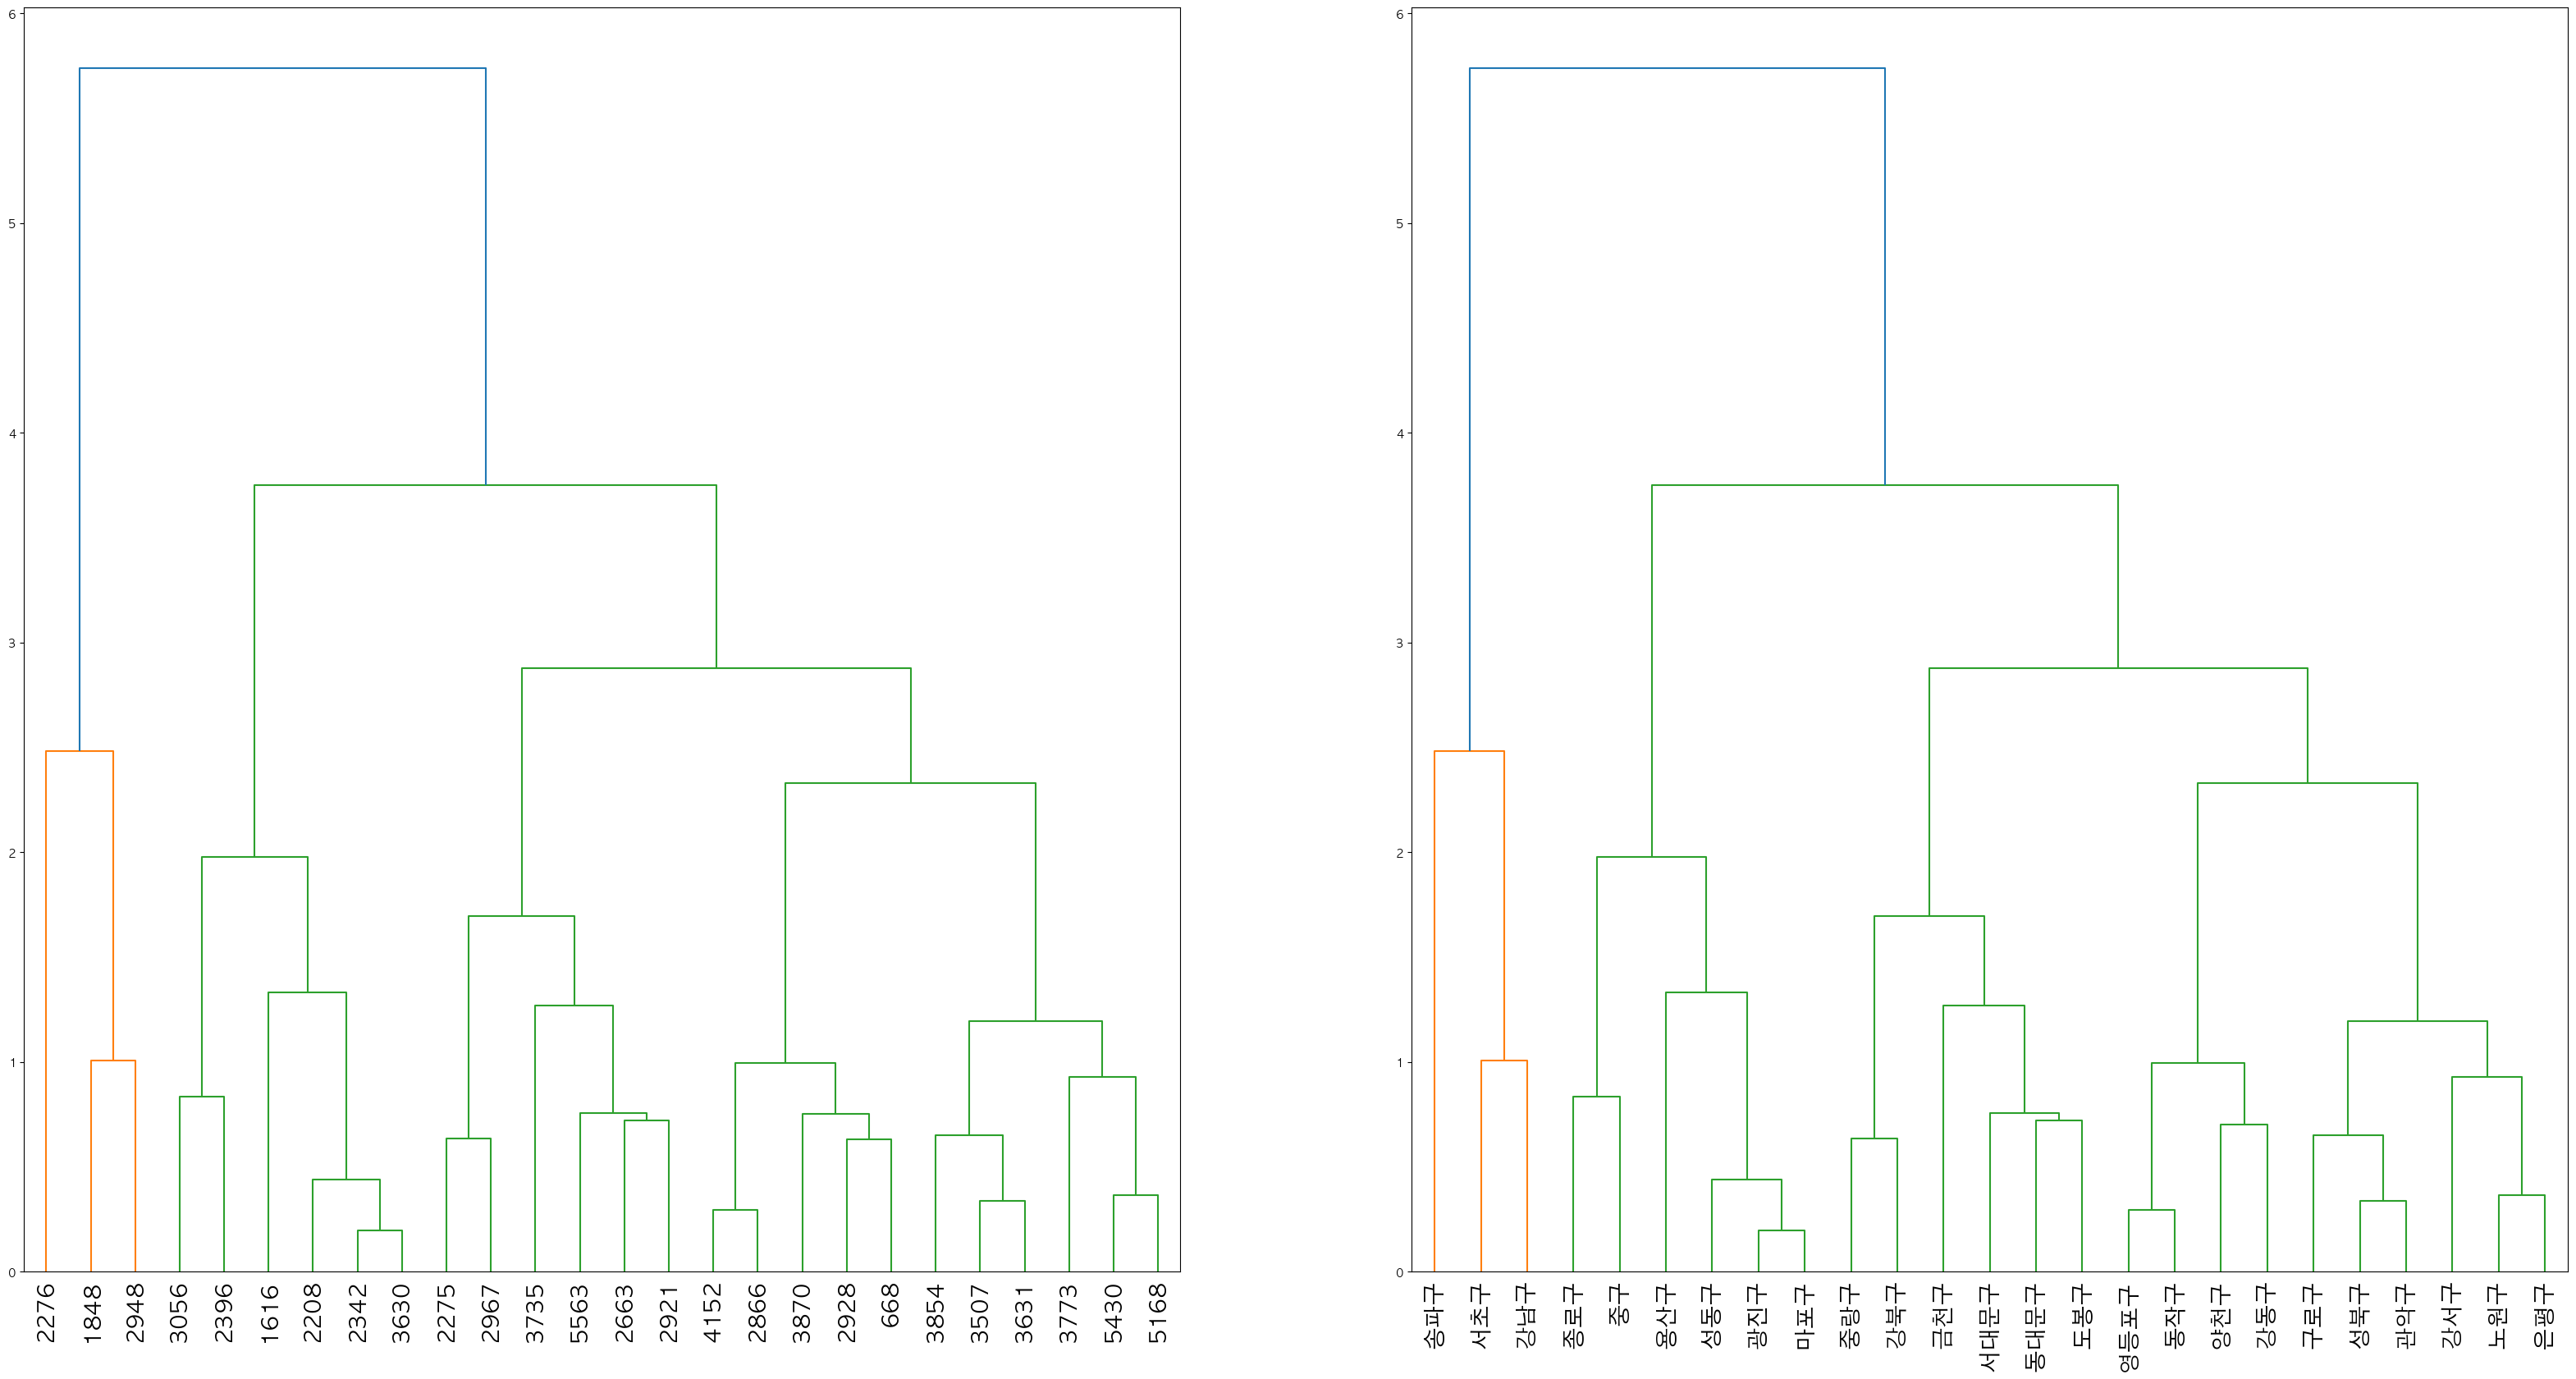

In [103]:
f, ax = plt.subplots(1,2,figsize=(40,20))

mergings = linkage(complete[['인구수','기초연금수급률', '경제적지표']], method='complete')
dendrogram(mergings, labels = complete['목표일자리수'], leaf_rotation=90, leaf_font_size=20, ax = ax[0])

mergings_new = linkage(complete_new[['인구수','기초연금수급률', '경제적지표']], method='complete')
dendrogram(mergings_new, labels = complete_new.index, leaf_rotation=90, leaf_font_size=20, ax = ax[1])

plt.show()

# 차이 크지 x

#kmeans
# 성동구 광진구 도봉구 서대문구 마포구 양천구 영등포구 동작구
# 서초구 강남구 송파구
# 성북구 노원구 은평구 강서구 구로구 관악구 강동구
# 동대문구 중랑구 강북구
# 종로구 중구 용산구 금천구

#complete
# 종로구 중구
# 성동구 용산구 금천구 광진구 서대문구 마포구
# 노원구 은평구 강서구 송파구
# 동작구 강북구 도봉구 서초구 동대문구 영등포구
# 양천구 중랑구 구로구 성북구 강동구 관악구 강남구

#average
# 종로구 중구 
# 성동구 용산구 금천구
# 송파구 강서구 노원구 은평구
# 관악구 강남구 양천구 성북구 강동구 중랑구 구로구
# 광진구 서대문구 마포구 서초구 동대문구 영등포구 동작구 강북구 도봉구

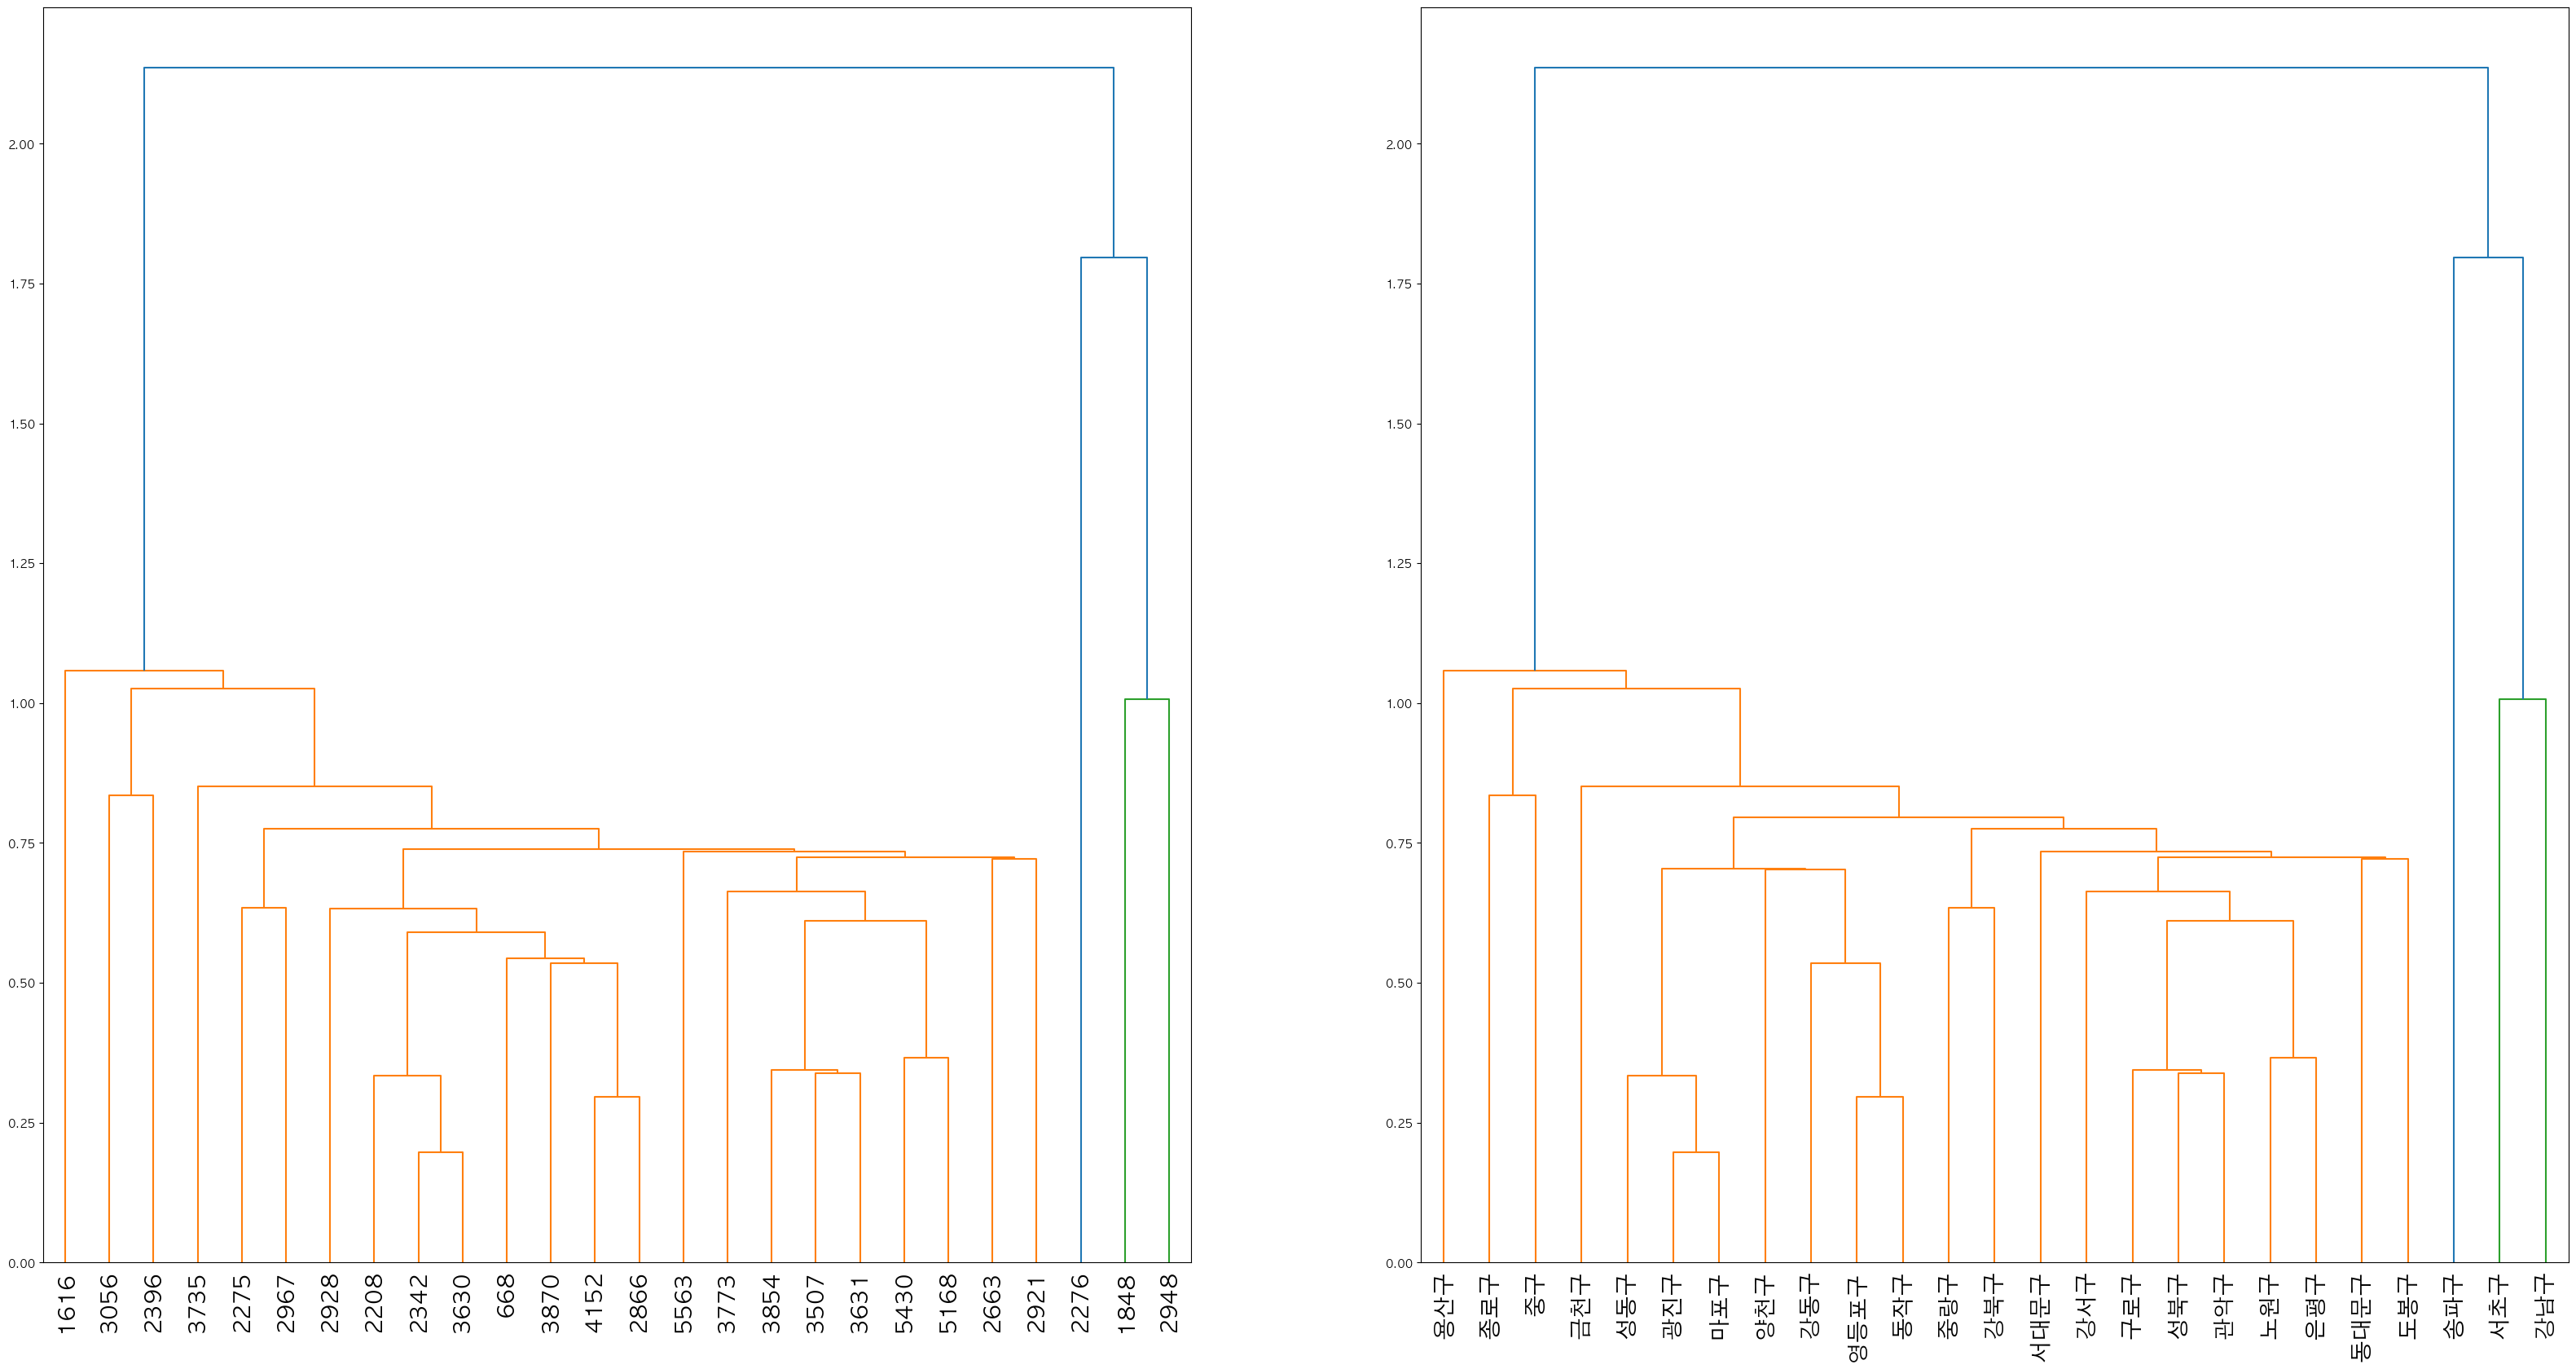

In [104]:
f, ax = plt.subplots(1,2,figsize=(40,20))

mergings = linkage(complete[['인구수','기초연금수급률', '경제적지표']], method='single')
dendrogram(mergings, labels = complete['목표일자리수'], leaf_rotation=90, leaf_font_size=20, ax = ax[0])

mergings_new = linkage(complete_new[['인구수','기초연금수급률', '경제적지표']], method='single')
dendrogram(mergings_new, labels = complete_new.index, leaf_rotation=90, leaf_font_size=20, ax = ax[1])

plt.show()

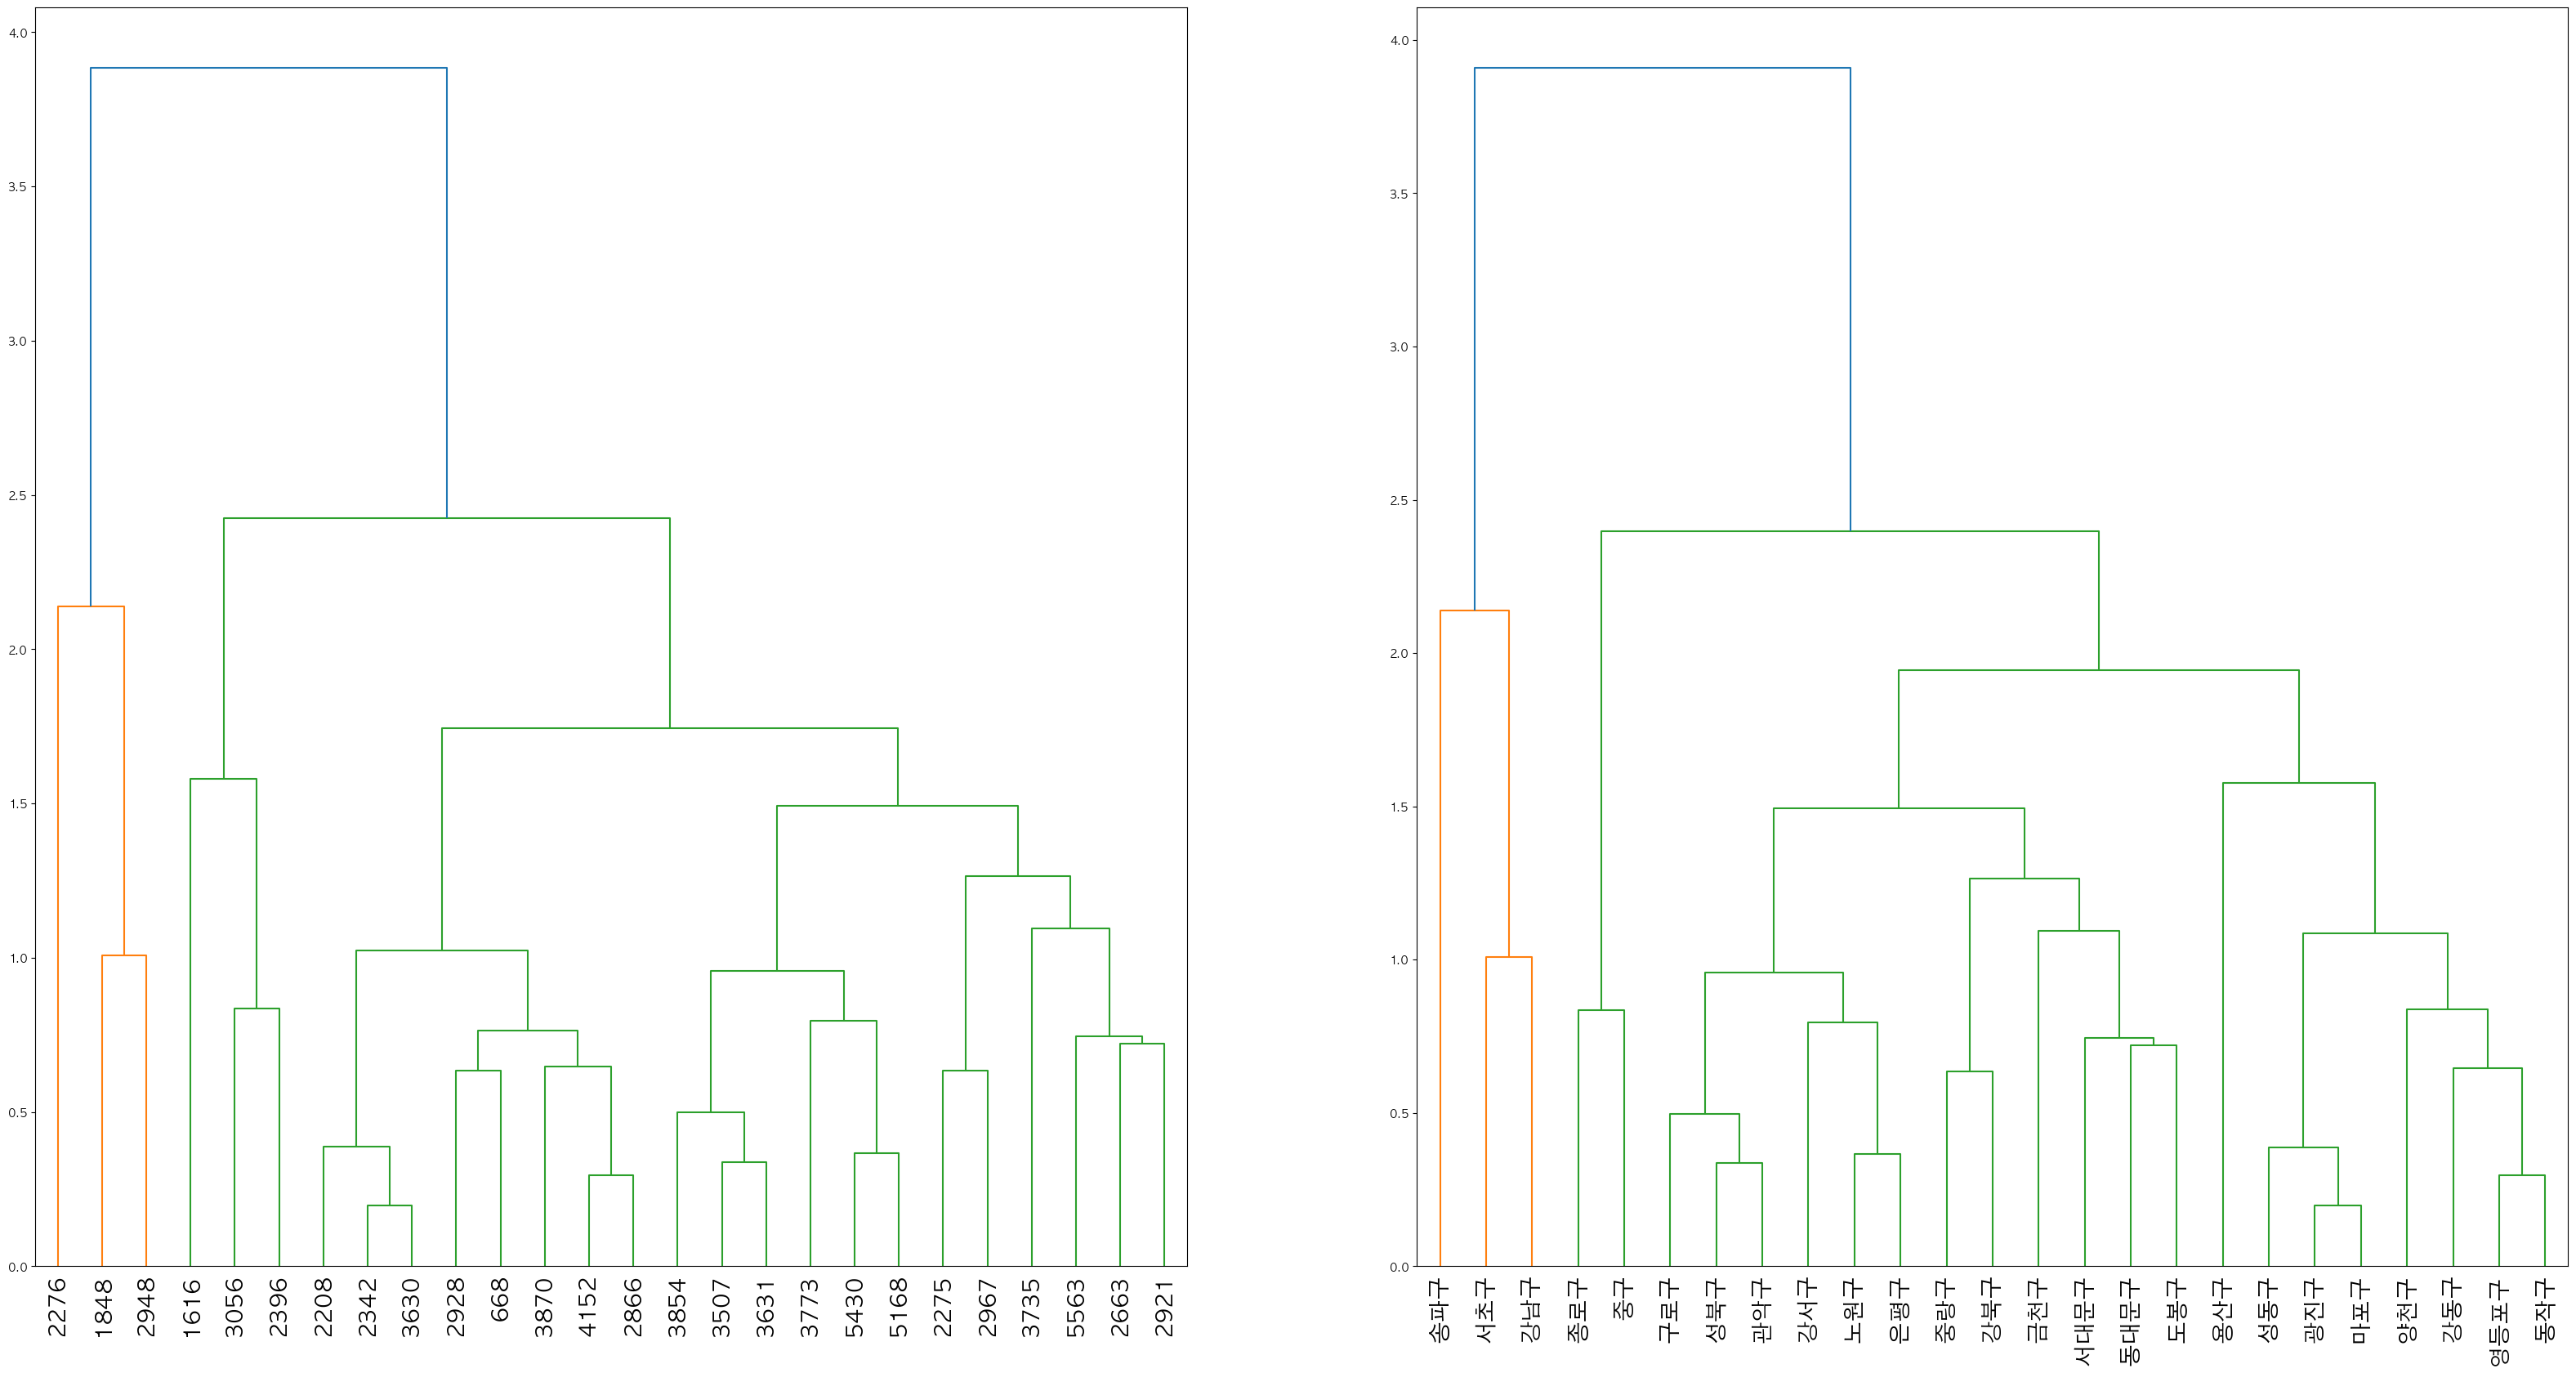

In [105]:
f, ax = plt.subplots(1,2,figsize=(40,20))

mergings = linkage(complete[['인구수','기초연금수급률', '경제적지표']], method='average')
dendrogram(mergings, labels = complete['목표일자리수'], leaf_rotation=90, leaf_font_size=20, ax = ax[0])

mergings_new = linkage(complete_new[['인구수','기초연금수급률', '경제적지표']], method='average')
dendrogram(mergings_new, labels = complete_new.index, leaf_rotation=90, leaf_font_size=20, ax = ax[1])

plt.show()

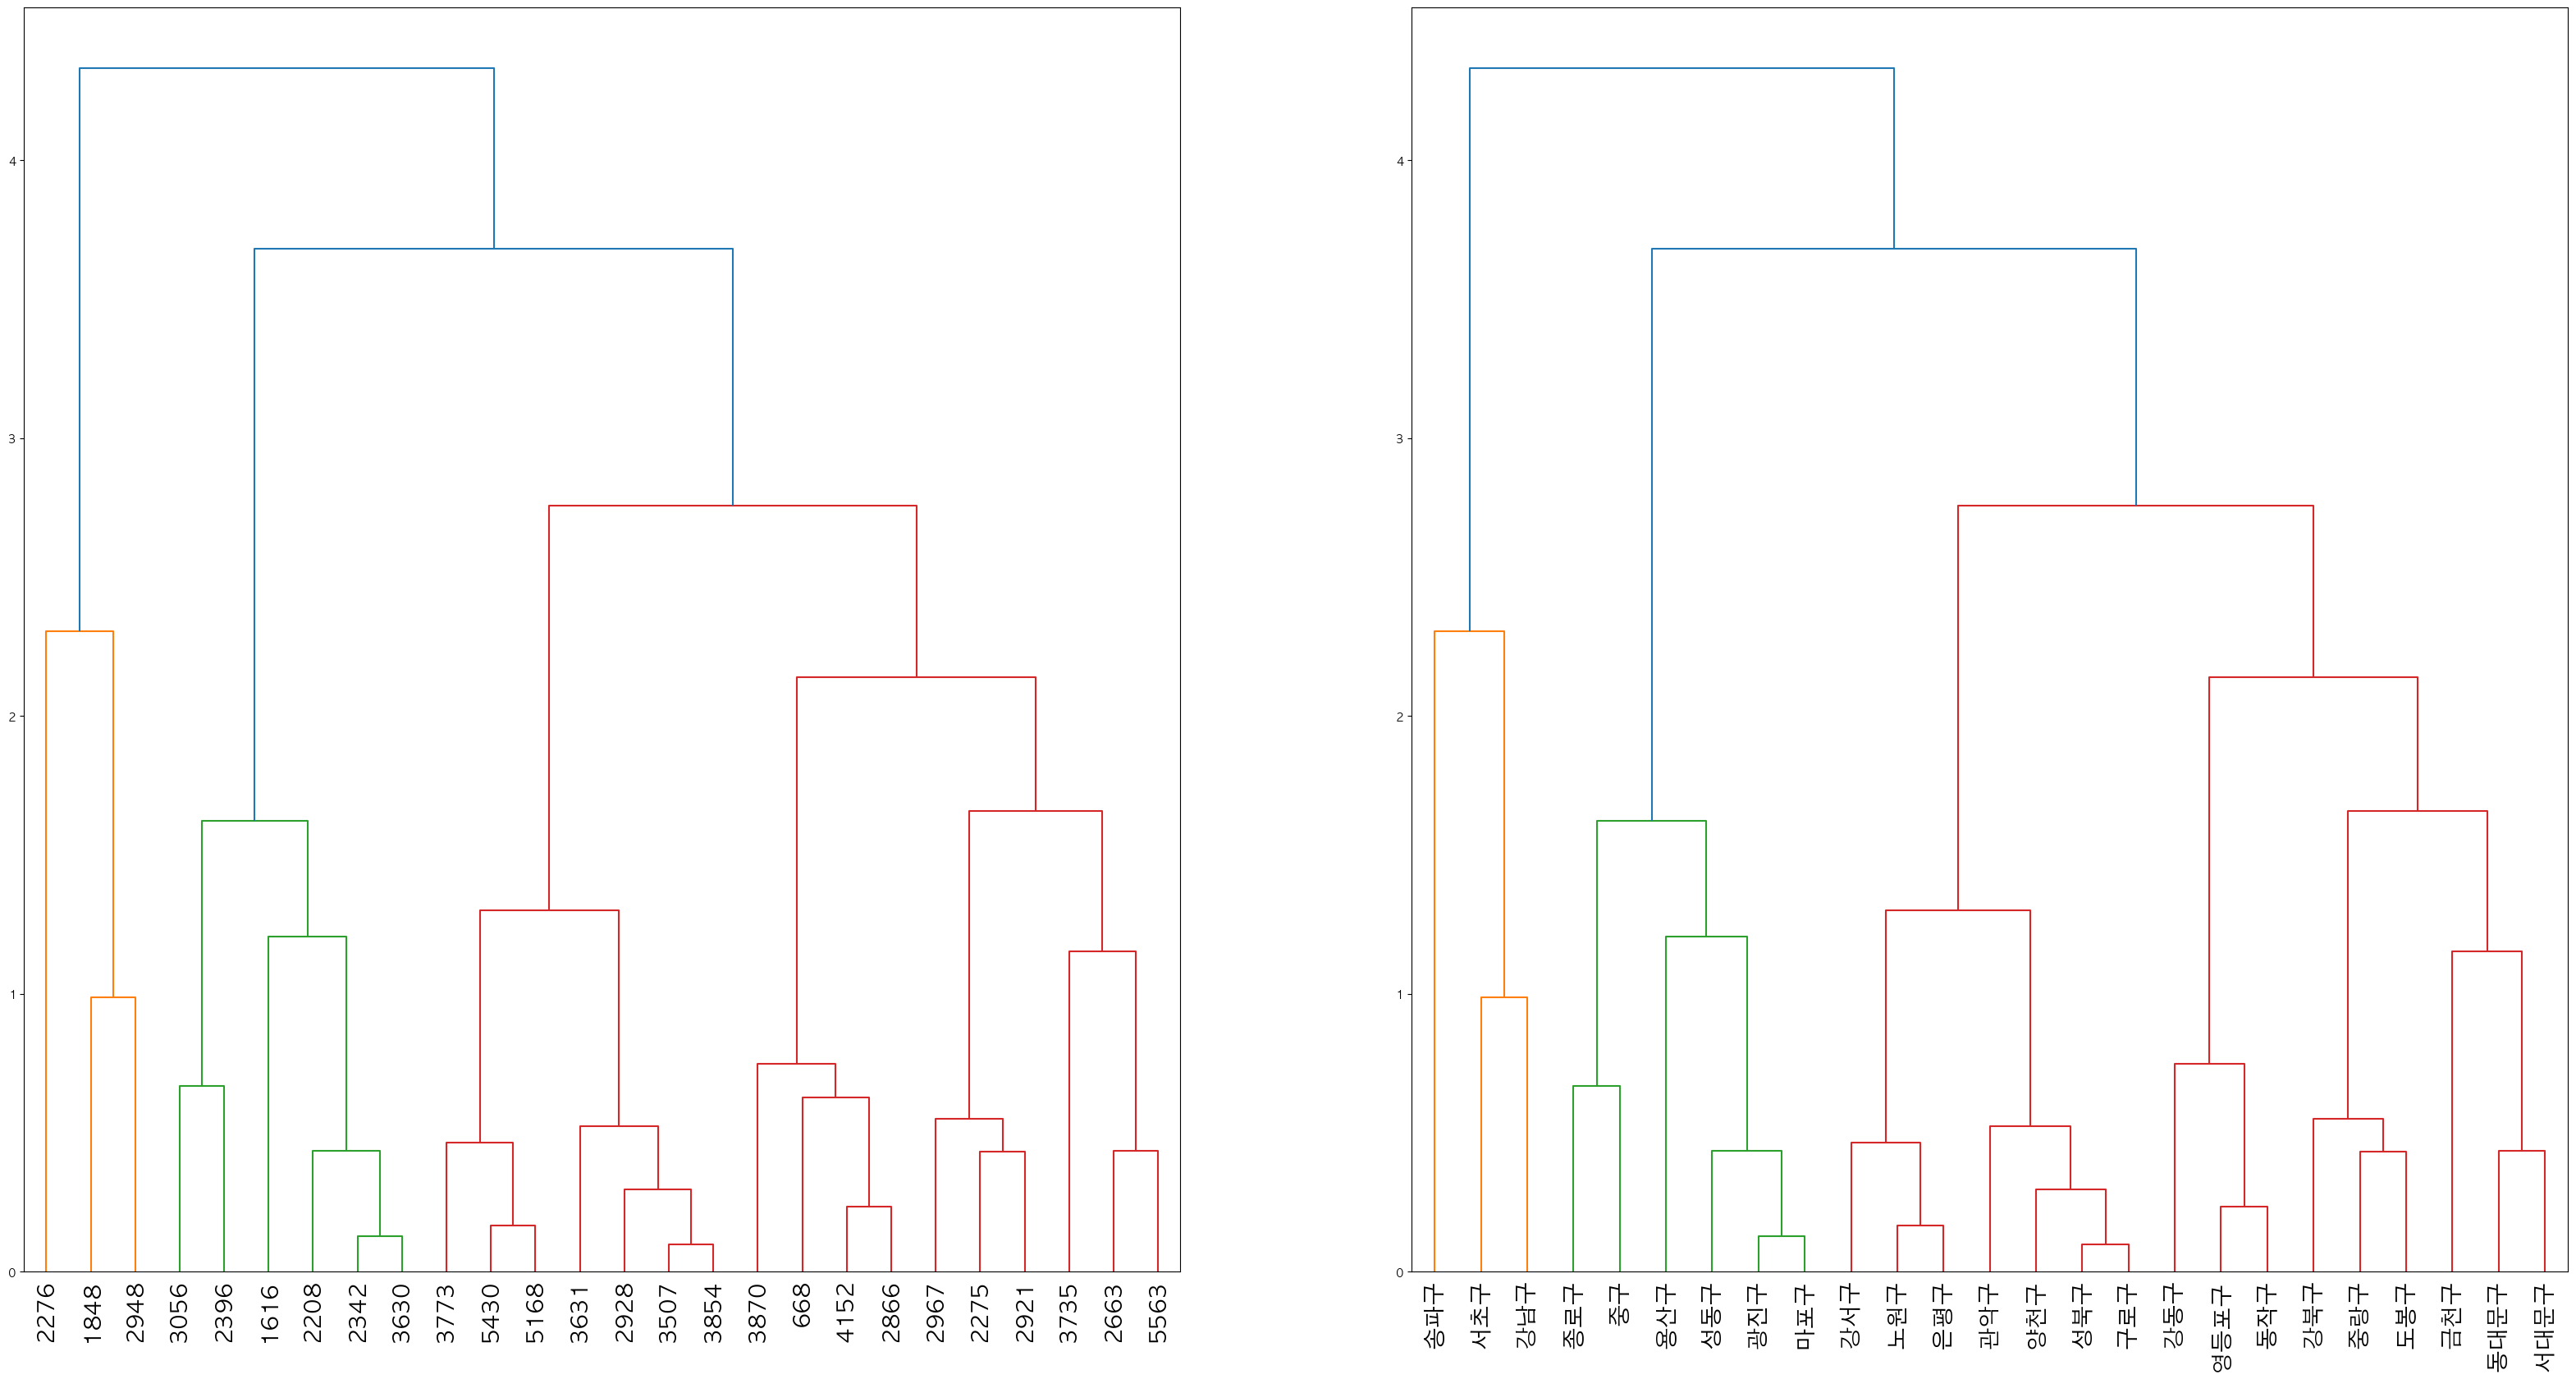

In [106]:
f, ax = plt.subplots(1,2,figsize=(40,20))

mergings = linkage(complete[['인구수','기초연금수급률']], method='complete')
dendrogram(mergings, labels = complete['목표일자리수'], leaf_rotation=90, leaf_font_size=20, ax = ax[0])

mergings_new = linkage(complete_new[['인구수','기초연금수급률']], method='complete')
dendrogram(mergings_new, labels = complete_new.index, leaf_rotation=90, leaf_font_size=20, ax = ax[1])

plt.show()


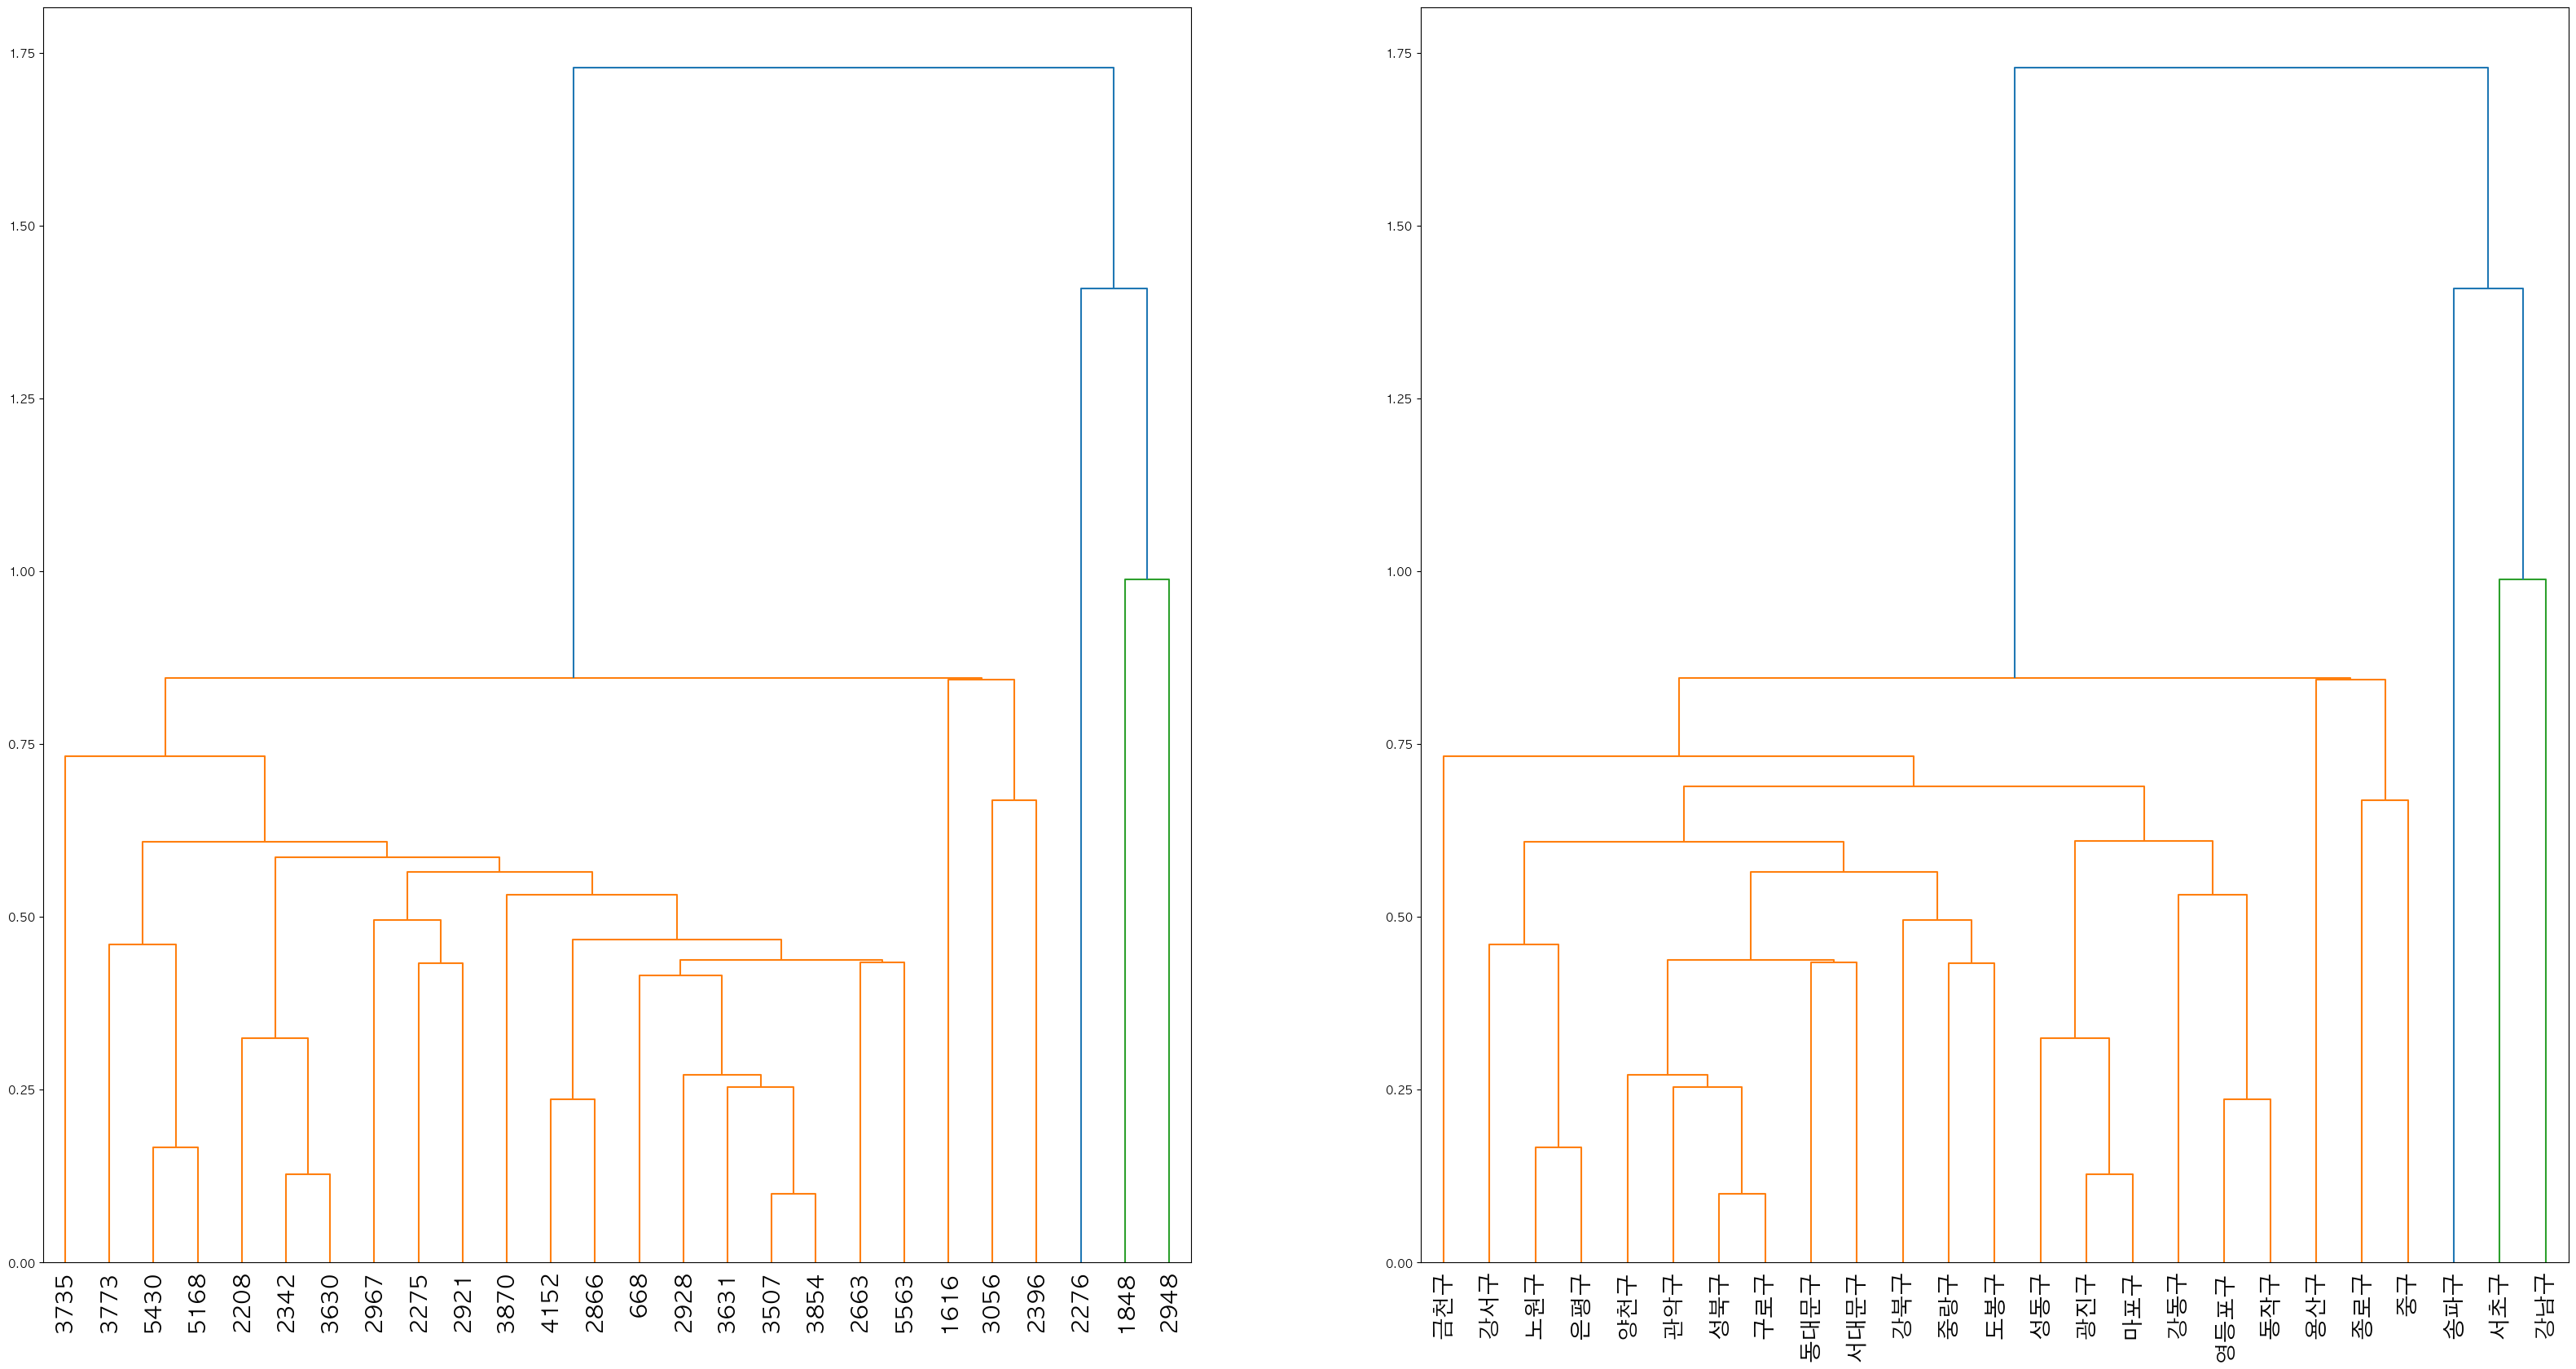

In [107]:
f, ax = plt.subplots(1,2,figsize=(40,20))

mergings = linkage(complete[['인구수','기초연금수급률']], method='single')
dendrogram(mergings, labels = complete['목표일자리수'], leaf_rotation=90, leaf_font_size=20, ax = ax[0])

mergings_new = linkage(complete_new[['인구수','기초연금수급률']], method='single')
dendrogram(mergings_new, labels = complete_new.index, leaf_rotation=90, leaf_font_size=20, ax = ax[1])

plt.show()

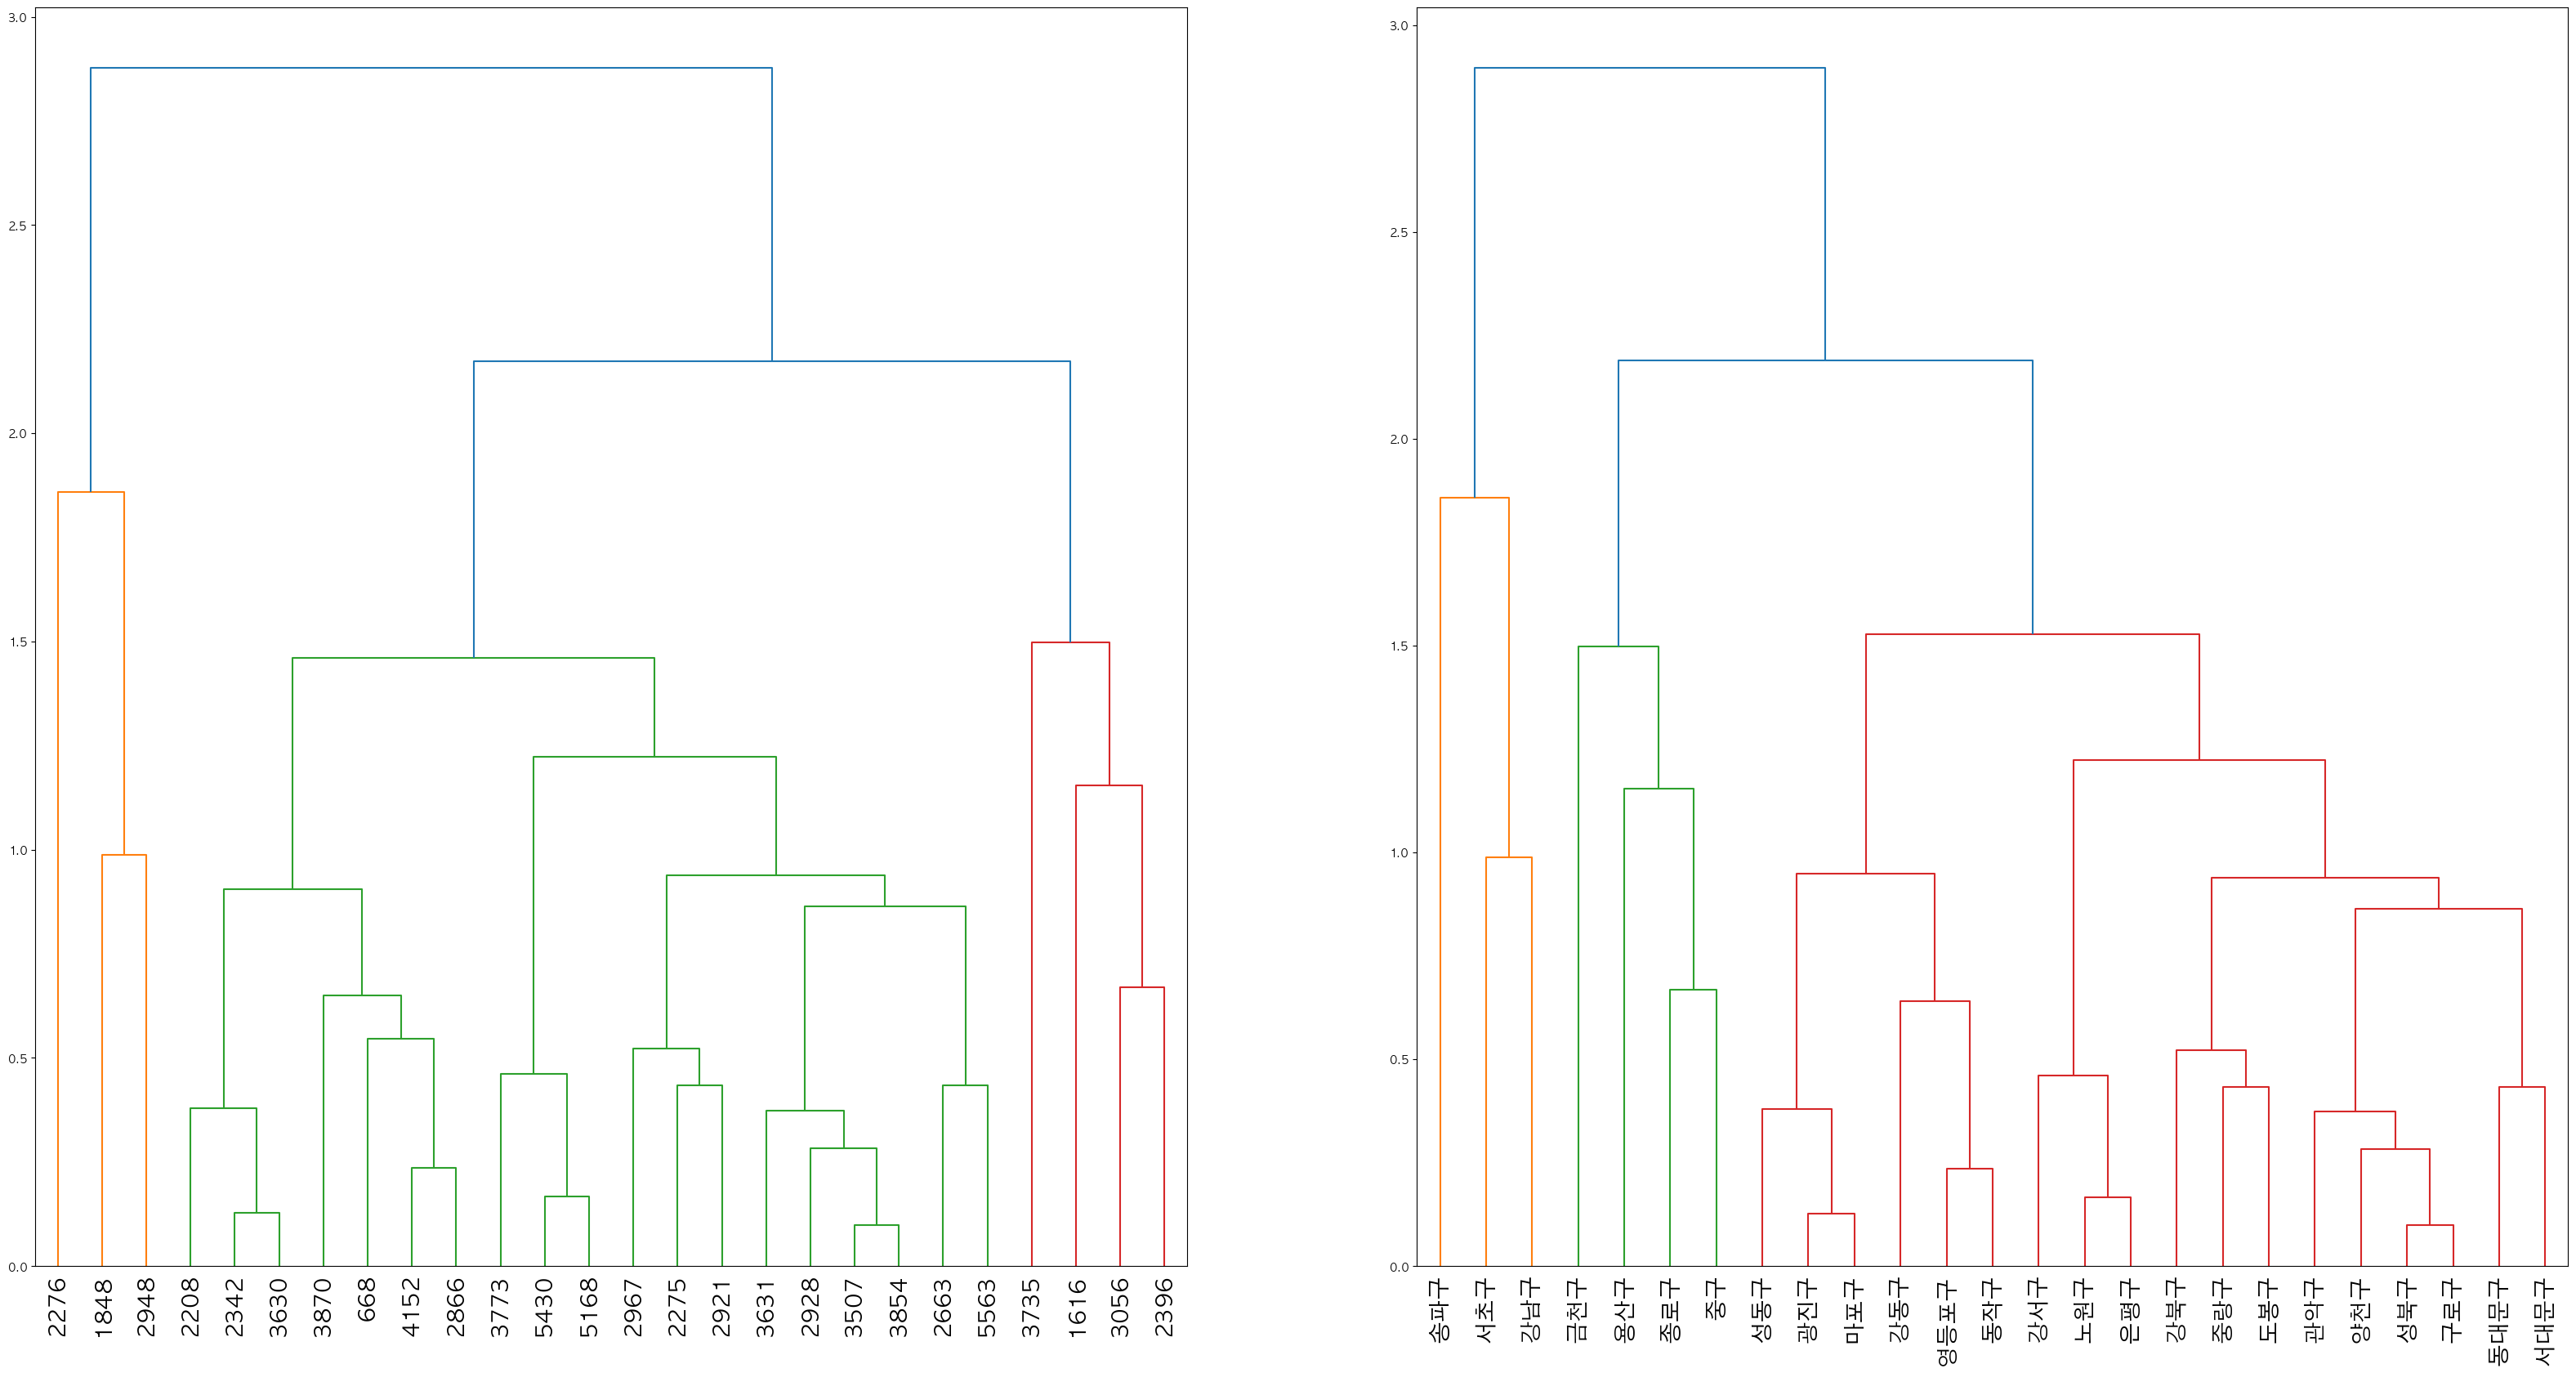

In [108]:
f, ax = plt.subplots(1,2,figsize=(40,20))

mergings = linkage(complete[['인구수','기초연금수급률']], method='average')
dendrogram(mergings, labels = complete['목표일자리수'], leaf_rotation=90, leaf_font_size=20, ax = ax[0])

mergings_new = linkage(complete_new[['인구수','기초연금수급률']], method='average')
dendrogram(mergings_new, labels = complete_new.index, leaf_rotation=90, leaf_font_size=20, ax = ax[1])

plt.show()

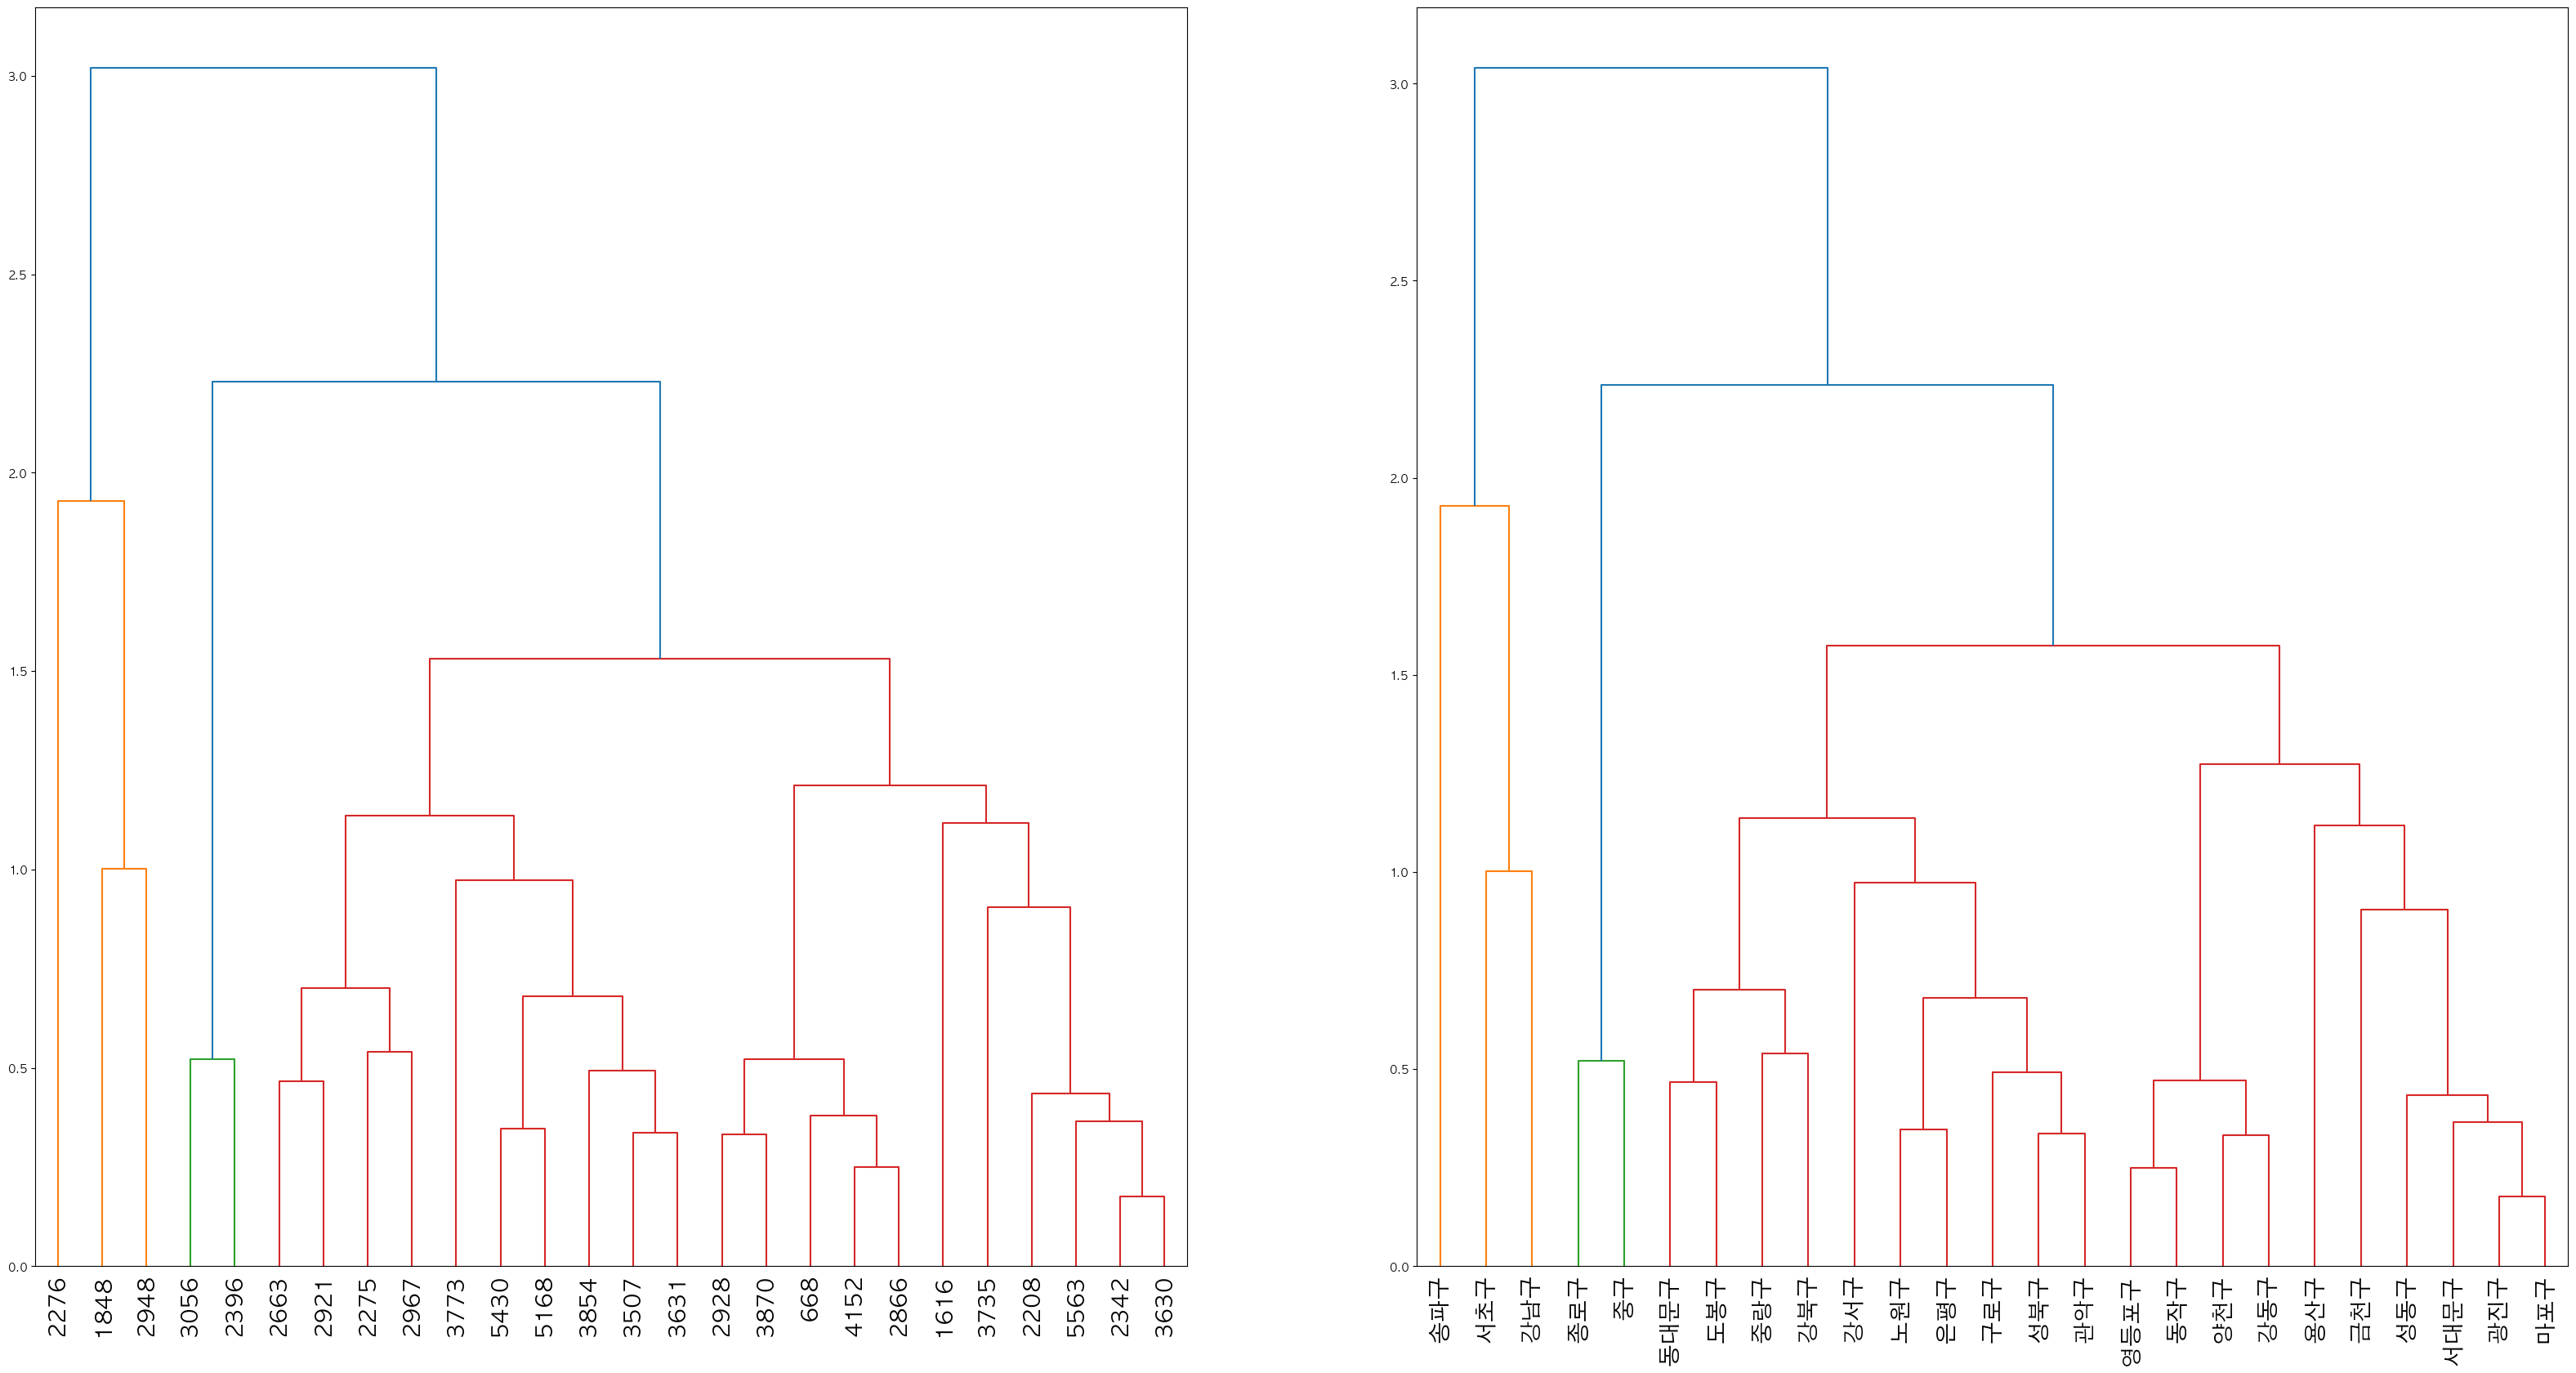

In [109]:
f, ax = plt.subplots(1,2,figsize=(40,20))

mergings = linkage(complete[['인구수','경제적지표']], method='average')
dendrogram(mergings, labels = complete['목표일자리수'], leaf_rotation=90, leaf_font_size=20, ax = ax[0])

mergings_new = linkage(complete_new[['인구수','경제적지표']], method='average')
dendrogram(mergings_new, labels = complete_new.index, leaf_rotation=90, leaf_font_size=20, ax = ax[1])

plt.show()

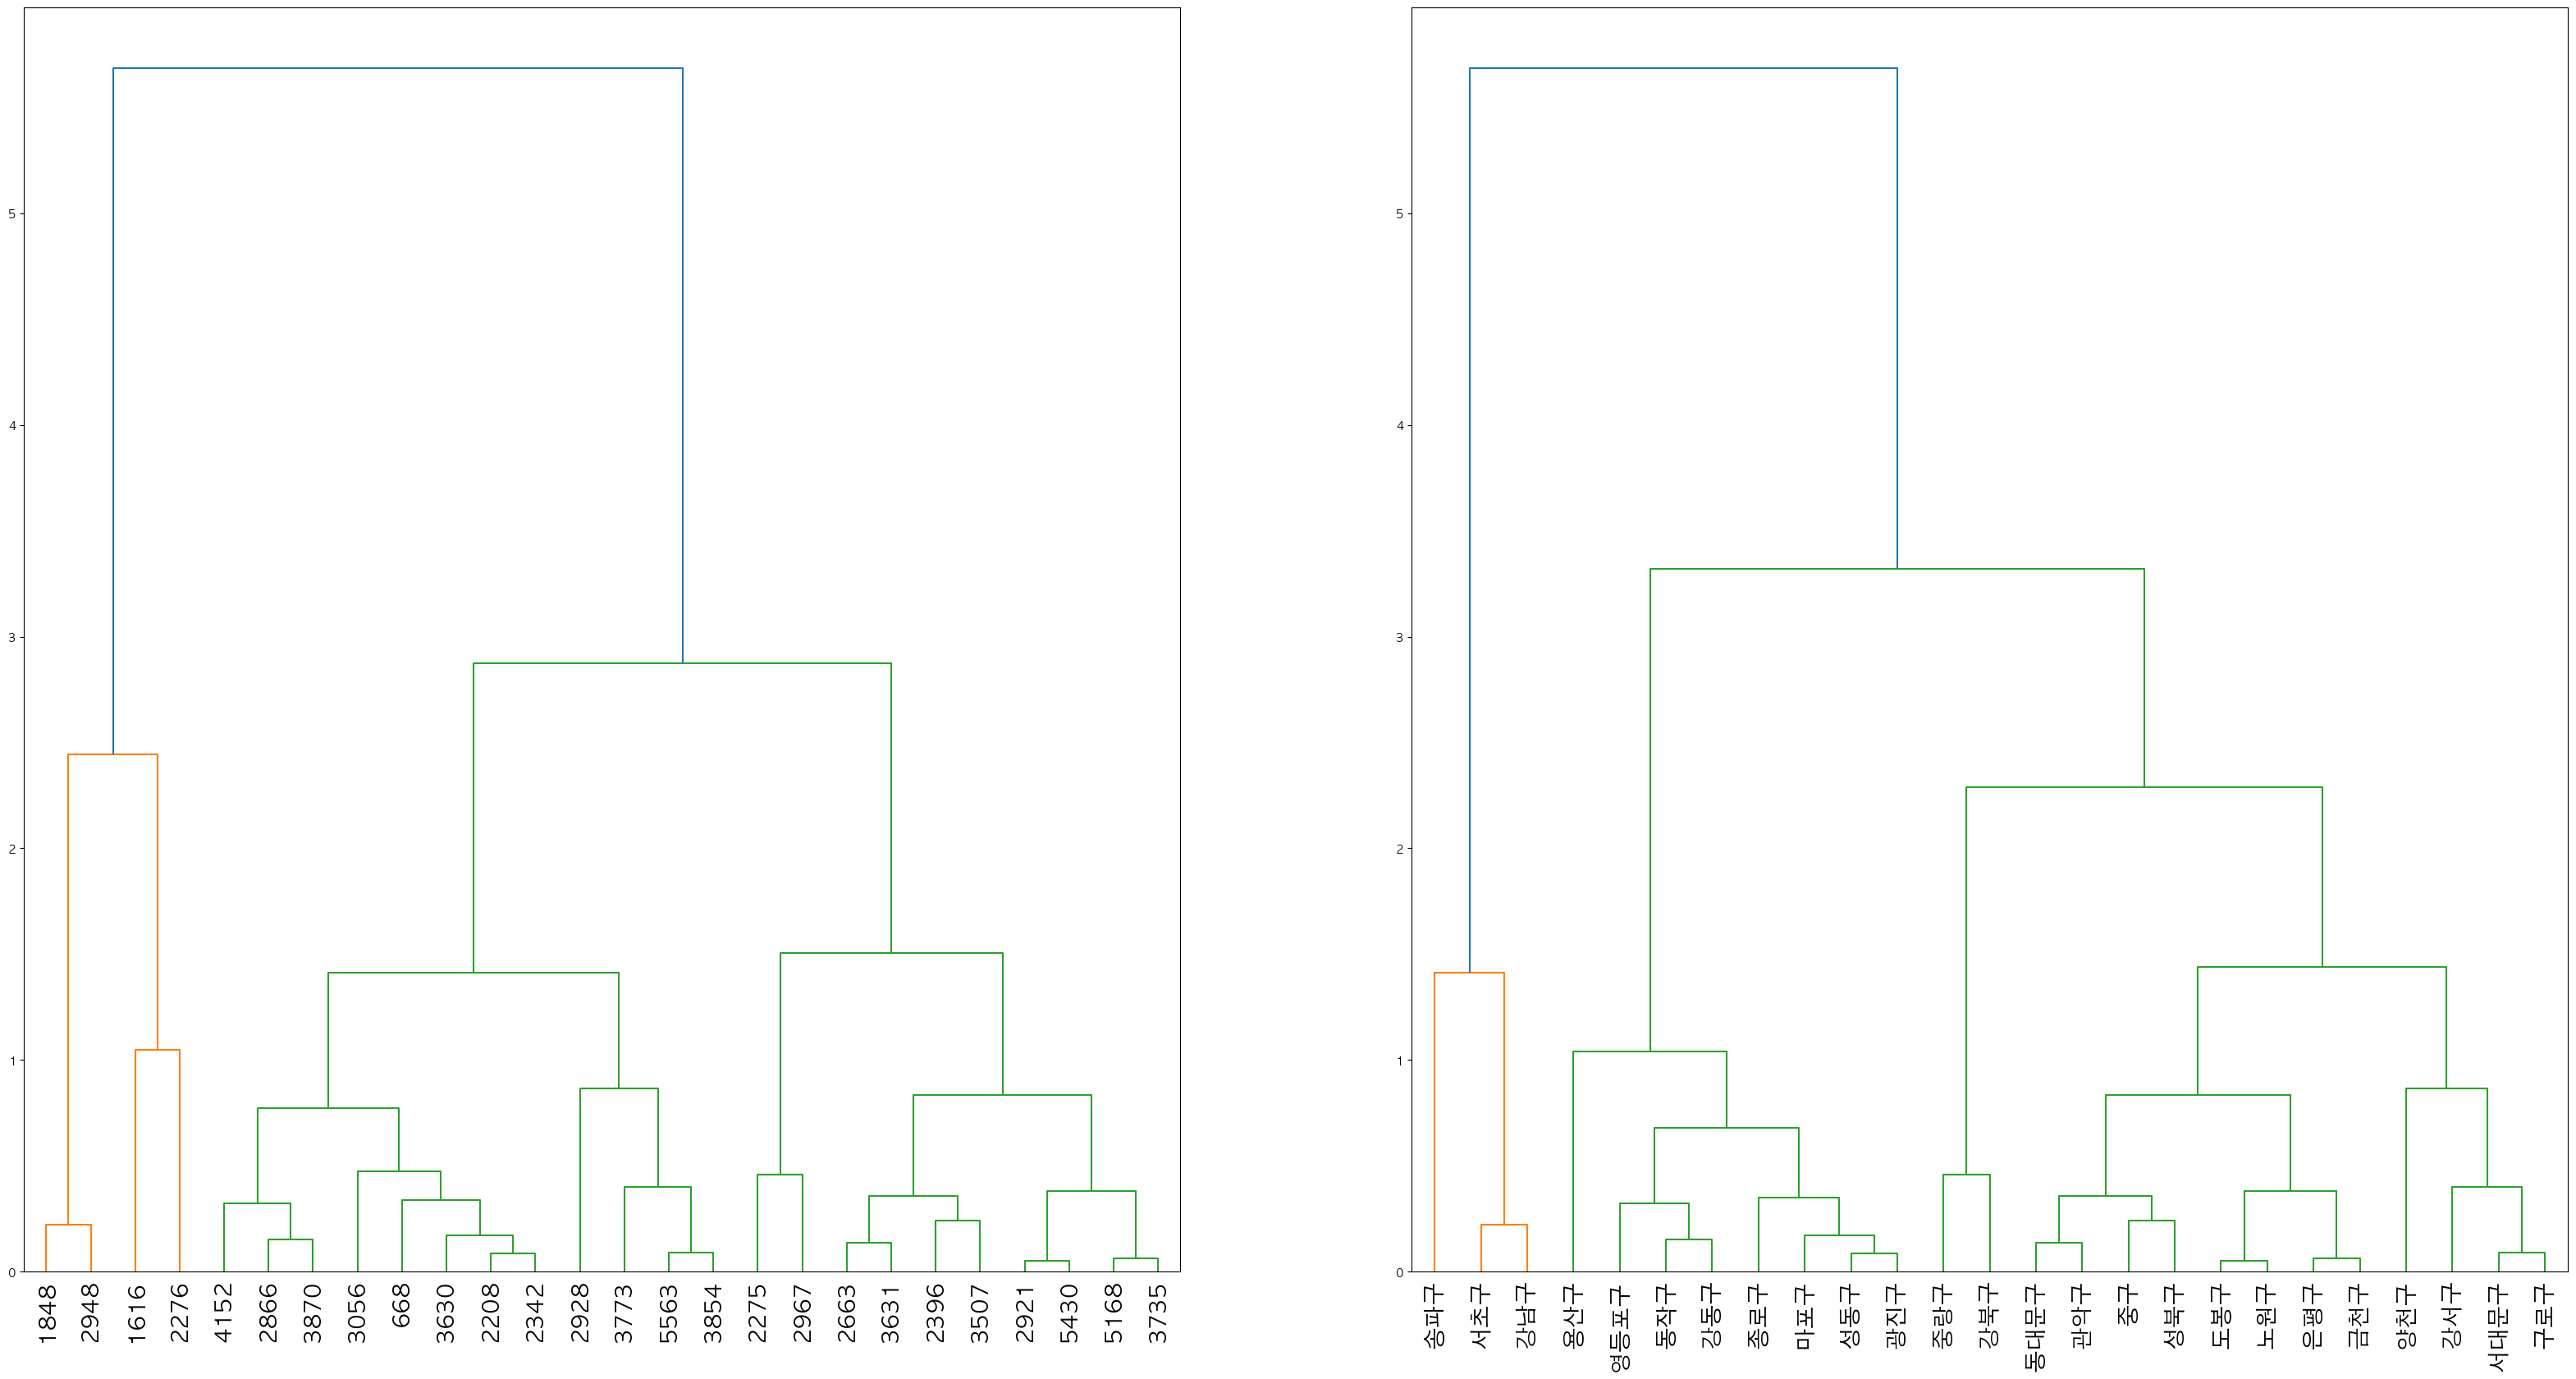

In [110]:
f, ax = plt.subplots(1,2,figsize=(40,20))

mergings = linkage(complete[['기초연금수급률', '경제적지표']], method='complete')
dendrogram(mergings, labels = complete['목표일자리수'], leaf_rotation=90, leaf_font_size=20, ax = ax[0])

mergings_new = linkage(complete_new[['기초연금수급률', '경제적지표']], method='complete')
dendrogram(mergings_new, labels = complete_new.index, leaf_rotation=90, leaf_font_size=20, ax = ax[1])

plt.show()

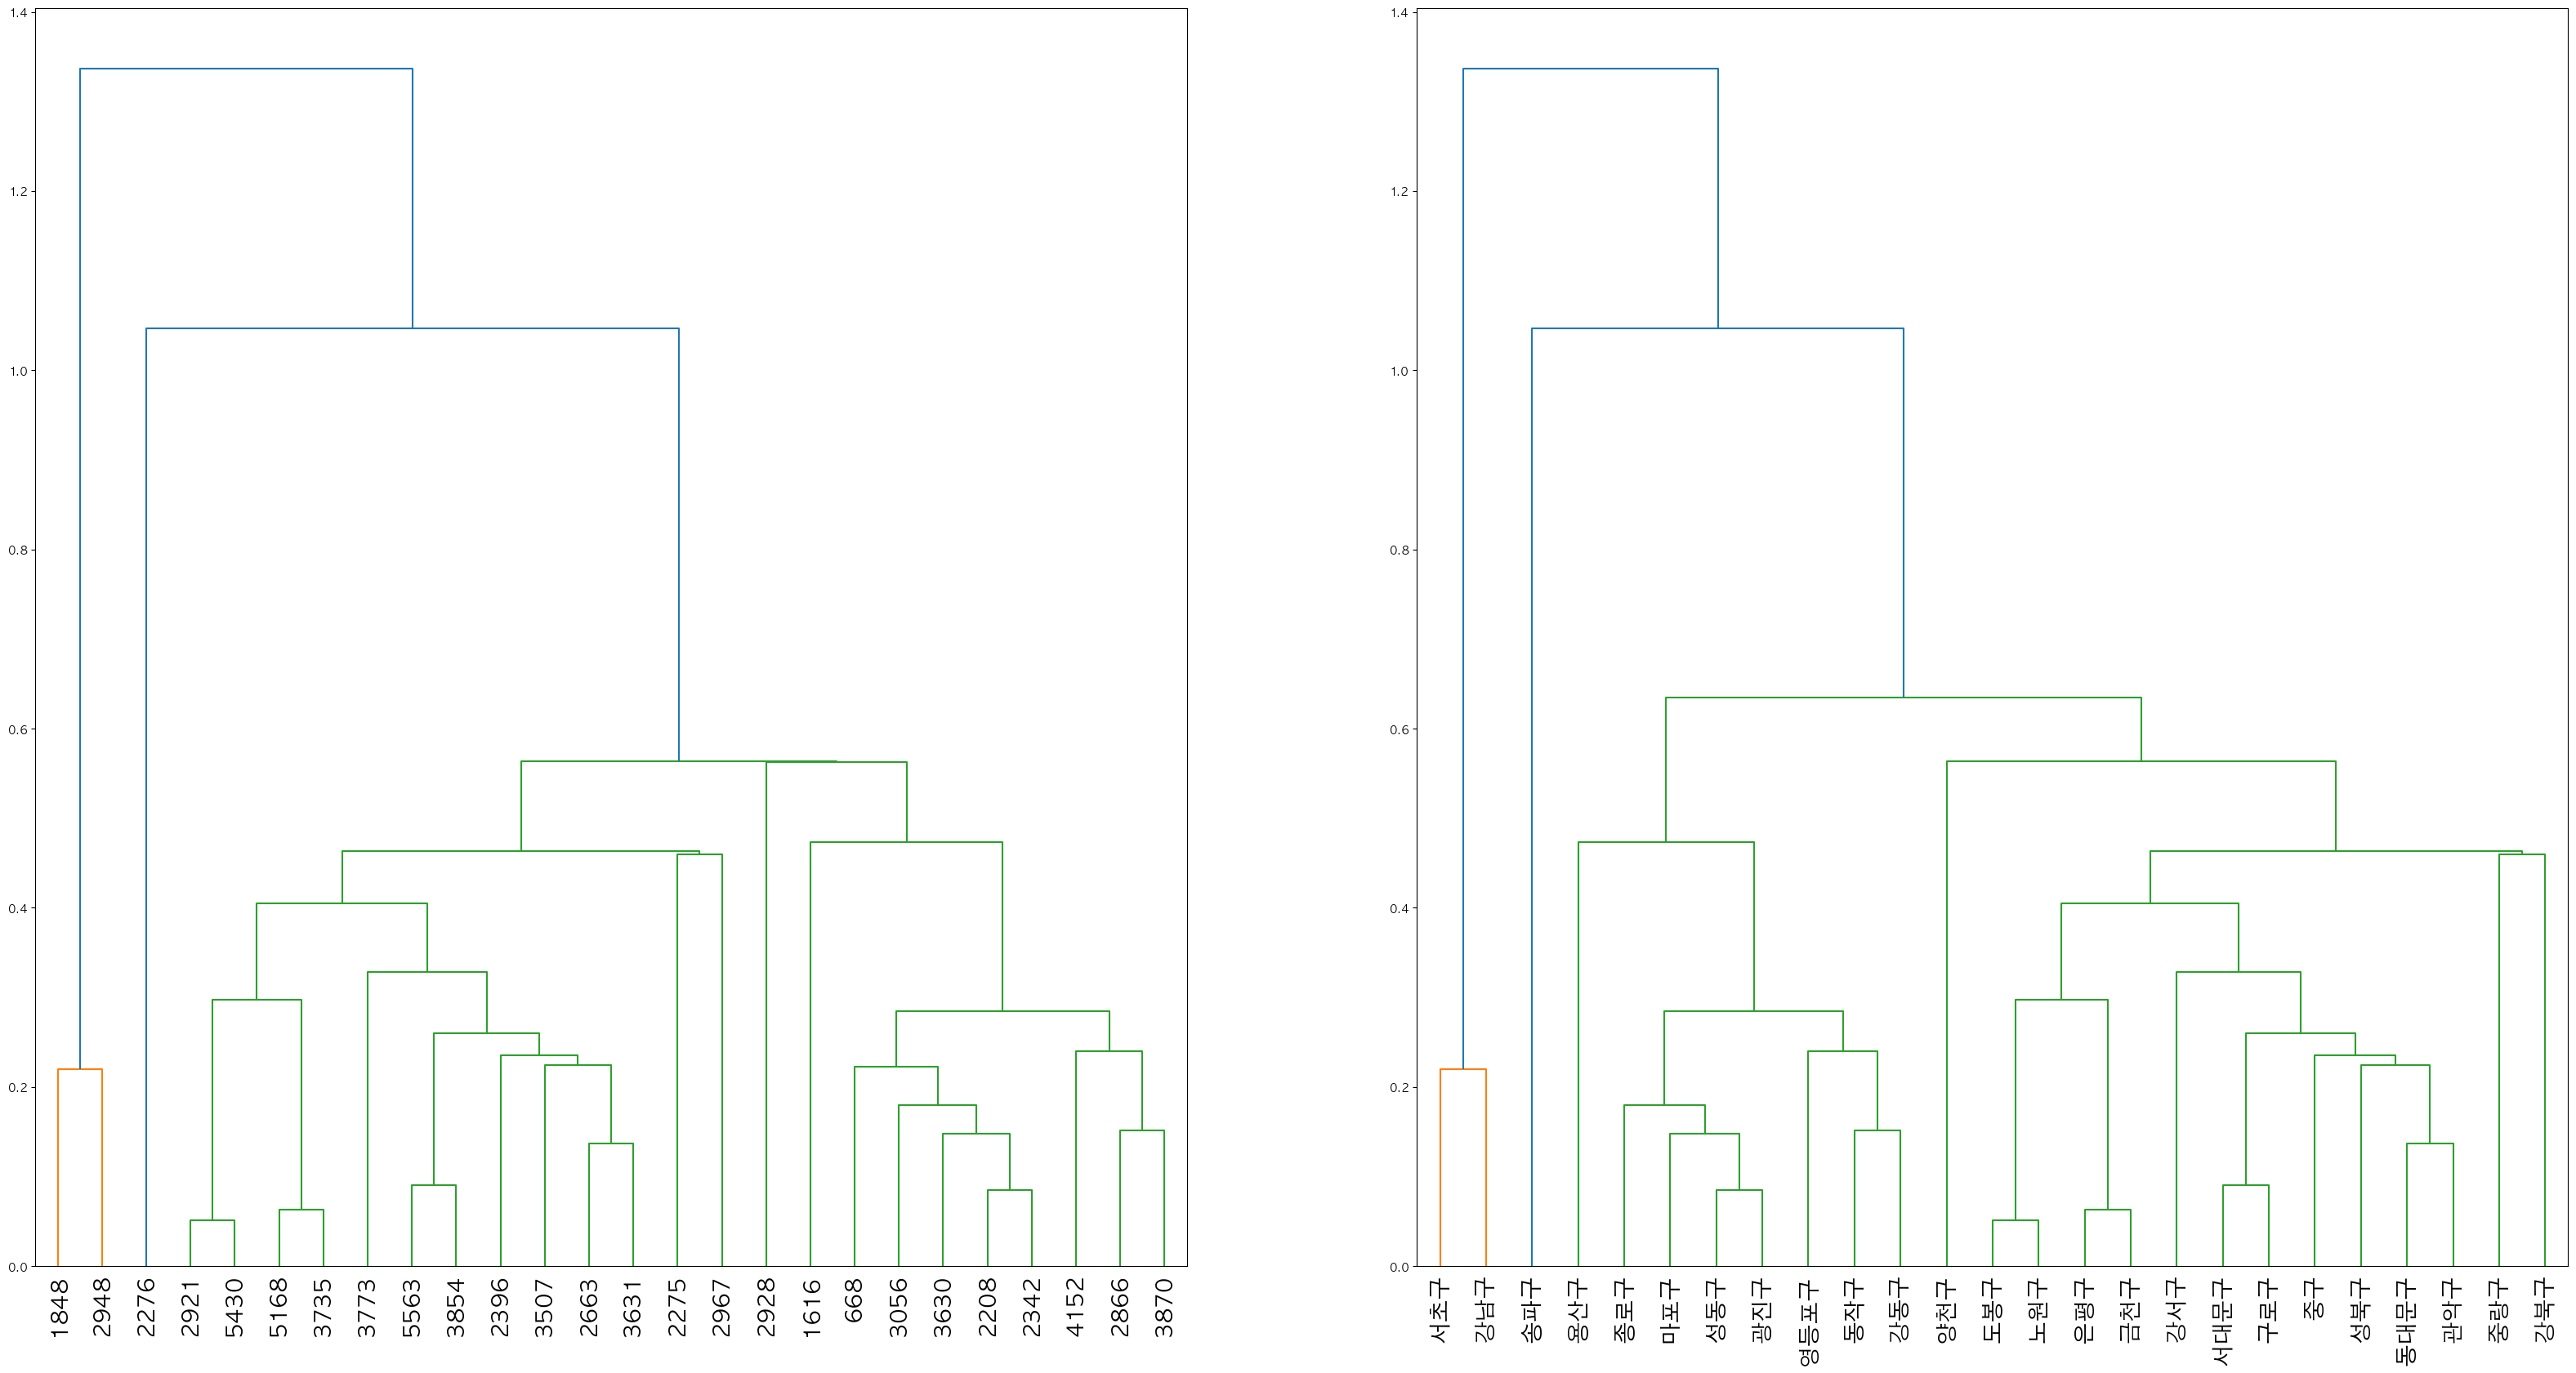

In [111]:
f, ax = plt.subplots(1,2,figsize=(40,20))

mergings = linkage(complete[['기초연금수급률', '경제적지표']], method='single')
dendrogram(mergings, labels = complete['목표일자리수'], leaf_rotation=90, leaf_font_size=20, ax = ax[0])

mergings_new = linkage(complete_new[['기초연금수급률', '경제적지표']], method='single')
dendrogram(mergings_new, labels = complete_new.index, leaf_rotation=90, leaf_font_size=20, ax = ax[1])

plt.show()

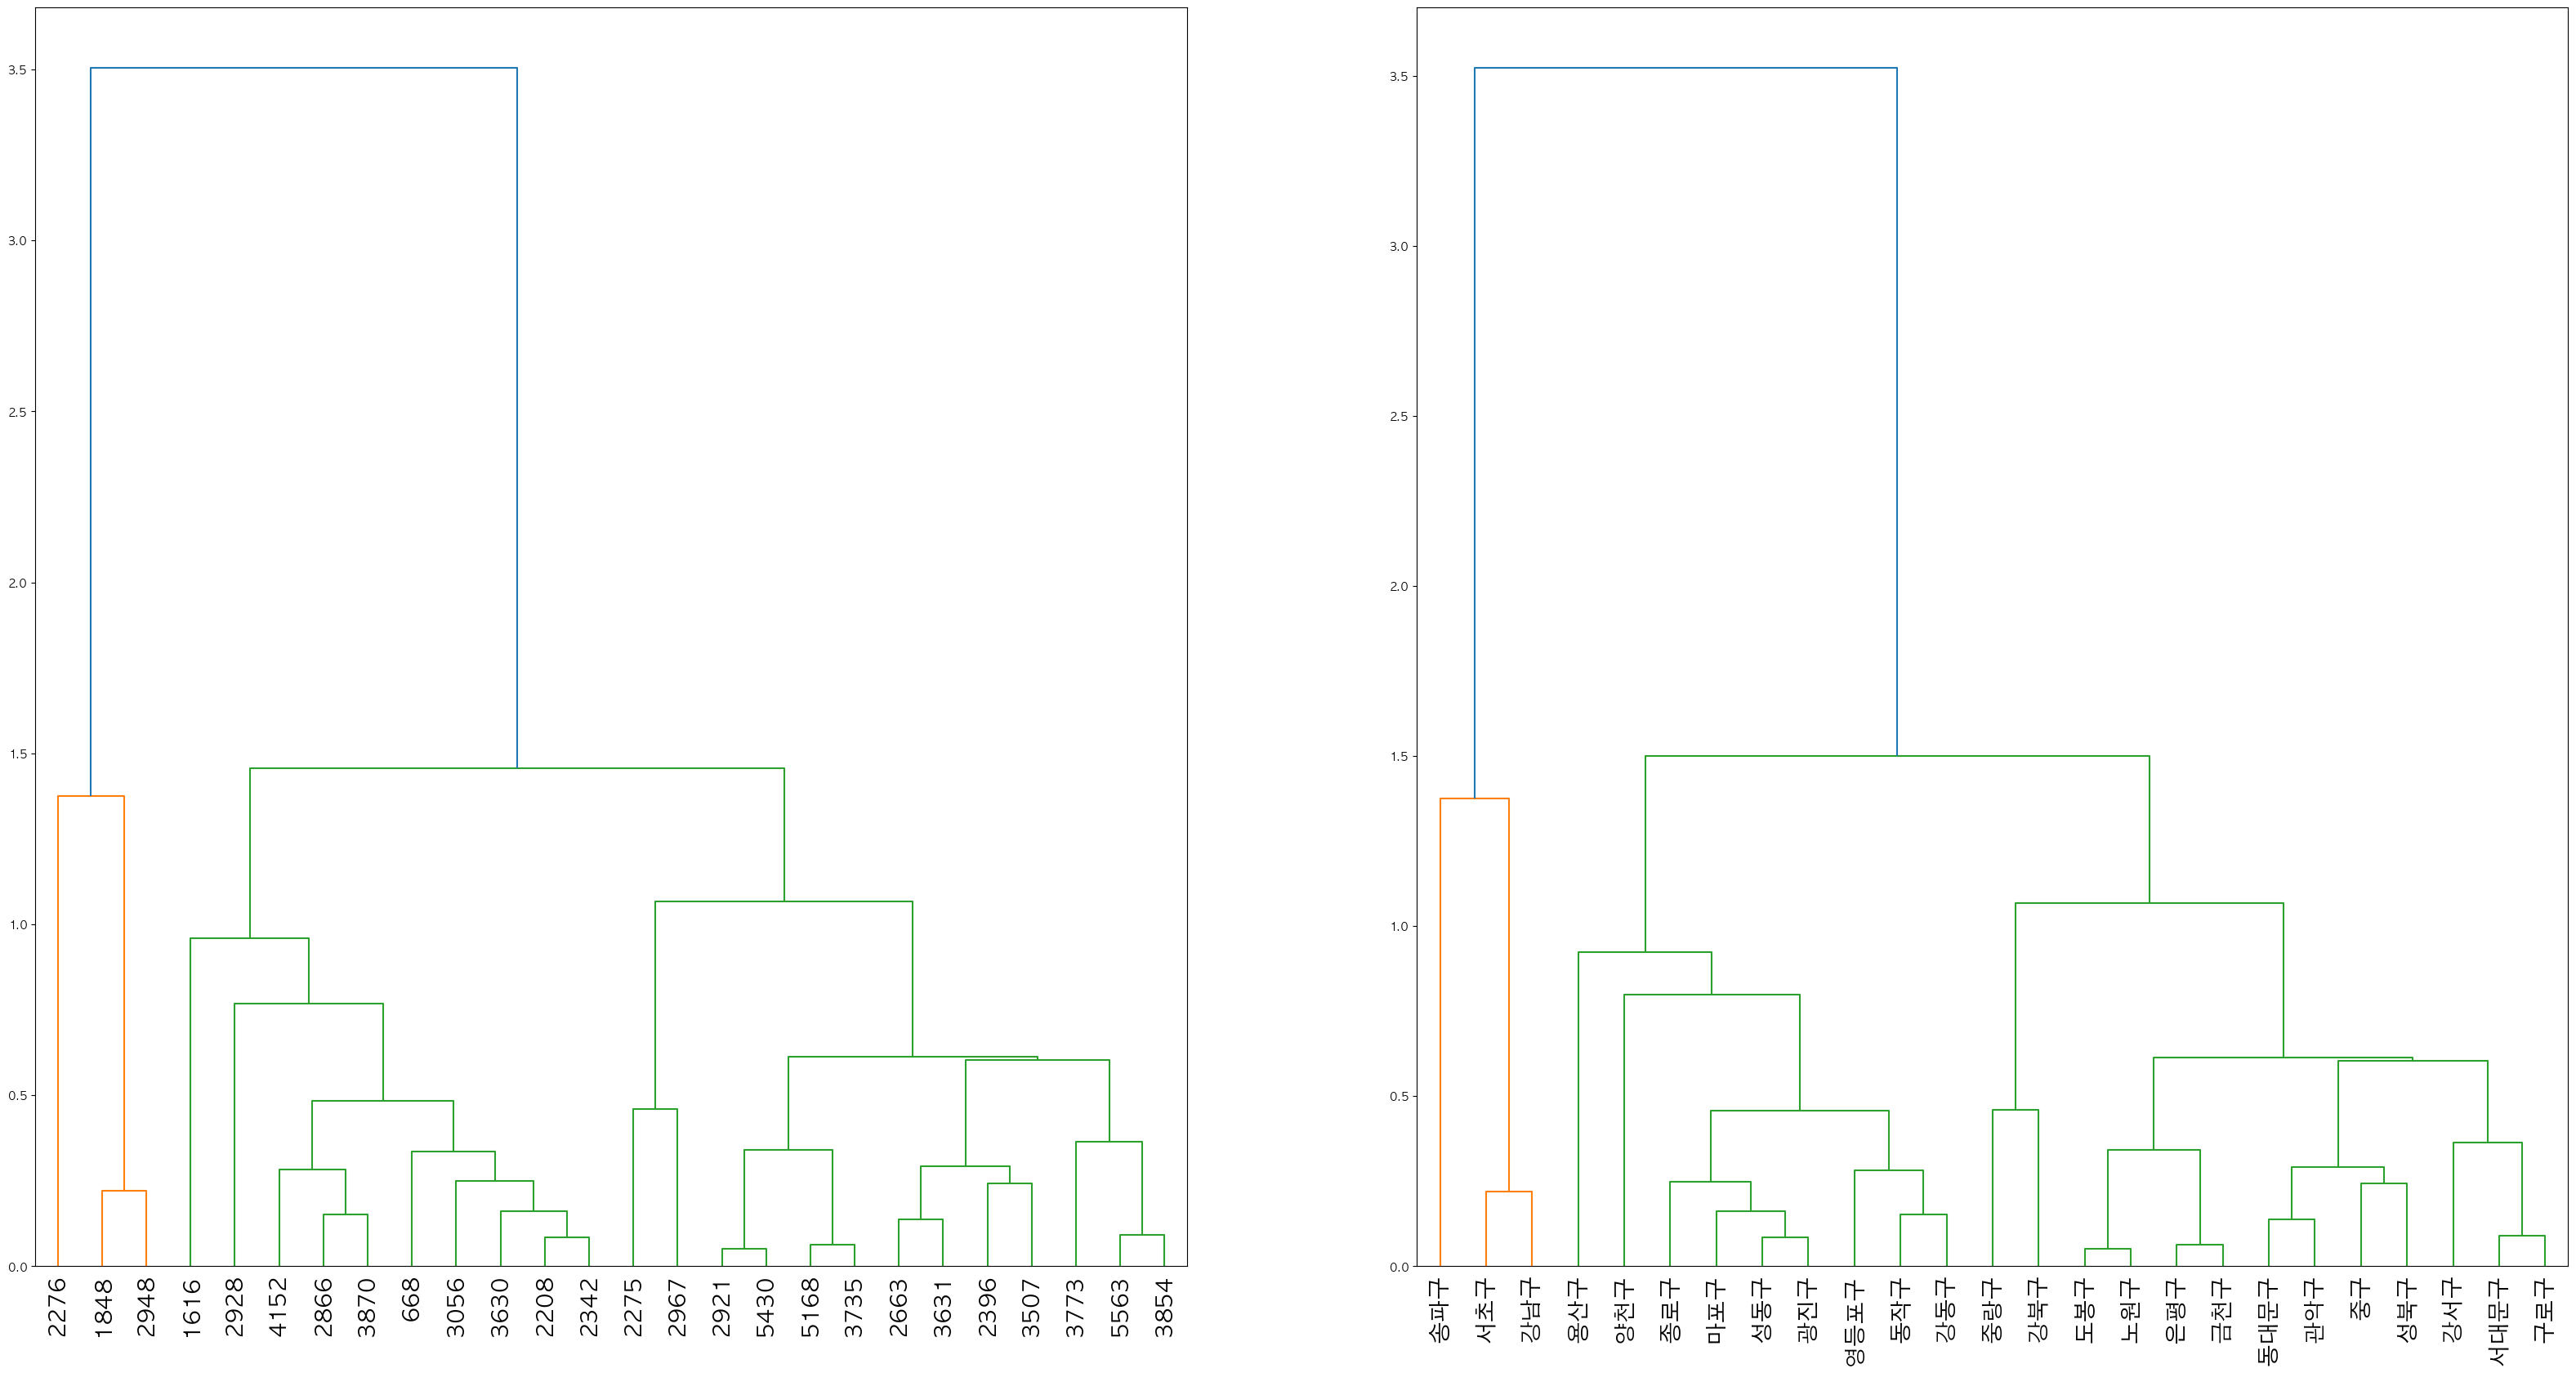

In [112]:
f, ax = plt.subplots(1,2,figsize=(40,20))

mergings = linkage(complete[['기초연금수급률', '경제적지표']], method='average')
dendrogram(mergings, labels = complete['목표일자리수'], leaf_rotation=90, leaf_font_size=20, ax = ax[0])

mergings_new = linkage(complete_new[['기초연금수급률', '경제적지표']], method='average')
dendrogram(mergings_new, labels = complete_new.index, leaf_rotation=90, leaf_font_size=20, ax = ax[1])

plt.show()

In [113]:
model = KMeans(n_clusters = 5, init = 'random', n_init = 100, algorithm='auto')
feature_scaled = complete_new[['경제적지표', '기초연금수급률']]

model.fit(feature_scaled)
predict = pd.DataFrame(model.predict(feature_scaled))
predict.columns=['predict5']
predict.index = complete_new.index

/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Text(0.5, 1.0, 'KMeans Clustering')

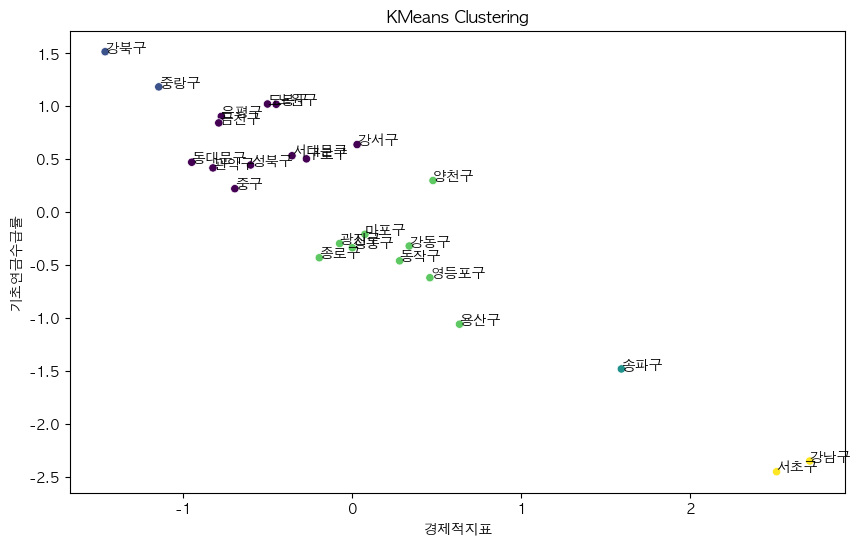

In [114]:
complete_with_clusters = pd.concat([complete_new, predict], axis=1)

plt.figure(figsize = (10, 6))

sns.scatterplot(x=complete_with_clusters['경제적지표'], y=complete_with_clusters['기초연금수급률'], c=complete_with_clusters['predict5'], cmap='viridis')
for i in range(len(complete_with_clusters)): # 행 개수만큼 순회
    row = complete_with_clusters.iloc[i] # 한 행씩 꺼내기
    name = complete_with_clusters.index[i] # 이름이 저장된 열
    x = row['경제적지표'] # x좌표가 저장된 열
    y = row['기초연금수급률'] # y좌표가 저장된 열
    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
plt.title('KMeans Clustering')

In [115]:
complete_with_clusters

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict5
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969,3
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917,0
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272,3
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149,3
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812,3
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663,0
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253,1
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147,0
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517,1
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265,0


In [116]:
remodel = complete_with_clusters[['인구수', '기초연금수급률', '경제적지표', 'ratio', 'predict5']]
remodel

,인구수,기초연금수급률,경제적지표,ratio,predict5
종로구,-1.965626,-0.430979,-0.195467,0.840969,3
중구,-2.112927,0.221765,-0.695199,0.949917,0
용산구,-1.403467,-1.059391,0.634156,0.785272,3
성동구,-0.962883,-0.337010,-0.000056,0.859149,3
광진구,-0.640627,-0.296738,-0.075161,0.819812,3
동대문구,-0.113073,0.471788,-0.950405,0.845663,0
중랑구,0.417271,1.184100,-1.145225,0.947253,1
성북구,0.546915,0.445779,-0.601703,0.855147,0
강북구,-0.019761,1.516345,-1.462673,0.895517,1
도봉구,0.015301,1.022173,-0.501802,0.706265,0


/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

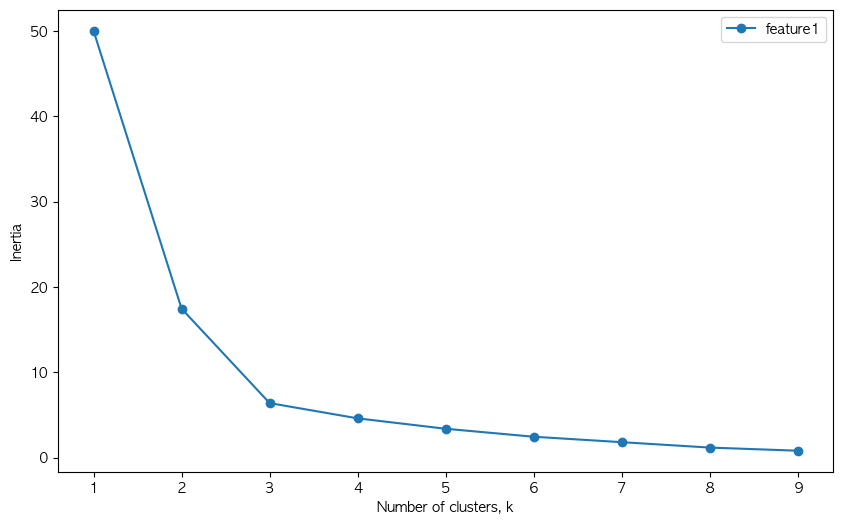

In [117]:
ks = range(1, 10)

features_list = [feature_scaled]
inertias_list = []

for features in features_list:
    inertias = []
    for k in ks:
        model = KMeans(n_clusters=k)
        model.fit(features)
        inertias.append(model.inertia_)
    inertias_list.append(inertias)

# Plotting
plt.figure(figsize=(10, 6))
for i, inertias in enumerate(inertias_list):
    plt.plot(ks, inertias, '-o', label=f'feature{i + 1}')

plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.legend()
plt.show()

In [118]:
remodel[remodel['predict5']==0]

,인구수,기초연금수급률,경제적지표,ratio,predict5
중구,-2.112927,0.221765,-0.695199,0.949917,0
동대문구,-0.113073,0.471788,-0.950405,0.845663,0
성북구,0.546915,0.445779,-0.601703,0.855147,0
도봉구,0.015301,1.022173,-0.501802,0.706265,0
노원구,1.285957,1.019656,-0.450380,0.861878,0
은평구,1.164686,0.904713,-0.775284,0.774961,0
서대문구,-0.542951,0.533035,-0.357117,0.926479,0
강서구,1.544127,0.638749,0.028084,0.852107,0
구로구,0.466490,0.503670,-0.271552,0.880125,0
금천구,-1.206034,0.843466,-0.790249,0.788487,0


In [119]:
remodel[remodel['predict5']==1]

,인구수,기초연금수급률,경제적지표,ratio,predict5
중랑구,0.417271,1.184100,-1.145225,0.947253,1
강북구,-0.019761,1.516345,-1.462673,0.895517,1


In [120]:
remodel[remodel['predict5']==2]

,인구수,기초연금수급률,경제적지표,ratio,predict5
송파구,1.871152,-1.482248,1.591719,0.788664,2


In [121]:
remodel[remodel['predict5']==3]

,인구수,기초연금수급률,경제적지표,ratio,predict5
종로구,-1.965626,-0.430979,-0.195467,0.840969,3
용산구,-1.403467,-1.059391,0.634156,0.785272,3
성동구,-0.962883,-0.337010,-0.000056,0.859149,3
광진구,-0.640627,-0.296738,-0.075161,0.819812,3
마포구,-0.547111,-0.209482,0.074576,0.895592,3
양천구,0.289049,0.298953,0.477247,0.873292,3
영등포구,-0.095720,-0.619754,0.458912,0.761079,3
동작구,0.077865,-0.460344,0.279610,0.873343,3
강동구,0.590805,-0.320230,0.336521,0.792506,3


In [122]:
remodel[remodel['predict5']==4]

,인구수,기초연금수급률,경제적지표,ratio,predict5
서초구,-0.220695,-2.453813,2.510255,0.750000,4
강남구,0.762056,-2.352293,2.705872,0.816147,4


In [123]:
model = KMeans(n_clusters = 5,algorithm='auto')
feature_scaled = complete_new[['경제적지표', '기초연금수급률', '인구수']]

model.fit(feature_scaled)
predict = pd.DataFrame(model.predict(feature_scaled))
predict.columns=['predict6']
predict.index = complete_new.index

/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

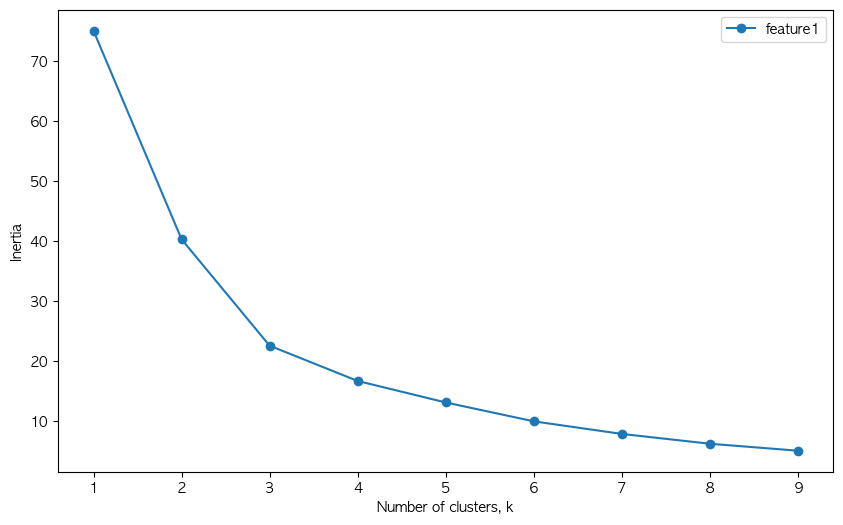

In [124]:
ks = range(1, 10)

features_list = [feature_scaled]
inertias_list = []

for features in features_list:
    inertias = []
    for k in ks:
        model = KMeans(n_clusters=k)
        model.fit(features)
        inertias.append(model.inertia_)
    inertias_list.append(inertias)

# Plotting
plt.figure(figsize=(10, 6))
for i, inertias in enumerate(inertias_list):
    plt.plot(ks, inertias, '-o', label=f'feature{i + 1}')

plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.legend()
plt.show()

In [125]:
complete_with_clusters

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict5
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969,3
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917,0
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272,3
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149,3
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812,3
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663,0
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253,1
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147,0
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517,1
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265,0


In [126]:
complete_with_clusters = pd.concat([complete_new, predict], axis=1)
complete_with_clusters[complete_with_clusters['predict6']==0]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
양천구,72393.0,58.51,6122.788713,2928,0.289049,0.298953,0.477247,2557,251,120,0.873292,0
영등포구,64810.0,47.56,6109.464619,4152,-0.095720,-0.619754,0.458912,3160,358,634,0.761079,0
동작구,68231.0,49.46,5979.168960,2866,0.077865,-0.460344,0.279610,2503,245,118,0.873343,0
강동구,78340.0,51.13,6020.525214,3870,0.590805,-0.320230,0.336521,3067,509,294,0.792506,0


In [127]:
complete_with_clusters[complete_with_clusters['predict6']==1]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663,1
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253,1
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517,1
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265,1
서대문구,55996.0,61.30,5516.471036,5563,-0.542951,0.533035,-0.357117,5154,283,126,0.926479,1
금천구,42928.0,65.00,5201.722010,3735,-1.206034,0.843466,-0.790249,2945,432,358,0.788487,1


In [128]:
complete_with_clusters[complete_with_clusters['predict6']==2]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
서초구,62347.0,25.70,7600.138994,1848,-0.220695,-2.453813,2.510255,1386,252,210,0.750000,2
강남구,81715.0,26.91,7742.290228,2948,0.762056,-2.352293,2.705872,2406,272,270,0.816147,2
송파구,103573.0,37.28,6932.655457,2276,1.871152,-1.482248,1.591719,1795,284,197,0.788664,2


In [129]:
complete_with_clusters[complete_with_clusters['predict6']==3]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969,3
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917,3
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272,3
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149,3
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812,3
마포구,55914.0,52.45,5830.174753,3630,-0.547111,-0.209482,0.074576,3251,205,174,0.895592,3


In [130]:
complete_with_clusters[complete_with_clusters['predict6']==4]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147,4
노원구,92040.0,67.10,5448.698395,5430,1.285957,1.019656,-0.450380,4680,324,426,0.861878,4
은평구,89650.0,65.73,5212.596334,5168,1.164686,0.904713,-0.775284,4005,390,773,0.774961,4
강서구,97128.0,62.56,5796.389899,3773,1.544127,0.638749,0.028084,3215,364,194,0.852107,4
구로구,75890.0,60.95,5578.649883,3854,0.466490,0.503670,-0.271552,3392,262,200,0.880125,4
관악구,82447.0,59.93,5176.701659,3631,0.799199,0.418092,-0.824680,3060,312,259,0.842743,4


In [131]:
complete_with_clusters.loc[['종로구', '중구', '용산구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969,3
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917,3
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272,3


In [132]:
complete_with_clusters.loc[['서초구', '강남구', '송파구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
서초구,62347.0,25.70,7600.138994,1848,-0.220695,-2.453813,2.510255,1386,252,210,0.750000,2
강남구,81715.0,26.91,7742.290228,2948,0.762056,-2.352293,2.705872,2406,272,270,0.816147,2
송파구,103573.0,37.28,6932.655457,2276,1.871152,-1.482248,1.591719,1795,284,197,0.788664,2


In [133]:
complete_with_clusters.loc[['성동구', '광진구', '마포구', '양천구', '영등포구', '동작구', '강동구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149,3
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812,3
마포구,55914.0,52.45,5830.174753,3630,-0.547111,-0.209482,0.074576,3251,205,174,0.895592,3
양천구,72393.0,58.51,6122.788713,2928,0.289049,0.298953,0.477247,2557,251,120,0.873292,0
영등포구,64810.0,47.56,6109.464619,4152,-0.095720,-0.619754,0.458912,3160,358,634,0.761079,0
동작구,68231.0,49.46,5979.168960,2866,0.077865,-0.460344,0.279610,2503,245,118,0.873343,0
강동구,78340.0,51.13,6020.525214,3870,0.590805,-0.320230,0.336521,3067,509,294,0.792506,0


In [134]:
complete_with_clusters.loc[['동대문구' ,'도봉구', '서대문구', '금천구', '중랑구', '강북구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663,1
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265,1
서대문구,55996.0,61.30,5516.471036,5563,-0.542951,0.533035,-0.357117,5154,283,126,0.926479,1
금천구,42928.0,65.00,5201.722010,3735,-1.206034,0.843466,-0.790249,2945,432,358,0.788487,1
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253,1
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517,1


In [135]:
complete_with_clusters.loc[['노원구', '강서구', '은평구', '관악구', '성북구','구로구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
노원구,92040.0,67.10,5448.698395,5430,1.285957,1.019656,-0.450380,4680,324,426,0.861878,4
강서구,97128.0,62.56,5796.389899,3773,1.544127,0.638749,0.028084,3215,364,194,0.852107,4
은평구,89650.0,65.73,5212.596334,5168,1.164686,0.904713,-0.775284,4005,390,773,0.774961,4
관악구,82447.0,59.93,5176.701659,3631,0.799199,0.418092,-0.824680,3060,312,259,0.842743,4
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147,4
구로구,75890.0,60.95,5578.649883,3854,0.466490,0.503670,-0.271552,3392,262,200,0.880125,4


In [136]:
df_formula = complete_with_clusters.loc[['용산구', '강동구', '서초구', '강남구', '노원구', '은평구', '성동구', '광진구']]

In [137]:
df_formula

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272,3
강동구,78340.0,51.13,6020.525214,3870,0.590805,-0.320230,0.336521,3067,509,294,0.792506,0
서초구,62347.0,25.70,7600.138994,1848,-0.220695,-2.453813,2.510255,1386,252,210,0.750000,2
강남구,81715.0,26.91,7742.290228,2948,0.762056,-2.352293,2.705872,2406,272,270,0.816147,2
노원구,92040.0,67.10,5448.698395,5430,1.285957,1.019656,-0.450380,4680,324,426,0.861878,4
은평구,89650.0,65.73,5212.596334,5168,1.164686,0.904713,-0.775284,4005,390,773,0.774961,4
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149,3
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812,3


In [138]:
y = np.array(df_formula['목표일자리수'])
x = np.array(df_formula.iloc[:, 0:3])

In [139]:
model = LinearRegression()
model.fit(x, y)
print("계수: ", model.coef_)
print("절편: ", model.intercept_)

계수:  [4.48268599e-02 8.84347312e+01 6.56920820e-01]
절편:  -8174.791368691553


In [140]:
poly_features  = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

In [141]:
model = LinearRegression()
model.fit(x_poly, y)
print("계수: ", model.coef_)
print("절편: ", model.intercept_)

계수:  [ 4.29490826e-01  6.65069107e-03 -1.83983465e-01  9.73304438e-07
 -3.42111280e-03 -5.68589870e-05  9.54178281e-01  4.05937029e-02
  2.63169950e-04]
절편:  -18650.992735331612


In [142]:
poly_features.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [143]:
#0.43*인구수 + 0.007*수급률 - 0.18*경제적지표 + 0.000001 * 인구수^2 - 0.003*인구수*수급률 - 0.00006*인구수*수급률*경제적지표 + 0.95*수급률^2 + 0.04 * 경제적지표*수급률 + 0.0003 * 경제적지표^2

In [144]:
complete_with_clusters.loc[['중랑구', '강북구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
중랑구,74920.0,69.06,4943.767056,2275,0.417271,1.184100,-1.145225,2155,40,80,0.947253,1
강북구,66307.0,73.02,4713.083290,2967,-0.019761,1.516345,-1.462673,2657,240,70,0.895517,1


In [145]:
complete_with_clusters.loc[['중구', '동대문구', '성북구', '도봉구', '노원구', '은평구', '서대문구', '강서구', '구로구', '금천구', '관악구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
중구,25055.0,57.59,5270.792791,2396,-2.112927,0.221765,-0.695199,2276,95,25,0.949917,3
동대문구,64468.0,60.57,5085.339562,2663,-0.113073,0.471788,-0.950405,2252,228,183,0.845663,1
성북구,77475.0,60.26,5338.734537,3507,0.546915,0.445779,-0.601703,2999,282,226,0.855147,4
도봉구,66998.0,67.13,5411.331367,2921,0.015301,1.022173,-0.501802,2063,470,388,0.706265,1
노원구,92040.0,67.10,5448.698395,5430,1.285957,1.019656,-0.450380,4680,324,426,0.861878,4
은평구,89650.0,65.73,5212.596334,5168,1.164686,0.904713,-0.775284,4005,390,773,0.774961,4
서대문구,55996.0,61.30,5516.471036,5563,-0.542951,0.533035,-0.357117,5154,283,126,0.926479,1
강서구,97128.0,62.56,5796.389899,3773,1.544127,0.638749,0.028084,3215,364,194,0.852107,4
구로구,75890.0,60.95,5578.649883,3854,0.466490,0.503670,-0.271552,3392,262,200,0.880125,4
금천구,42928.0,65.00,5201.722010,3735,-1.206034,0.843466,-0.790249,2945,432,358,0.788487,1


In [146]:
complete_with_clusters.loc[['종로구', '용산구', '성동구', '광진구', '마포구', '양천구', '영등포구', '동작구', '강동구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
종로구,27958.0,49.81,5633.939262,3056,-1.965626,-0.430979,-0.195467,2570,250,236,0.840969,3
용산구,39037.0,42.32,6236.811342,1616,-1.403467,-1.059391,0.634156,1269,230,117,0.785272,3
성동구,47720.0,50.93,5775.941062,2208,-0.962883,-0.337010,-0.000056,1897,266,45,0.859149,3
광진구,54071.0,51.41,5721.363348,2342,-0.640627,-0.296738,-0.075161,1920,272,150,0.819812,3
마포구,55914.0,52.45,5830.174753,3630,-0.547111,-0.209482,0.074576,3251,205,174,0.895592,3
양천구,72393.0,58.51,6122.788713,2928,0.289049,0.298953,0.477247,2557,251,120,0.873292,0
영등포구,64810.0,47.56,6109.464619,4152,-0.095720,-0.619754,0.458912,3160,358,634,0.761079,0
동작구,68231.0,49.46,5979.168960,2866,0.077865,-0.460344,0.279610,2503,245,118,0.873343,0
강동구,78340.0,51.13,6020.525214,3870,0.590805,-0.320230,0.336521,3067,509,294,0.792506,0


In [147]:
complete_with_clusters.loc[['송파구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
송파구,103573.0,37.28,6932.655457,2276,1.871152,-1.482248,1.591719,1795,284,197,0.788664,2


In [148]:
complete_with_clusters.loc[['서초구', '강남구']]

,total,수급률,econ_figure,목표일자리수,인구수,기초연금수급률,경제적지표,공익활동형,사회서비스형,시장형,ratio,predict6
서초구,62347.0,25.70,7600.138994,1848,-0.220695,-2.453813,2.510255,1386,252,210,0.750000,2
강남구,81715.0,26.91,7742.290228,2948,0.762056,-2.352293,2.705872,2406,272,270,0.816147,2
